In [283]:
import pandas
from pandas import read_csv, date_range, DatetimeIndex, DataFrame, to_numeric, concat, to_datetime
import numpy
from matplotlib import pyplot
import statistics
from pandas.plotting import lag_plot, autocorrelation_plot
import fbprophet
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [132]:
# cambiamos el valor de estos 4 parametros para que nos muestre dataframes sin truncarlos
pandas.set_option('display.max_rows', 12)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [133]:
transacciones_90_dia_df = read_csv(filepath_or_buffer='transacciones_90_dia_df.csv')

In [134]:
transacciones_90_dia_df

FECHA  IMPORTE     FECHA.1  DIA
0   2016-09-01    32.22  2016-09-01    1
1   2016-10-03    37.22  2016-10-03    3
2   2016-11-02    32.22  2016-11-02    2
3   2016-12-01    32.22  2016-12-01    1
4   2017-01-02    47.22  2017-01-02    2
..         ...      ...         ...  ...
28  2019-01-02   114.45  2019-01-02    2
29  2019-02-01   108.17  2019-02-01    1
30  2019-02-14    71.10  2019-02-14   14
31  2019-03-01   108.17  2019-03-01    1
32  2019-04-10   -72.38  2019-04-10   10

[33 rows x 4 columns]

In [135]:
transacciones_90_dia_df.dtypes

FECHA       object
IMPORTE    float64
FECHA.1     object
DIA          int64
dtype: object

In [136]:
transacciones_90_dia_df.drop(columns=['FECHA.1', 'DIA'], inplace=True)
transacciones_90_dia_df

FECHA  IMPORTE
0   2016-09-01    32.22
1   2016-10-03    37.22
2   2016-11-02    32.22
3   2016-12-01    32.22
4   2017-01-02    47.22
..         ...      ...
28  2019-01-02   114.45
29  2019-02-01   108.17
30  2019-02-14    71.10
31  2019-03-01   108.17
32  2019-04-10   -72.38

[33 rows x 2 columns]

In [137]:
idx = date_range(start=transacciones_90_dia_df.FECHA.min(), end=transacciones_90_dia_df.FECHA.max())
idx

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=952, freq='D')

In [138]:
transacciones_90_dia_df.set_index('FECHA', inplace=True)
transacciones_90_dia_df

IMPORTE
FECHA              
2016-09-01    32.22
2016-10-03    37.22
2016-11-02    32.22
2016-12-01    32.22
2017-01-02    47.22
...             ...
2019-01-02   114.45
2019-02-01   108.17
2019-02-14    71.10
2019-03-01   108.17
2019-04-10   -72.38

[33 rows x 1 columns]

In [139]:
idx = date_range(start=transacciones_90_dia_df.index.min(), end=transacciones_90_dia_df.index.max())
idx

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=952, freq='D')

In [140]:
transacciones_90_dia_df.index = DatetimeIndex(transacciones_90_dia_df.index)

In [141]:
transacciones_90_dia_df = transacciones_90_dia_df.reindex(idx, fill_value='NaN')
transacciones_90_dia_df

IMPORTE
2016-09-01   32.22
2016-09-02     NaN
2016-09-03     NaN
2016-09-04     NaN
2016-09-05     NaN
...            ...
2019-04-06     NaN
2019-04-07     NaN
2019-04-08     NaN
2019-04-09     NaN
2019-04-10  -72.38

[952 rows x 1 columns]

In [142]:
transacciones_90_dia_df.dtypes

IMPORTE    object
dtype: object

In [152]:
transacciones_90_dia_ser = transacciones_90_dia_df.T.squeeze()

In [153]:
transacciones_90_dia_ser

2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
              ...  
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38
Freq: D, Name: IMPORTE, Length: 952, dtype: object

In [164]:
transacciones_90_dia_ser=to_numeric(transacciones_90_dia_ser, errors='coerce')
transacciones_90_dia_ser

2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
              ...  
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38
Freq: D, Name: IMPORTE, Length: 952, dtype: float64

In [167]:
transacciones_90_dia_df=DataFrame(transacciones_90_dia_ser)
transacciones_90_dia_df

IMPORTE
2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
...             ...
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38

[952 rows x 1 columns]

In [168]:
transacciones_90_dia_df.dtypes

IMPORTE    float64
dtype: object

In [169]:
transacciones_90_dia_df.index = DatetimeIndex(transacciones_90_dia_df.index)

In [170]:
transacciones_90_dia_df.dtypes

IMPORTE    float64
dtype: object

In [171]:
transacciones_90_dia_df

IMPORTE
2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
...             ...
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38

[952 rows x 1 columns]

In [188]:
transacciones_90_dia_df['IMPORTE'].fillna(method='ffill', inplace=True)
transacciones_90_dia_df

IMPORTE
2016-09-01    32.22
2016-09-02    32.22
2016-09-03    32.22
2016-09-04    32.22
2016-09-05    32.22
...             ...
2019-04-06   108.17
2019-04-07   108.17
2019-04-08   108.17
2019-04-09   108.17
2019-04-10   -72.38

[952 rows x 1 columns]

In [189]:
transacciones_90_dia_df.dtypes

IMPORTE    float64
dtype: object

In [196]:
# Time Series Data Visualization with Python
# https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [197]:
# 1. Time Series Line Plot

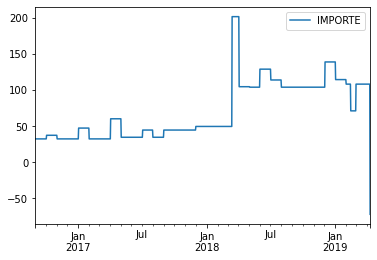

In [192]:
transacciones_90_dia_df.plot()
pyplot.show()

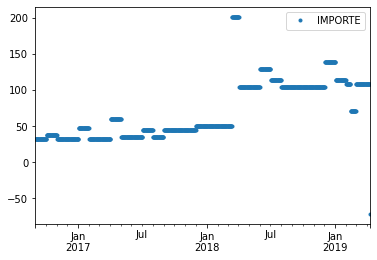

In [194]:
transacciones_90_dia_df.plot(style='.')
pyplot.show()

In [198]:
# 2. Time Series Histogram and Density Plots

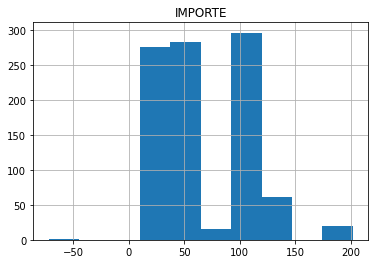

In [200]:
transacciones_90_dia_df.hist()
pyplot.show()

In [201]:
transacciones_90_dia_df.describe()

IMPORTE
count  952.000000
mean    71.133498
std     40.120571
min    -72.380000
25%     34.480000
50%     49.480000
75%    103.920000
max    201.750000

In [206]:
# calculamos la moda
stat_mode = statistics.mode(transacciones_90_dia_df['IMPORTE'])
stat_mode

32.22

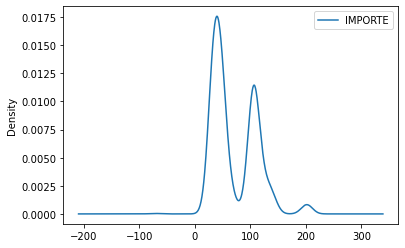

In [207]:
transacciones_90_dia_df.plot(kind='kde')
pyplot.show()

In [209]:
# 3. Time Series Box and Whisker Plots by Interval

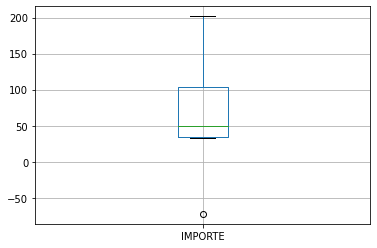

In [210]:
transacciones_90_dia_df.boxplot()
pyplot.show()

In [211]:
# 4. Time Series Heat Maps

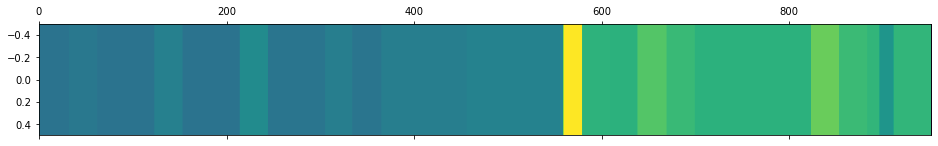

In [213]:
pyplot.matshow(transacciones_90_dia_df.T, interpolation=None, aspect='auto')
pyplot.show()

In [214]:
# 5. Time Series Lag Scatter Plots

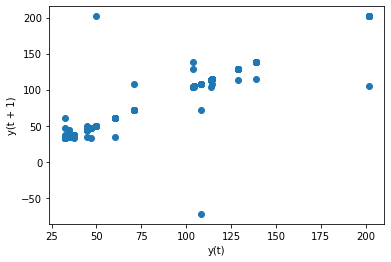

In [219]:
lag_plot(transacciones_90_dia_df)
pyplot.show()

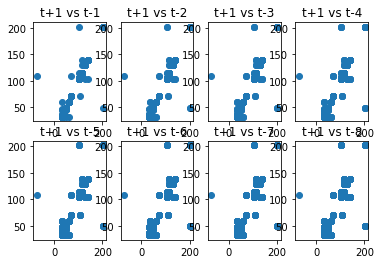

In [224]:
values = DataFrame(transacciones_90_dia_df.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

In [225]:
"""
Vemos que puede haber una cierta correlacion entre y(t+1) y sus 8 anteriores lags
"""

'\nVemos que puede haber una cierta correlacion entre y(t+1) y sus 8 anteriores lags\n'

t+1 vs t-1


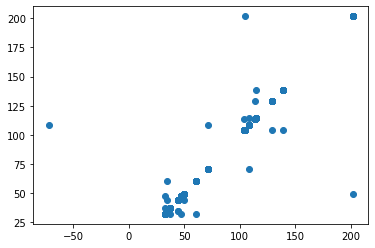

t+1 vs t-2


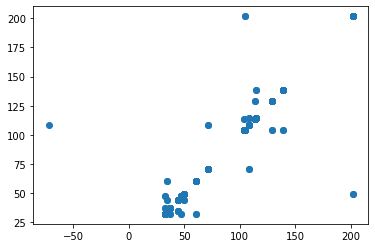

t+1 vs t-3


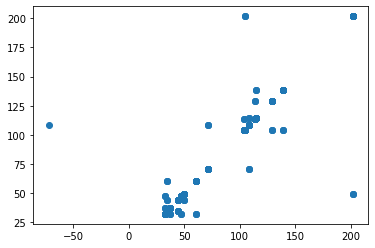

t+1 vs t-4


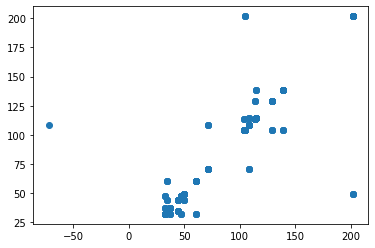

t+1 vs t-5


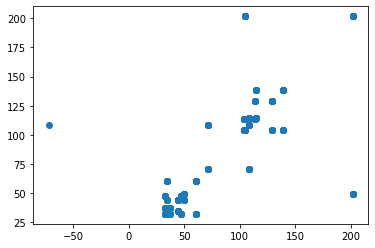

t+1 vs t-6


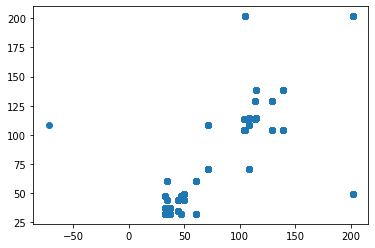

t+1 vs t-7


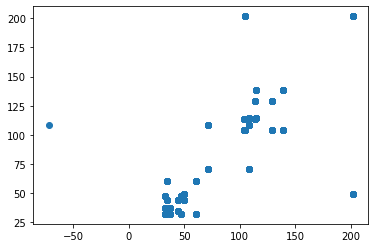

t+1 vs t-8


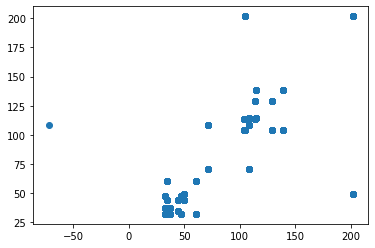

t+1 vs t-9


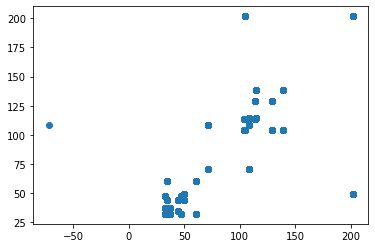

t+1 vs t-10


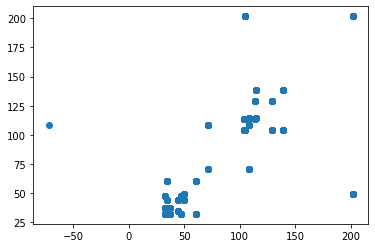

t+1 vs t-11


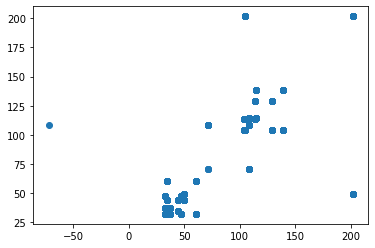

t+1 vs t-12


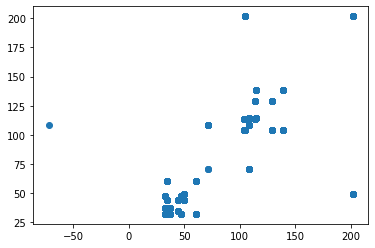

t+1 vs t-13


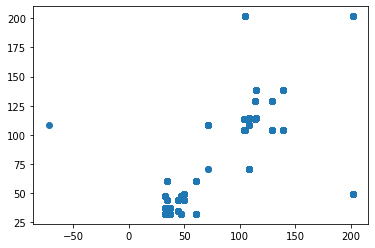

t+1 vs t-14


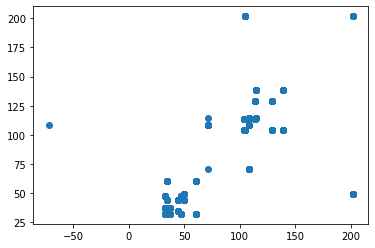

t+1 vs t-15


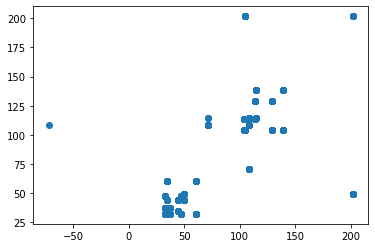

t+1 vs t-16


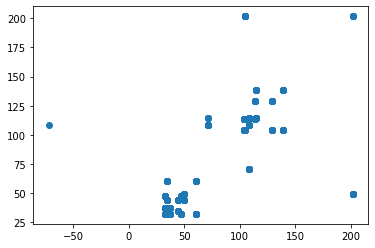

t+1 vs t-17


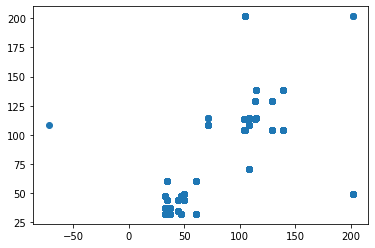

t+1 vs t-18


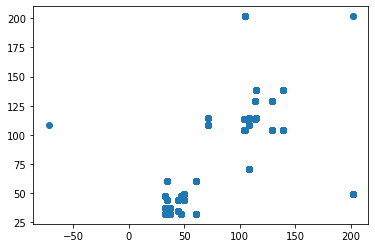

t+1 vs t-19


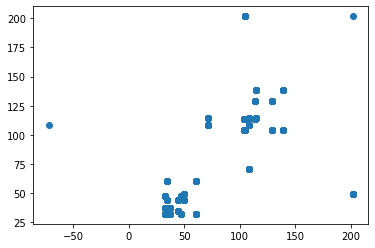

t+1 vs t-20


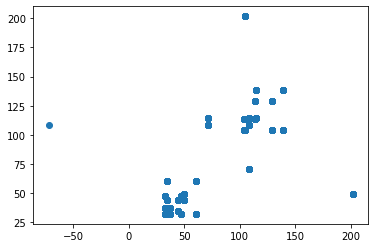

t+1 vs t-21


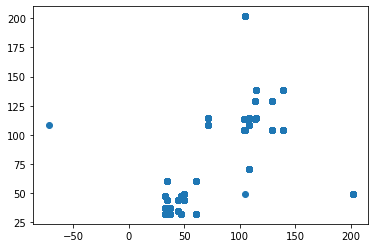

t+1 vs t-22


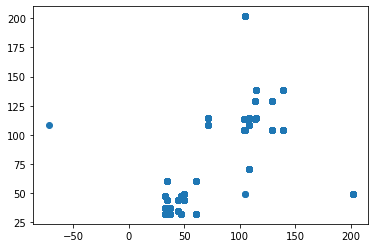

t+1 vs t-23


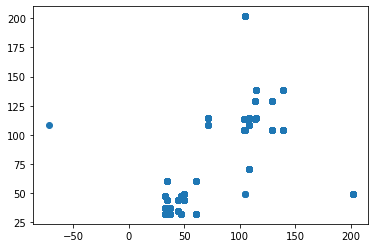

t+1 vs t-24


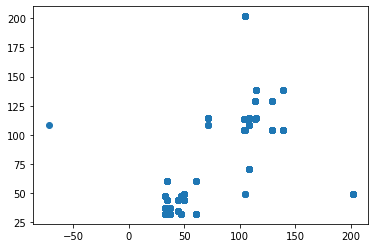

t+1 vs t-25


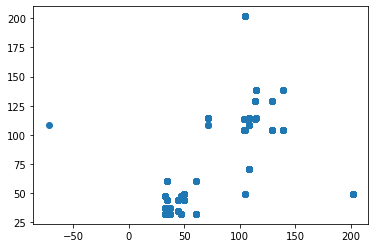

t+1 vs t-26


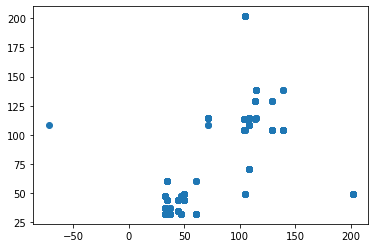

t+1 vs t-27


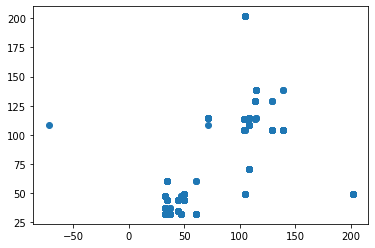

t+1 vs t-28


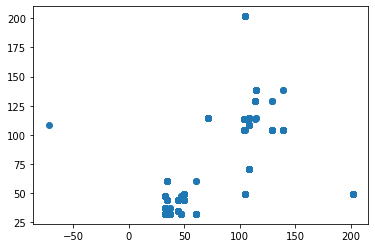

t+1 vs t-29


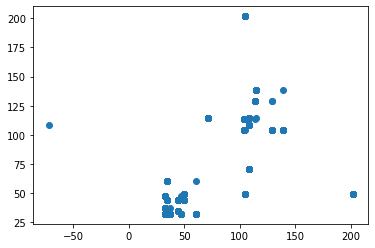

t+1 vs t-30


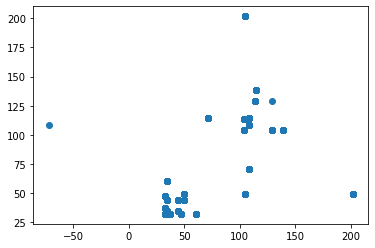

t+1 vs t-31


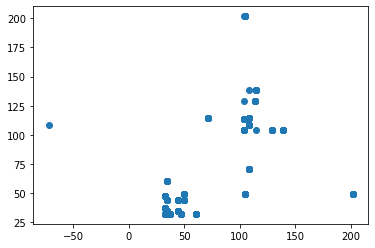

t+1 vs t-32


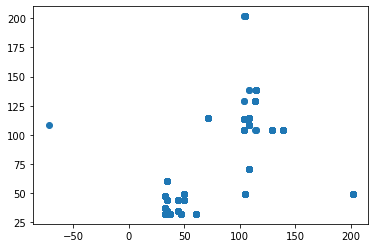

t+1 vs t-33


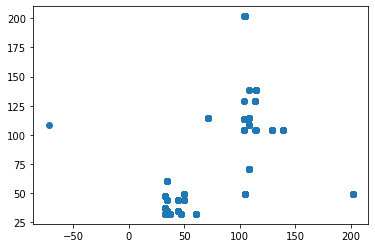

t+1 vs t-34


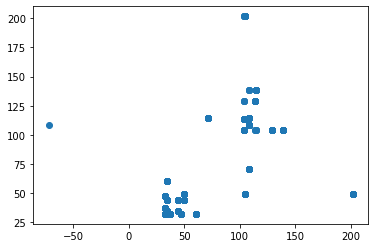

t+1 vs t-35


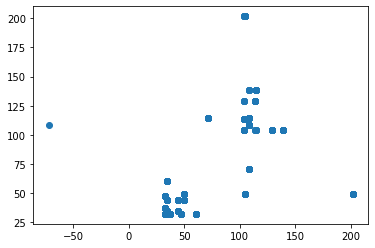

t+1 vs t-36


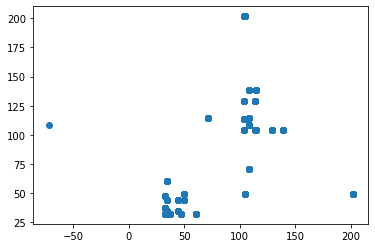

t+1 vs t-37


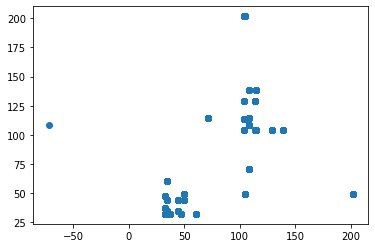

t+1 vs t-38


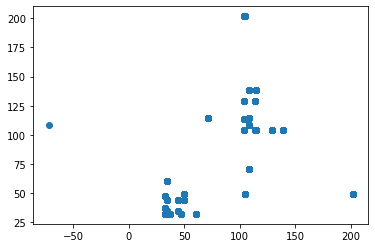

t+1 vs t-39


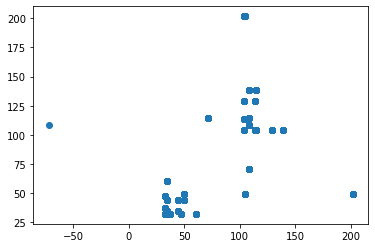

t+1 vs t-40


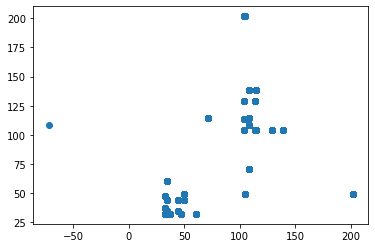

t+1 vs t-41


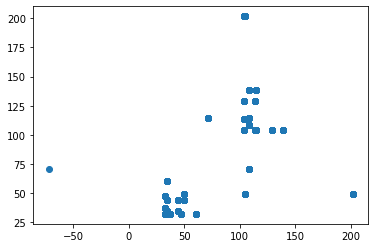

t+1 vs t-42


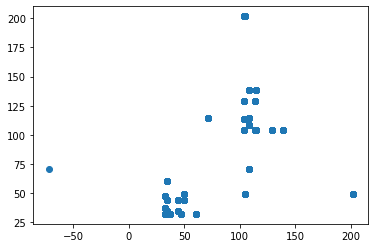

t+1 vs t-43


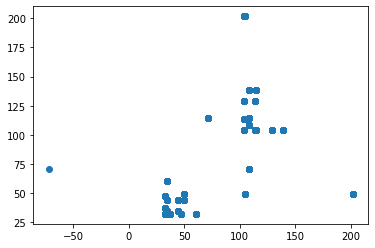

t+1 vs t-44


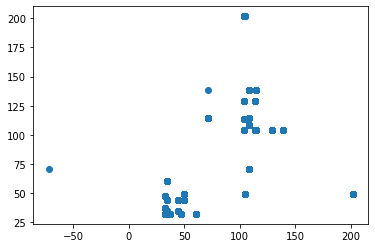

t+1 vs t-45


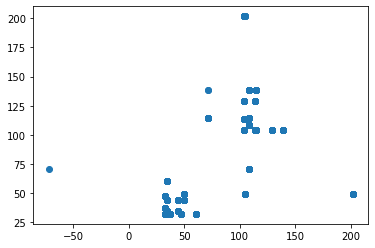

t+1 vs t-46


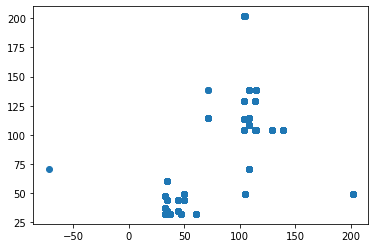

t+1 vs t-47


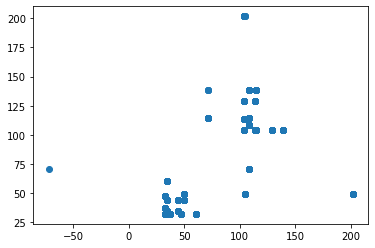

t+1 vs t-48


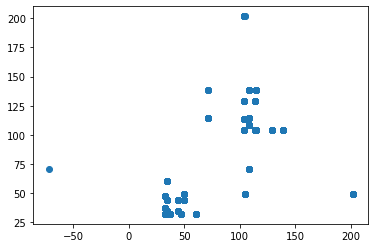

t+1 vs t-49


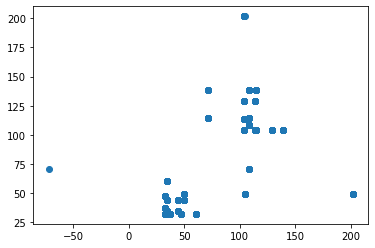

t+1 vs t-50


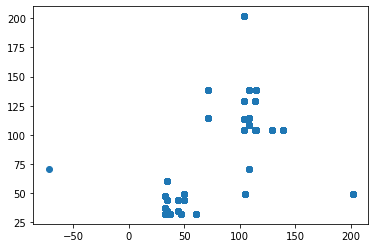

t+1 vs t-51


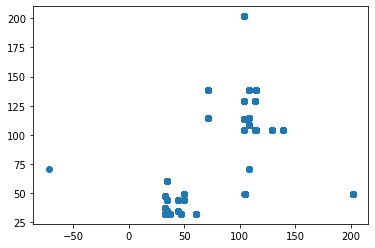

t+1 vs t-52


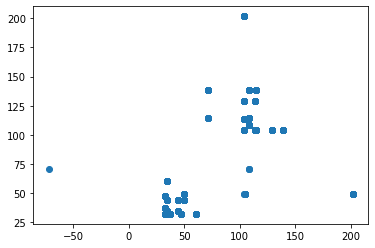

t+1 vs t-53


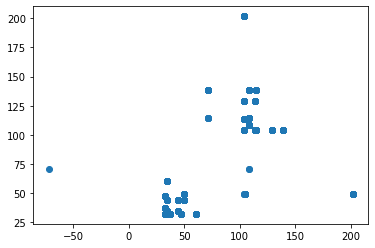

t+1 vs t-54


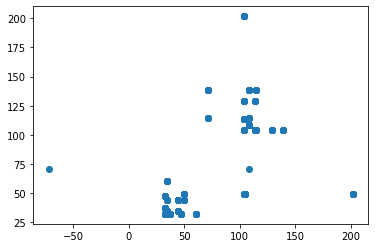

t+1 vs t-55


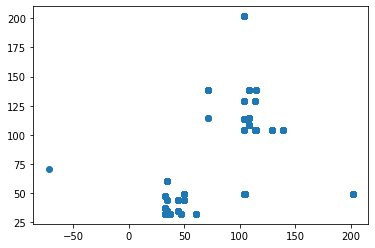

t+1 vs t-56


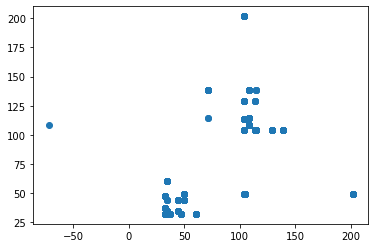

t+1 vs t-57


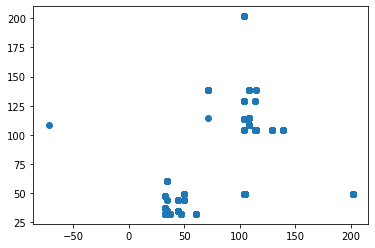

t+1 vs t-58


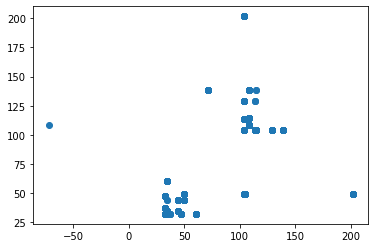

t+1 vs t-59


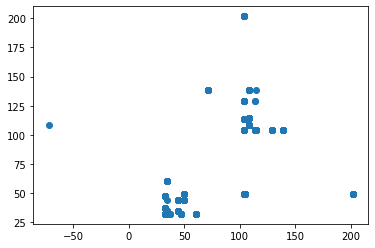

t+1 vs t-60


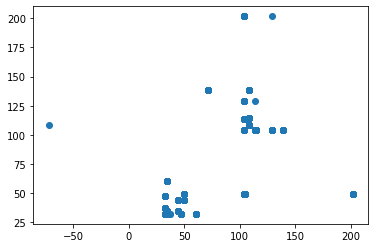

t+1 vs t-61


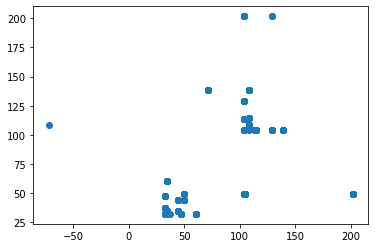

t+1 vs t-62


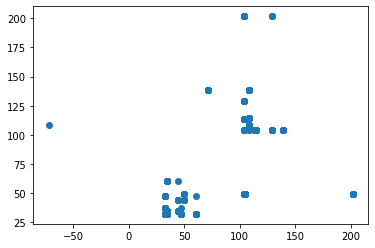

t+1 vs t-63


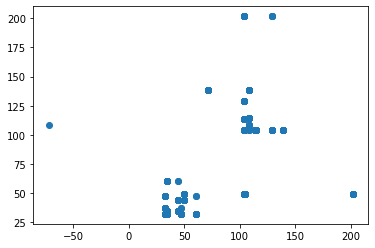

t+1 vs t-64


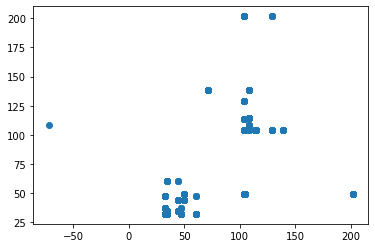

t+1 vs t-65


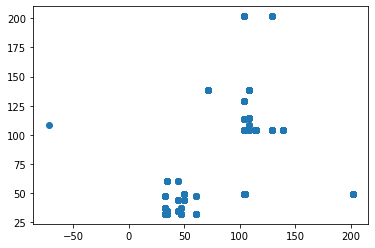

t+1 vs t-66


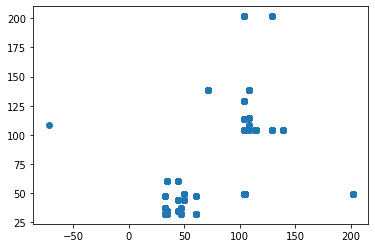

t+1 vs t-67


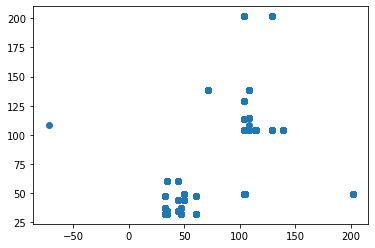

t+1 vs t-68


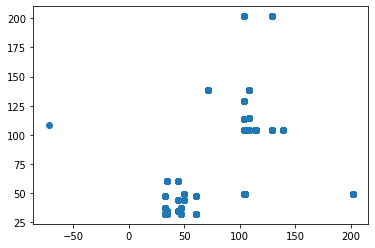

t+1 vs t-69


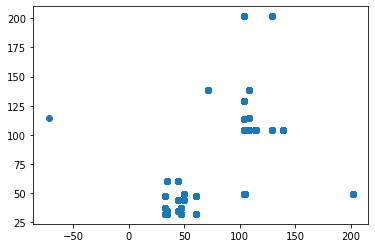

t+1 vs t-70


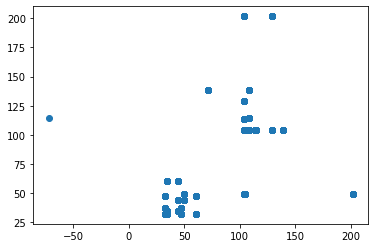

t+1 vs t-71


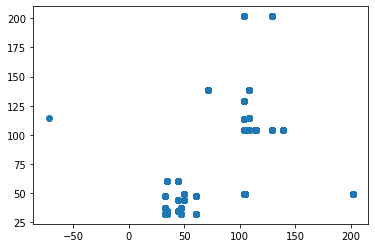

t+1 vs t-72


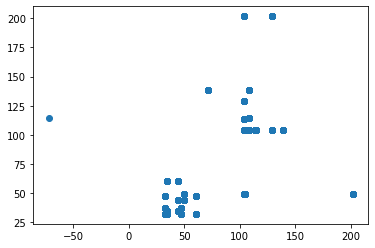

t+1 vs t-73


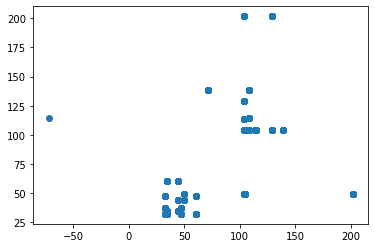

t+1 vs t-74


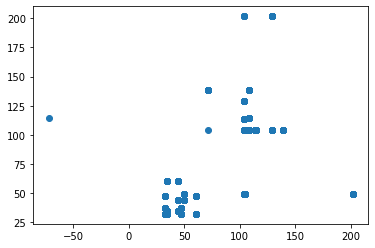

t+1 vs t-75


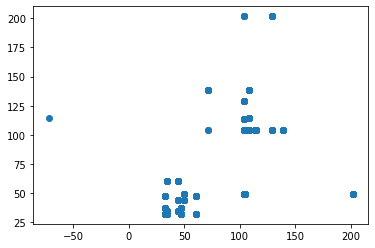

t+1 vs t-76


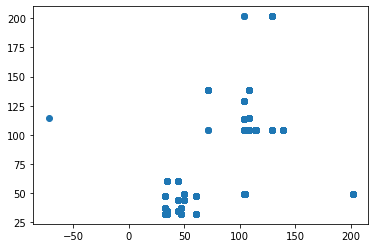

t+1 vs t-77


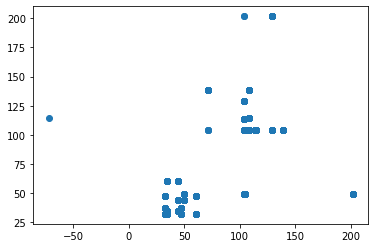

t+1 vs t-78


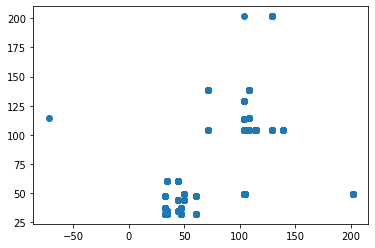

t+1 vs t-79


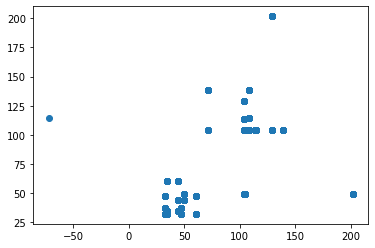

t+1 vs t-80


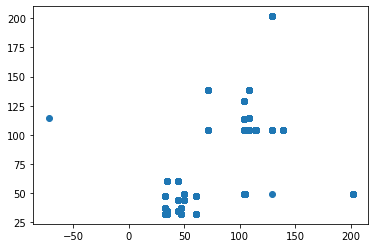

t+1 vs t-81


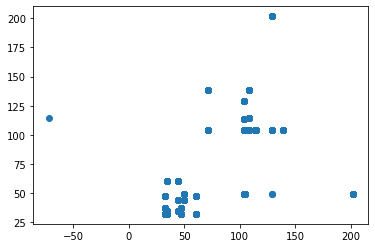

t+1 vs t-82


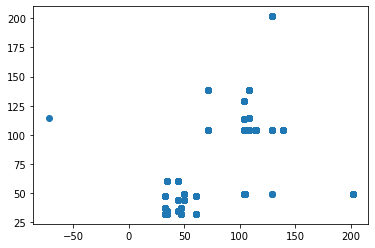

t+1 vs t-83


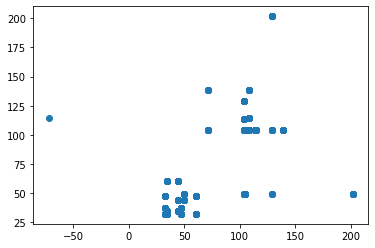

t+1 vs t-84


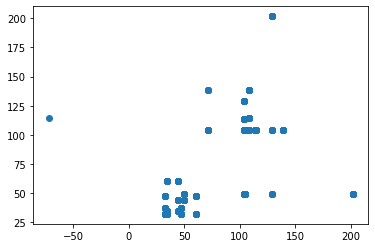

t+1 vs t-85


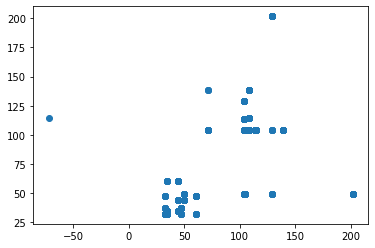

t+1 vs t-86


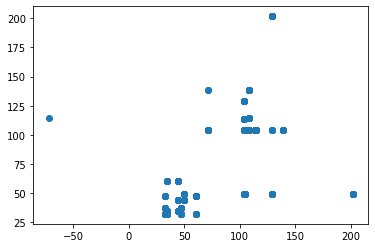

t+1 vs t-87


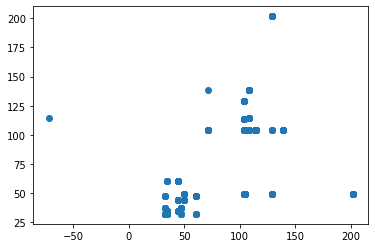

t+1 vs t-88


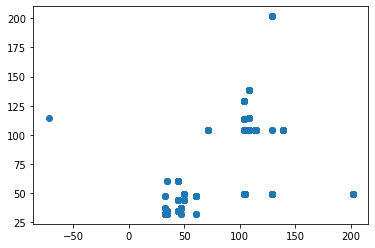

t+1 vs t-89


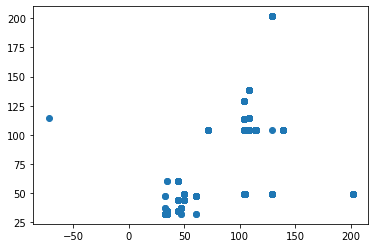

t+1 vs t-90


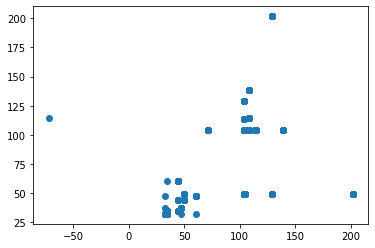

t+1 vs t-91


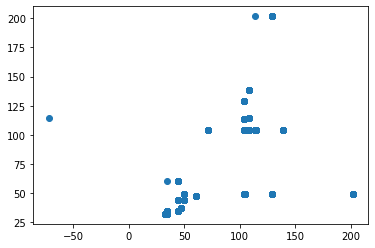

t+1 vs t-92


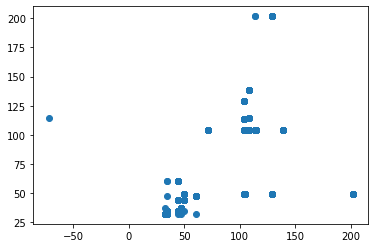

t+1 vs t-93


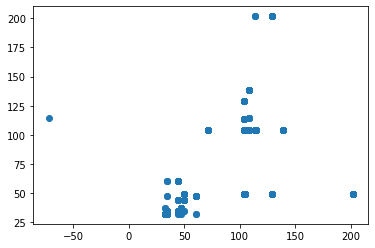

t+1 vs t-94


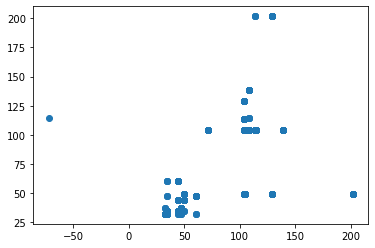

t+1 vs t-95


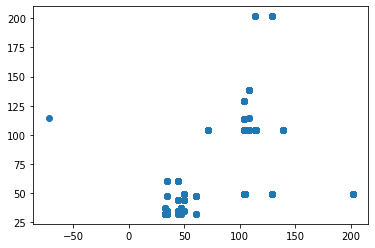

t+1 vs t-96


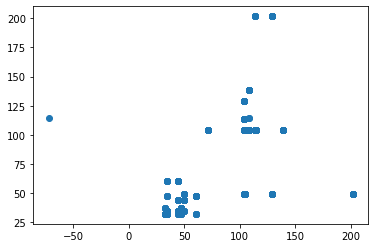

t+1 vs t-97


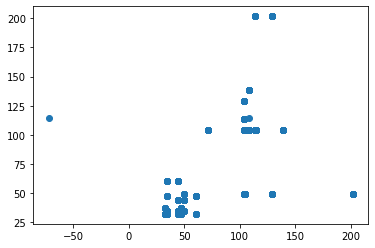

t+1 vs t-98


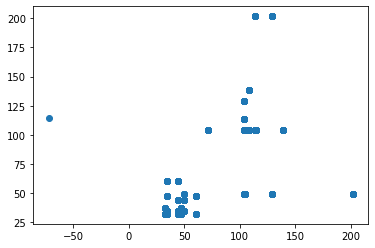

t+1 vs t-99


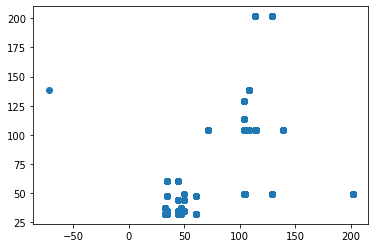

t+1 vs t-100


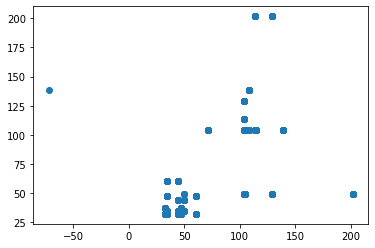

t+1 vs t-101


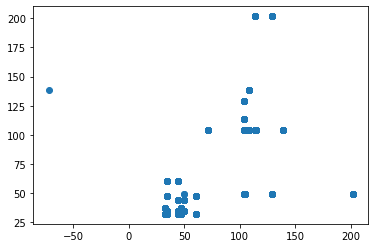

t+1 vs t-102


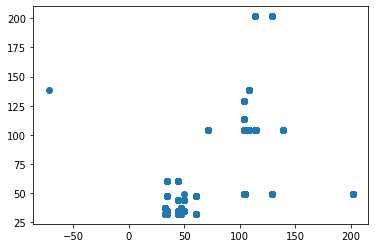

t+1 vs t-103


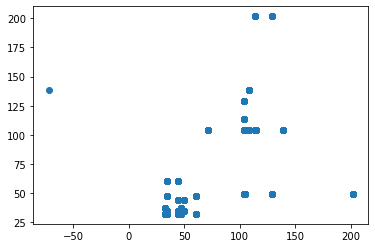

t+1 vs t-104


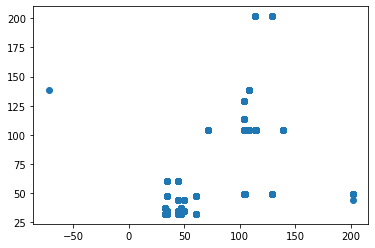

t+1 vs t-105


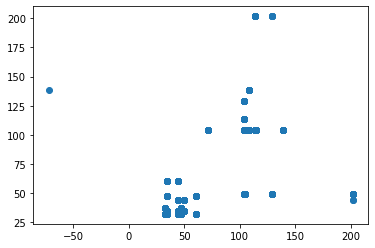

t+1 vs t-106


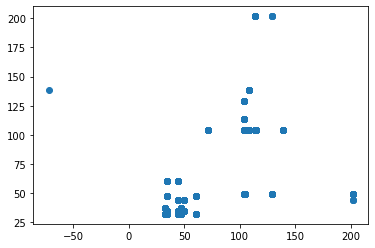

t+1 vs t-107


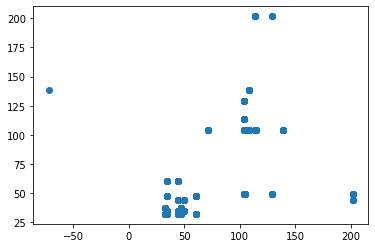

t+1 vs t-108


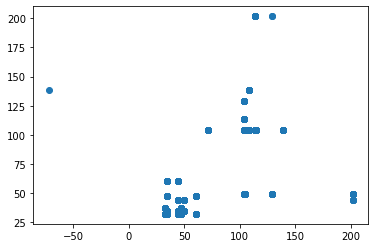

t+1 vs t-109


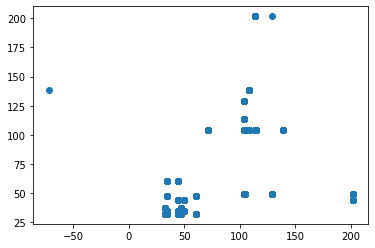

t+1 vs t-110


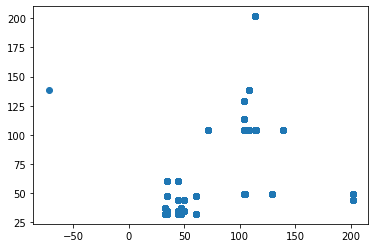

t+1 vs t-111


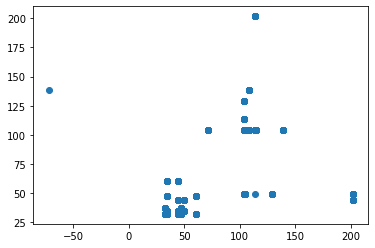

t+1 vs t-112


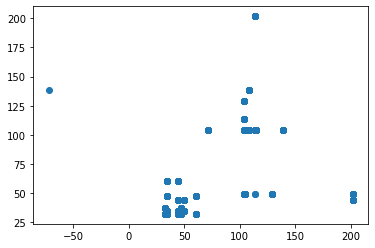

t+1 vs t-113


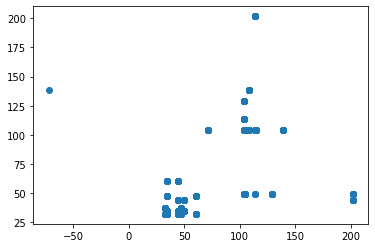

t+1 vs t-114


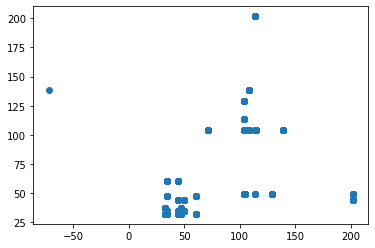

t+1 vs t-115


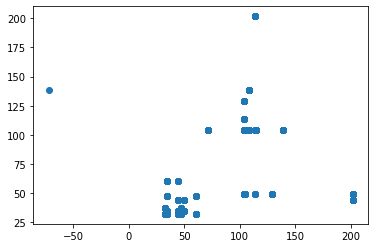

t+1 vs t-116


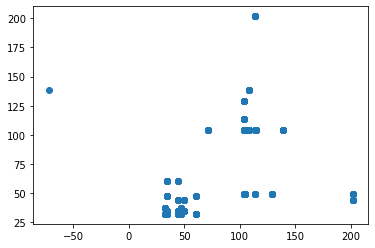

t+1 vs t-117


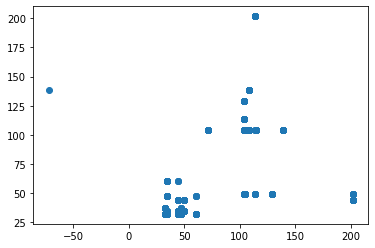

t+1 vs t-118


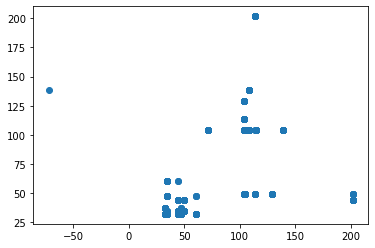

t+1 vs t-119


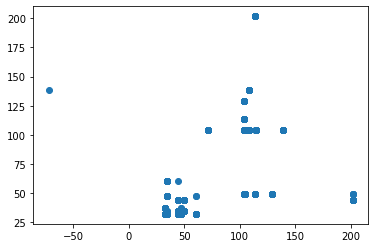

t+1 vs t-120


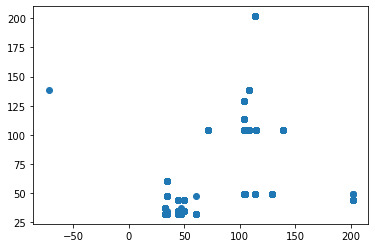

t+1 vs t-121


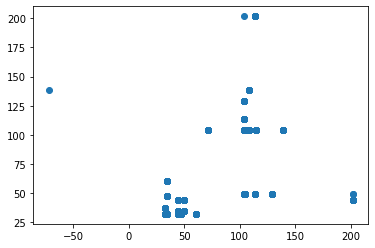

t+1 vs t-122


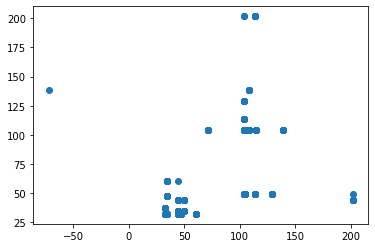

t+1 vs t-123


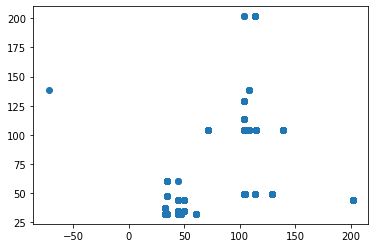

t+1 vs t-124


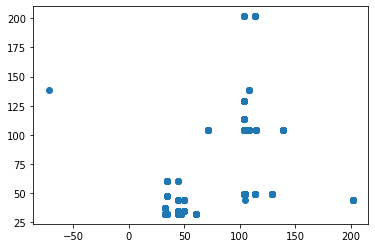

t+1 vs t-125


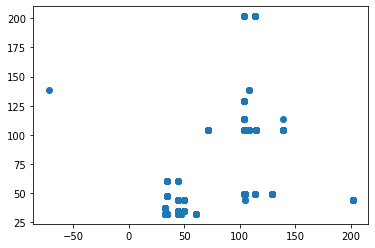

t+1 vs t-126


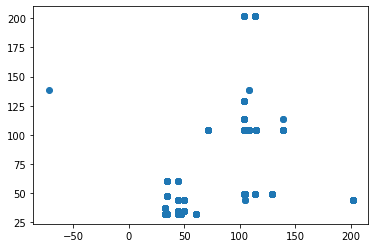

t+1 vs t-127


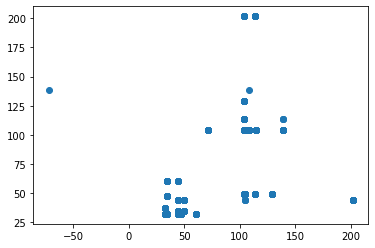

t+1 vs t-128


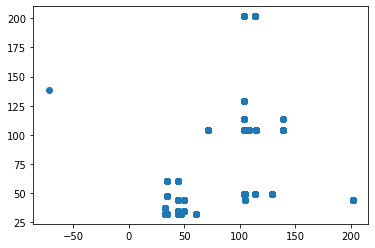

t+1 vs t-129


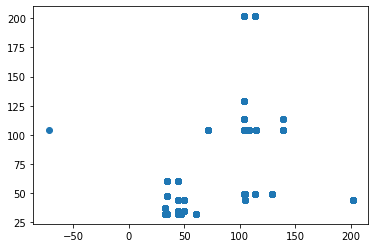

t+1 vs t-130


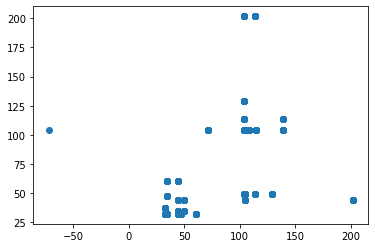

t+1 vs t-131


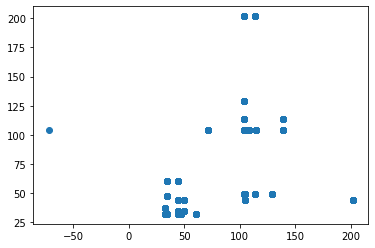

t+1 vs t-132


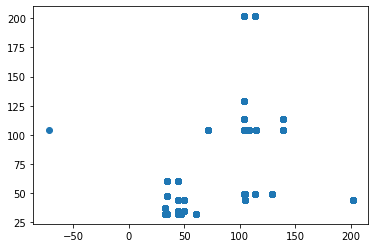

t+1 vs t-133


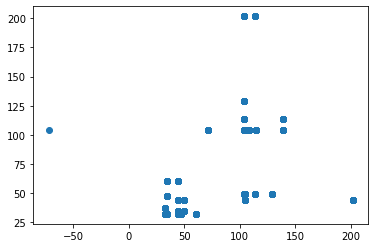

t+1 vs t-134


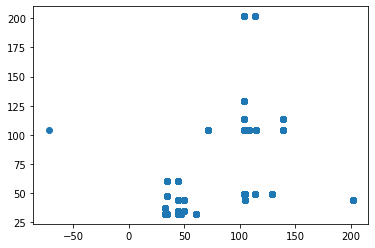

t+1 vs t-135


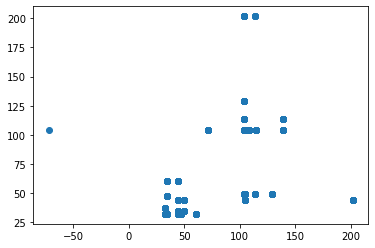

t+1 vs t-136


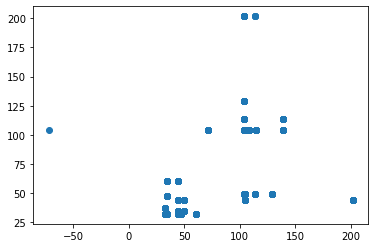

t+1 vs t-137


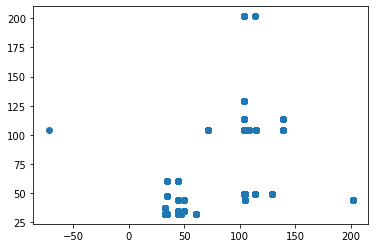

t+1 vs t-138


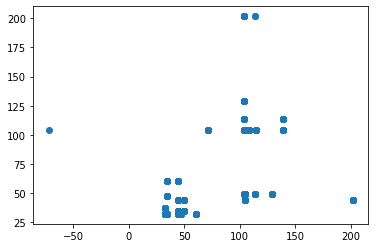

t+1 vs t-139


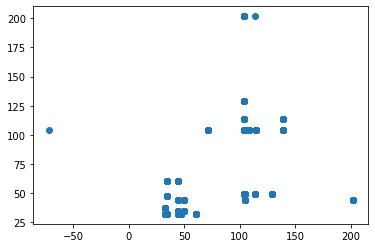

t+1 vs t-140


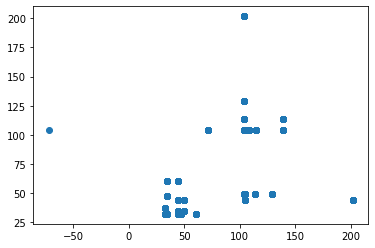

t+1 vs t-141


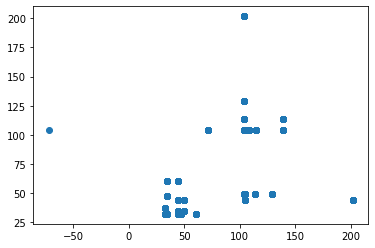

t+1 vs t-142


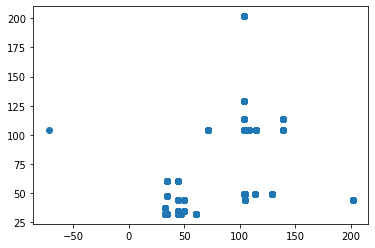

t+1 vs t-143


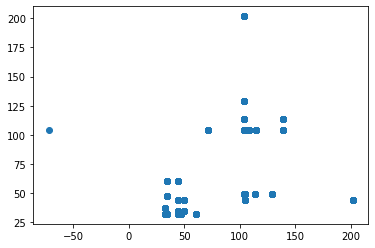

t+1 vs t-144


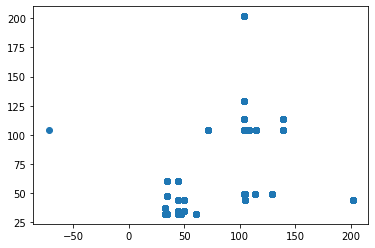

t+1 vs t-145


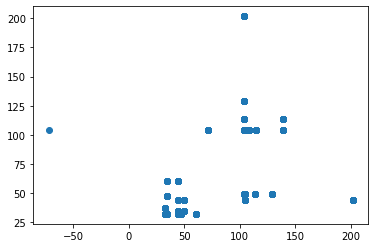

t+1 vs t-146


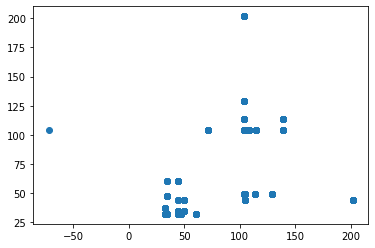

t+1 vs t-147


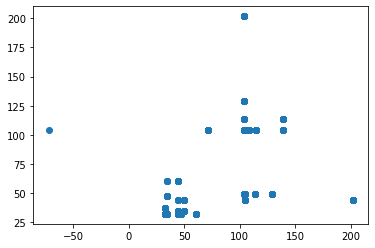

t+1 vs t-148


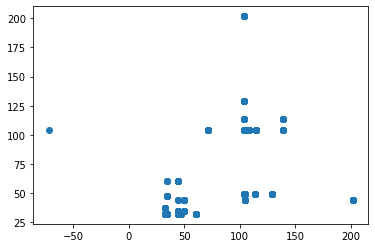

t+1 vs t-149


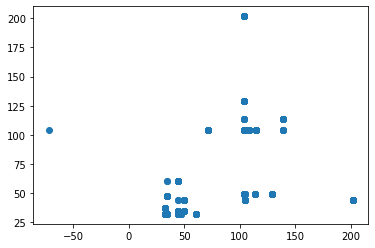

t+1 vs t-150


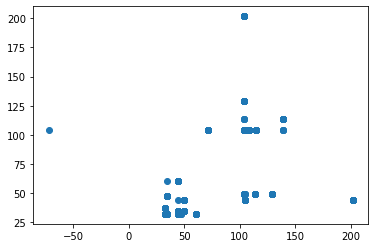

t+1 vs t-151


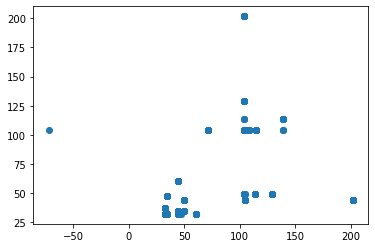

t+1 vs t-152


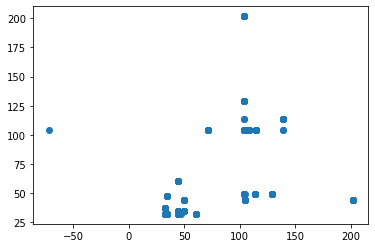

t+1 vs t-153


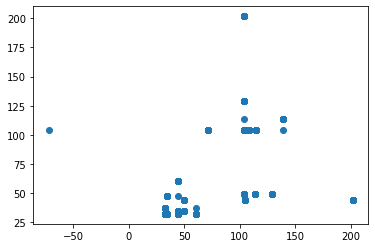

t+1 vs t-154


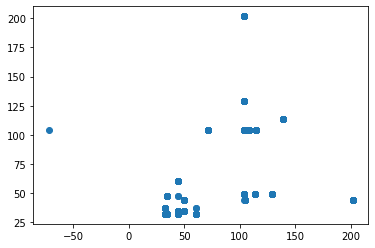

t+1 vs t-155


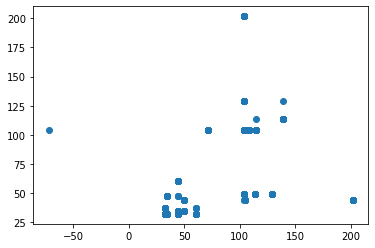

t+1 vs t-156


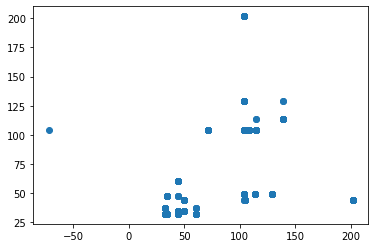

t+1 vs t-157


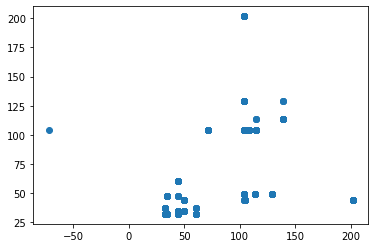

t+1 vs t-158


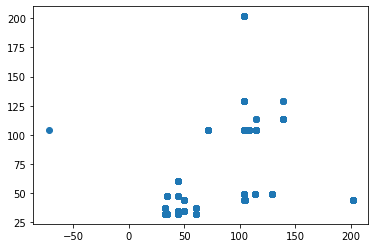

t+1 vs t-159


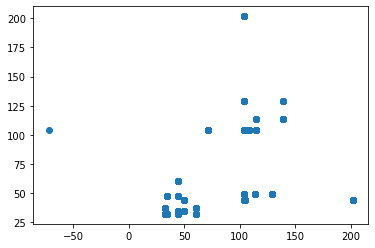

t+1 vs t-160


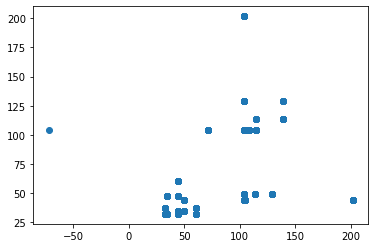

t+1 vs t-161


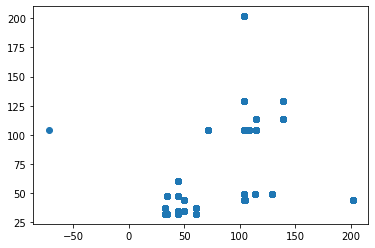

t+1 vs t-162


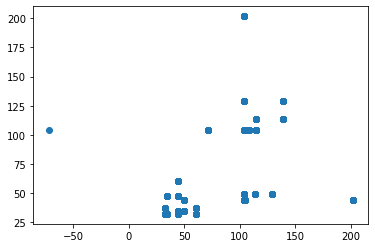

t+1 vs t-163


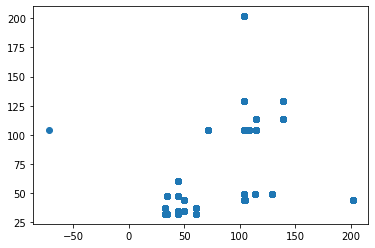

t+1 vs t-164


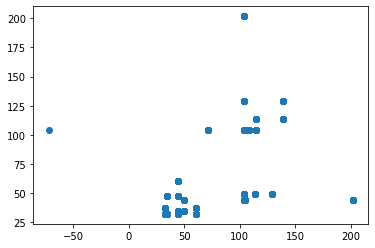

t+1 vs t-165


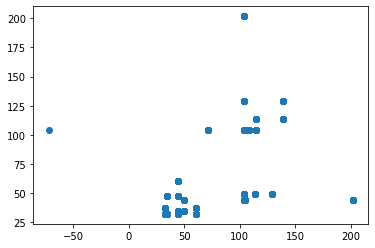

t+1 vs t-166


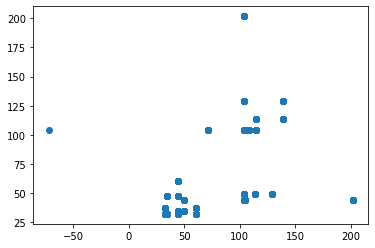

t+1 vs t-167


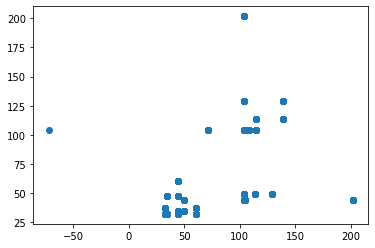

t+1 vs t-168


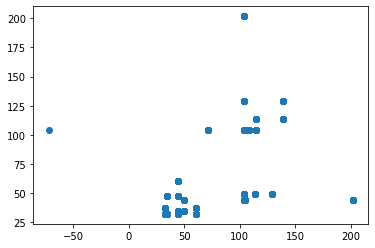

t+1 vs t-169


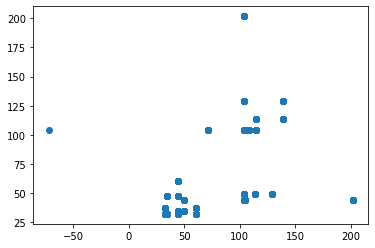

t+1 vs t-170


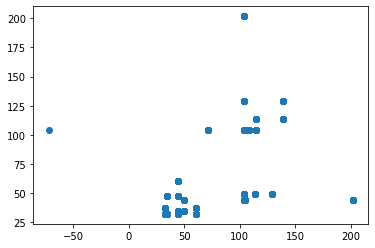

t+1 vs t-171


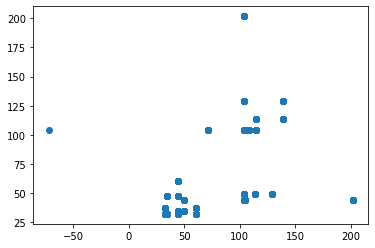

t+1 vs t-172


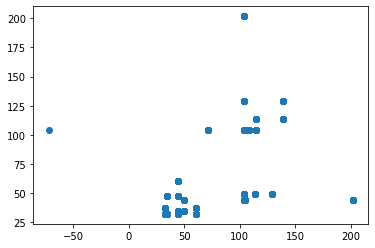

t+1 vs t-173


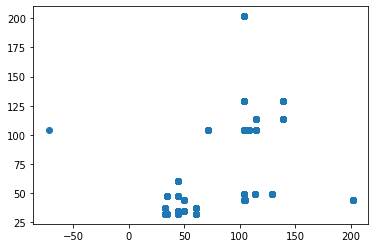

t+1 vs t-174


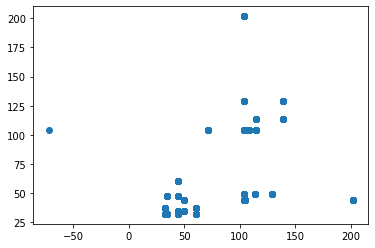

t+1 vs t-175


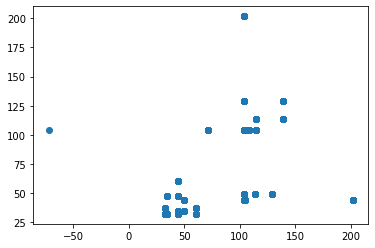

t+1 vs t-176


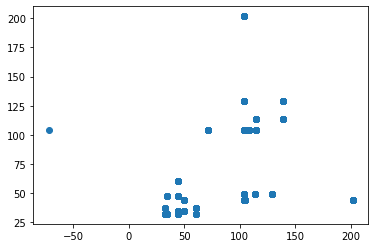

t+1 vs t-177


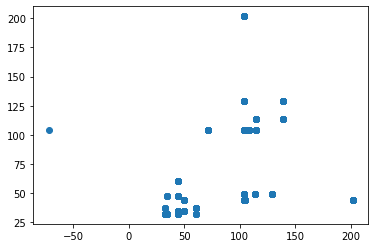

t+1 vs t-178


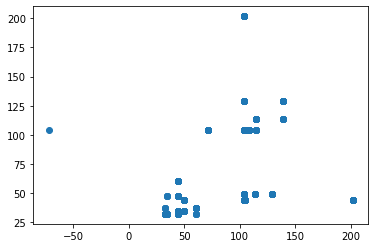

t+1 vs t-179


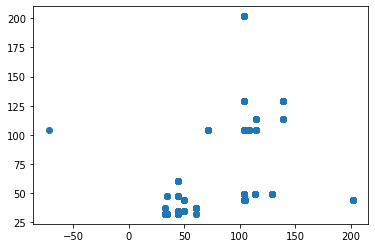

t+1 vs t-180


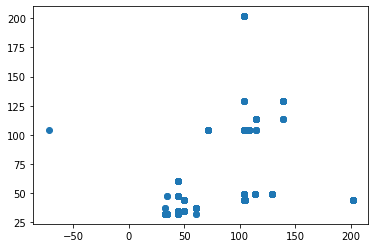

t+1 vs t-181


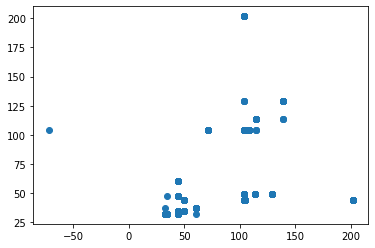

t+1 vs t-182


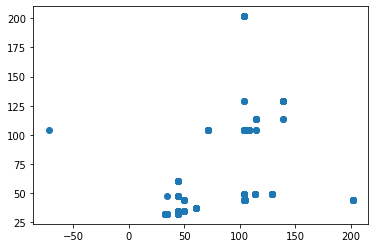

t+1 vs t-183


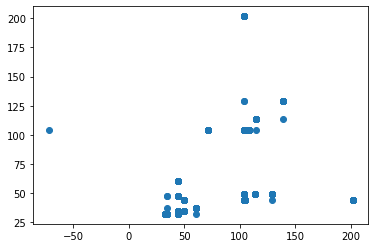

t+1 vs t-184


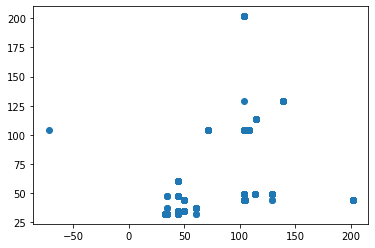

t+1 vs t-185


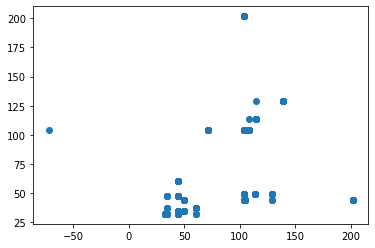

t+1 vs t-186


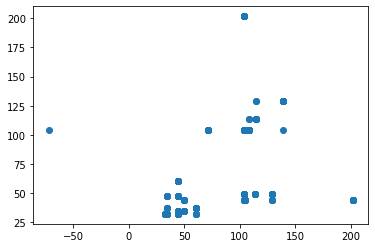

t+1 vs t-187


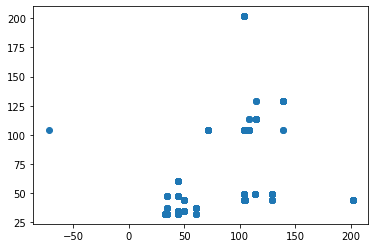

t+1 vs t-188


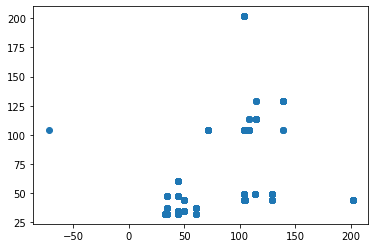

t+1 vs t-189


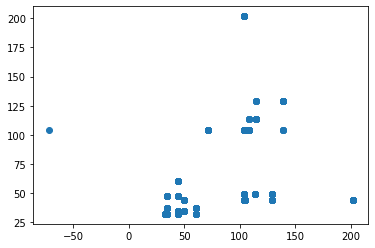

t+1 vs t-190


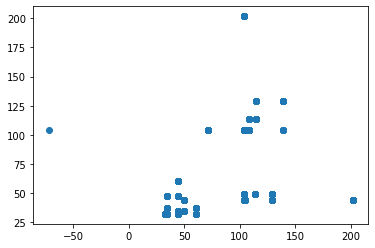

t+1 vs t-191


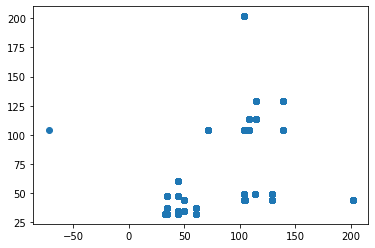

t+1 vs t-192


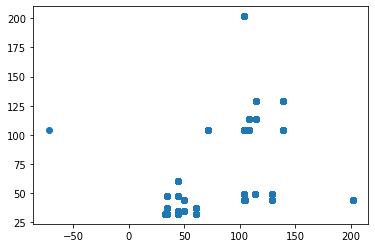

t+1 vs t-193


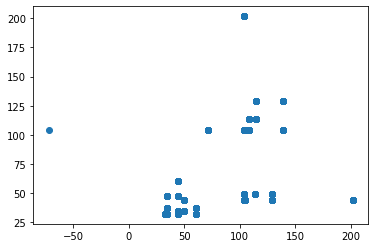

t+1 vs t-194


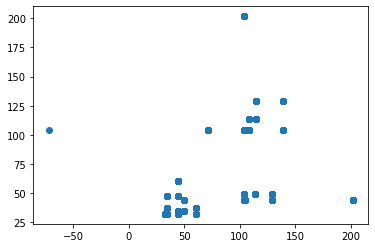

t+1 vs t-195


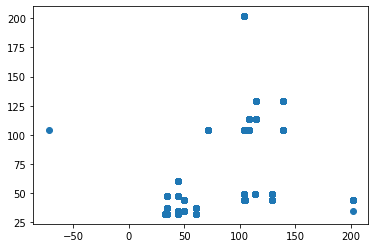

t+1 vs t-196


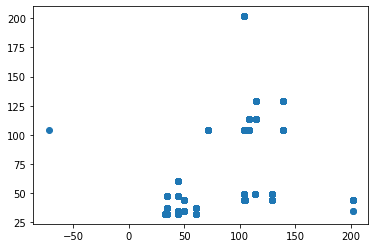

t+1 vs t-197


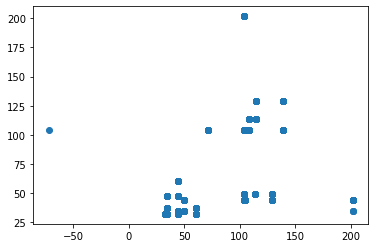

t+1 vs t-198


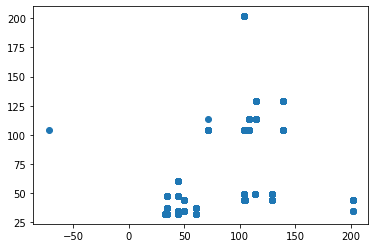

t+1 vs t-199


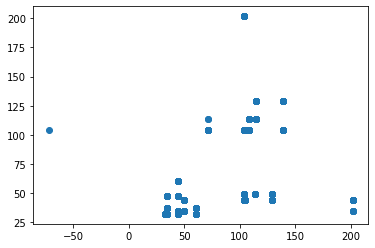

t+1 vs t-200


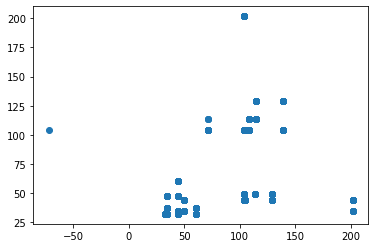

t+1 vs t-201


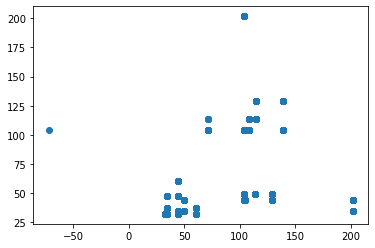

t+1 vs t-202


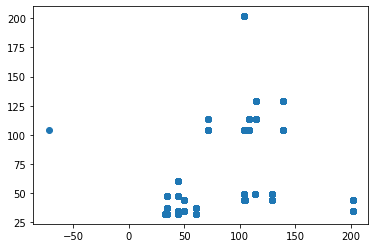

t+1 vs t-203


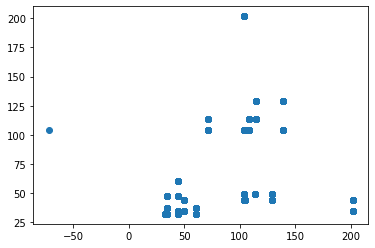

t+1 vs t-204


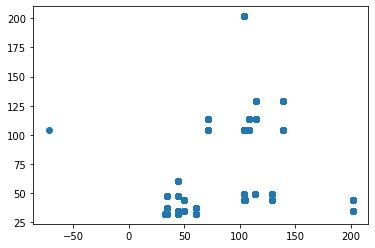

t+1 vs t-205


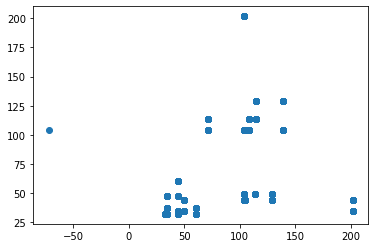

t+1 vs t-206


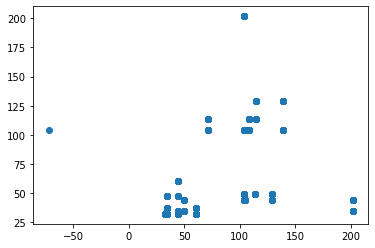

t+1 vs t-207


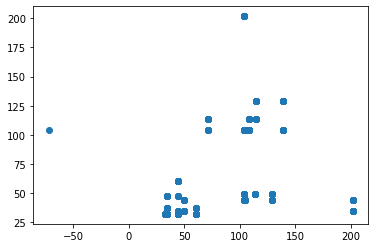

t+1 vs t-208


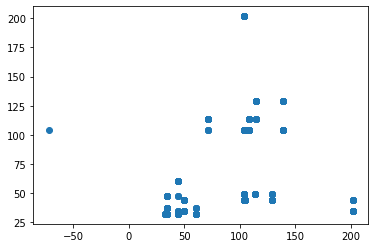

t+1 vs t-209


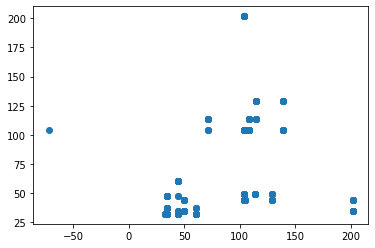

t+1 vs t-210


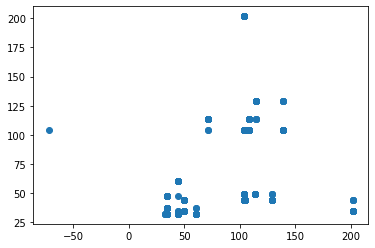

t+1 vs t-211


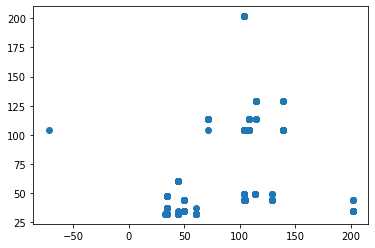

t+1 vs t-212


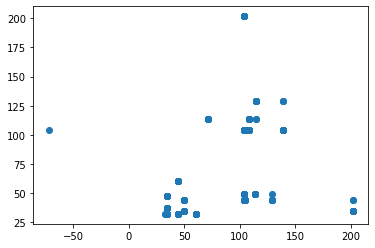

t+1 vs t-213


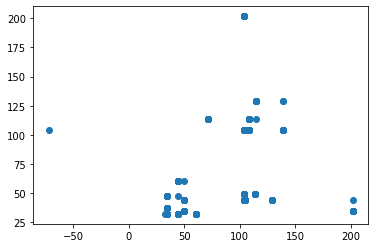

t+1 vs t-214


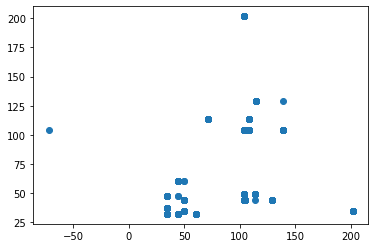

t+1 vs t-215


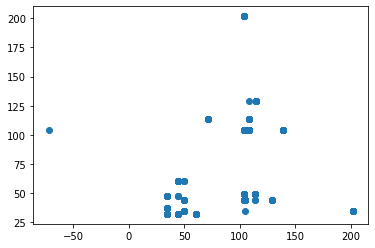

t+1 vs t-216


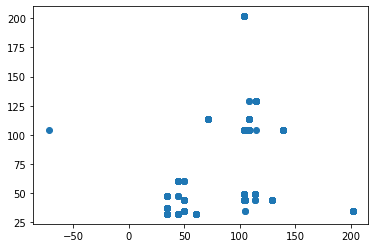

t+1 vs t-217


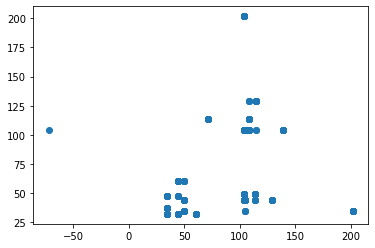

t+1 vs t-218


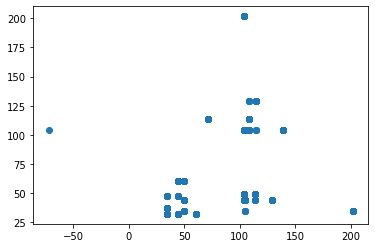

t+1 vs t-219


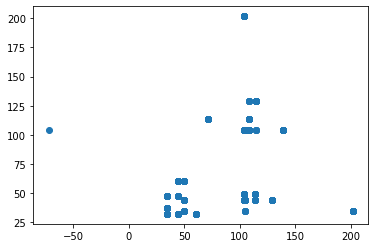

t+1 vs t-220


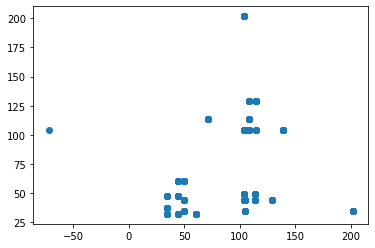

t+1 vs t-221


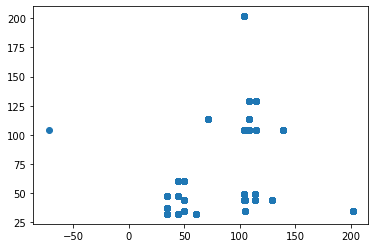

t+1 vs t-222


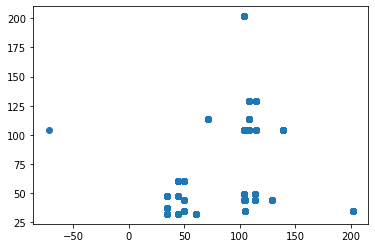

t+1 vs t-223


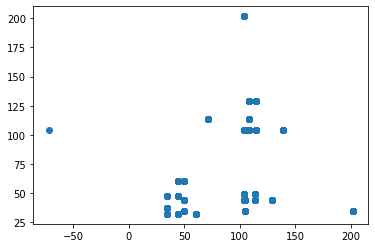

t+1 vs t-224


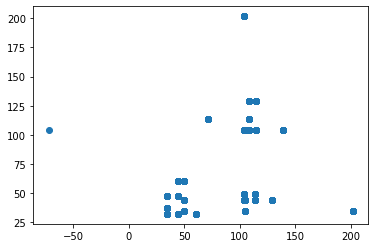

t+1 vs t-225


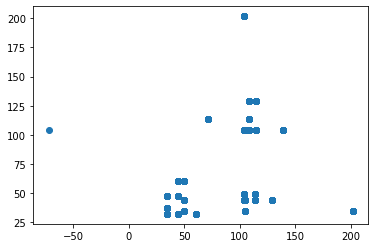

t+1 vs t-226


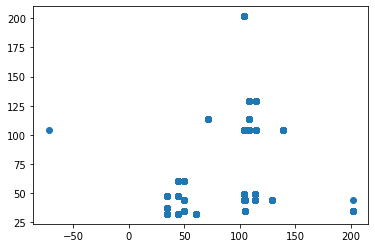

t+1 vs t-227


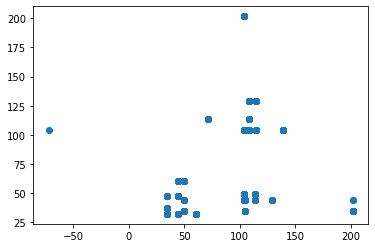

t+1 vs t-228


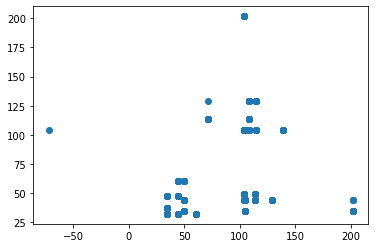

t+1 vs t-229


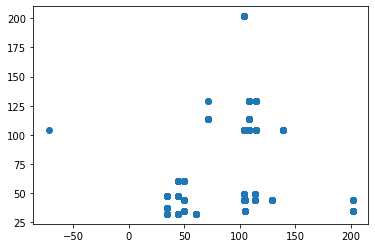

t+1 vs t-230


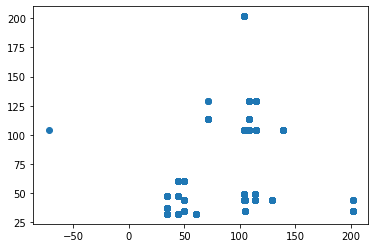

t+1 vs t-231


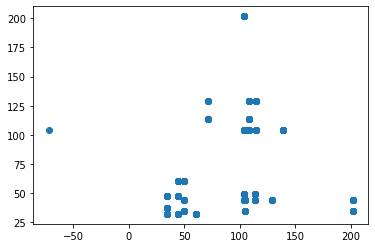

t+1 vs t-232


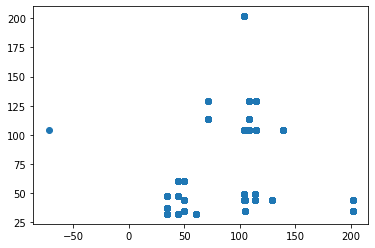

t+1 vs t-233


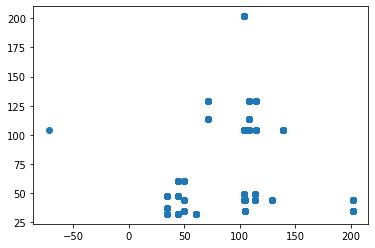

t+1 vs t-234


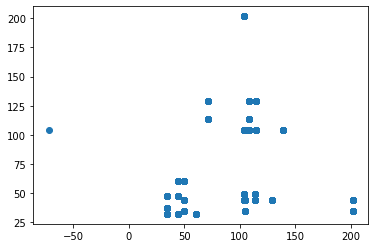

t+1 vs t-235


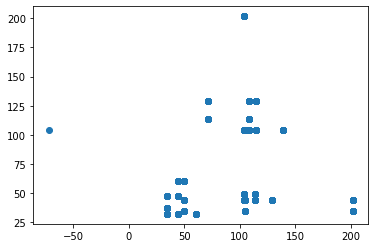

t+1 vs t-236


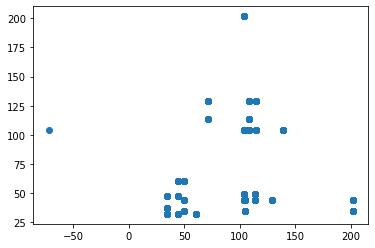

t+1 vs t-237


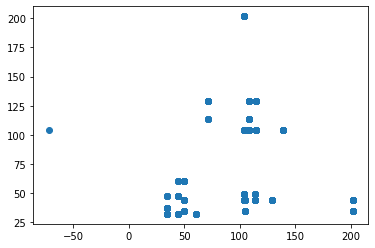

t+1 vs t-238


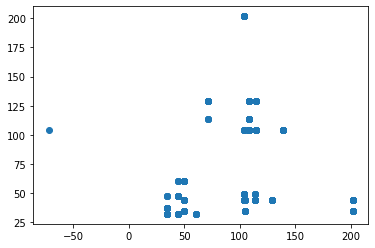

t+1 vs t-239


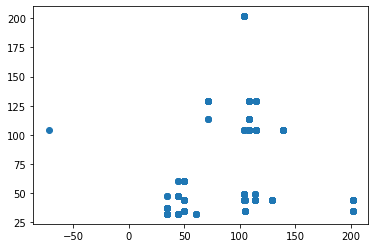

t+1 vs t-240


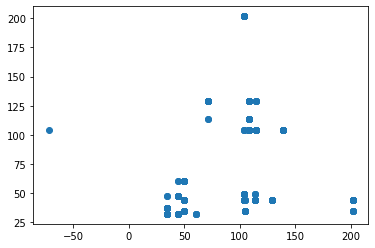

t+1 vs t-241


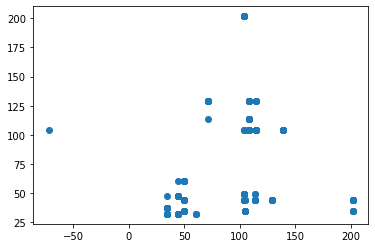

t+1 vs t-242


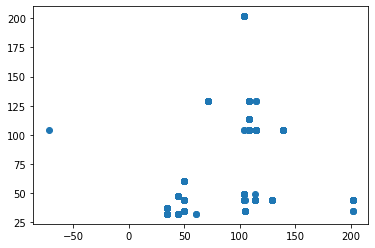

t+1 vs t-243


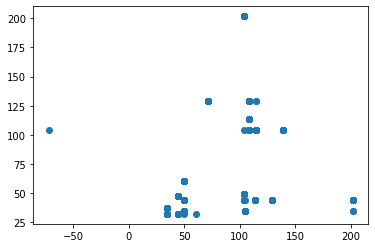

t+1 vs t-244


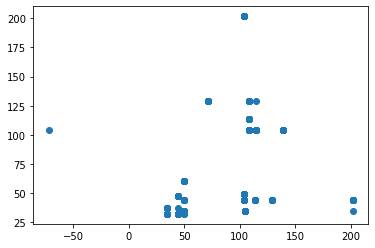

t+1 vs t-245


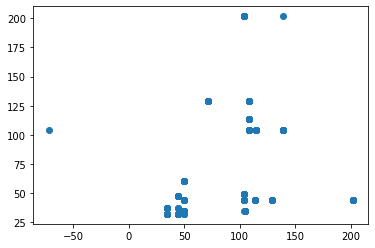

t+1 vs t-246


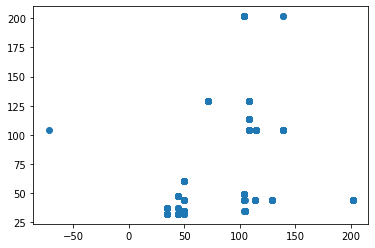

t+1 vs t-247


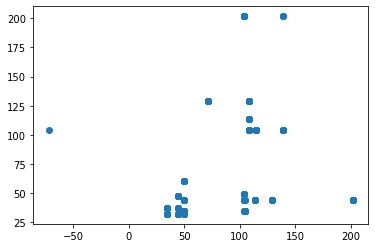

t+1 vs t-248


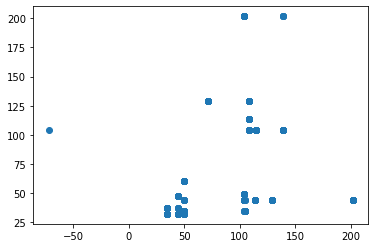

t+1 vs t-249


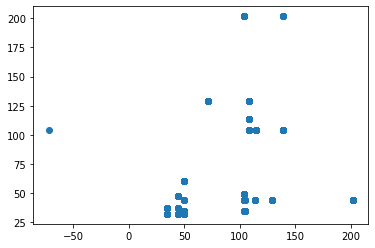

t+1 vs t-250


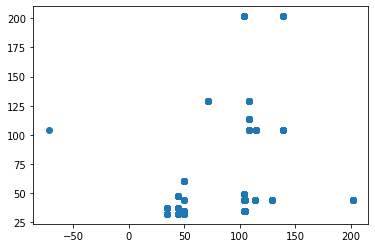

t+1 vs t-251


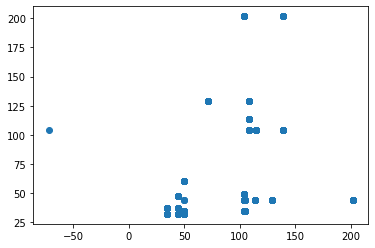

t+1 vs t-252


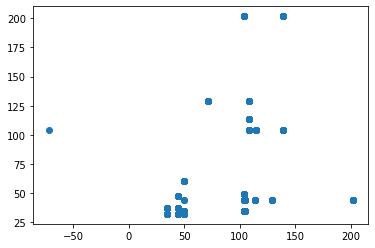

t+1 vs t-253


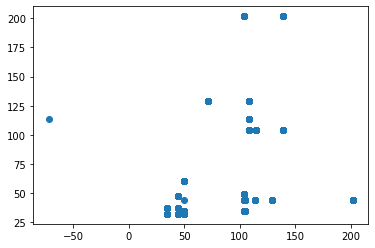

t+1 vs t-254


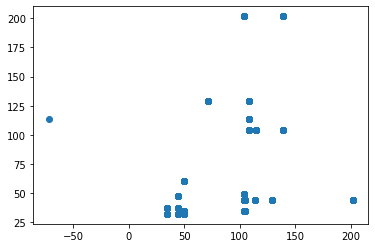

t+1 vs t-255


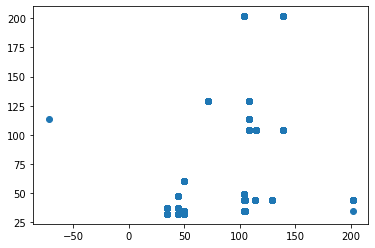

t+1 vs t-256


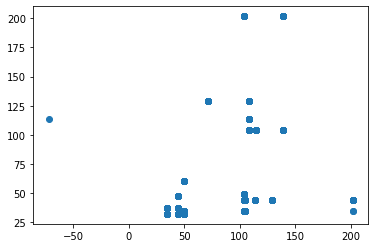

t+1 vs t-257


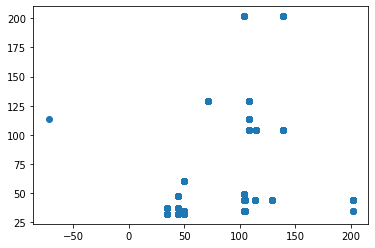

t+1 vs t-258


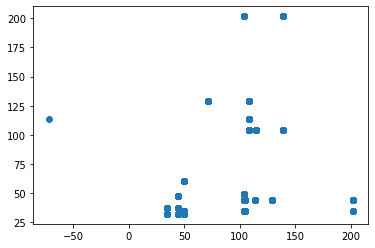

t+1 vs t-259


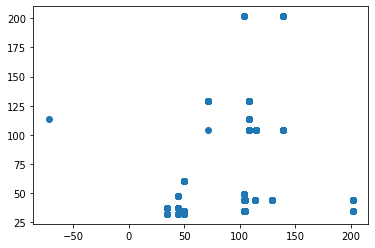

t+1 vs t-260


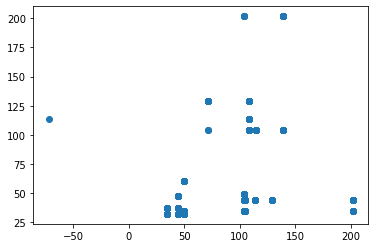

t+1 vs t-261


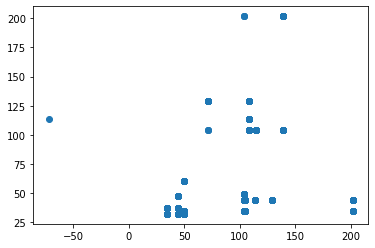

t+1 vs t-262


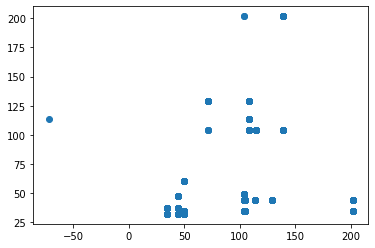

t+1 vs t-263


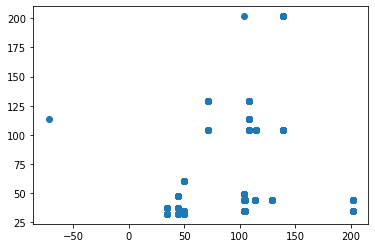

t+1 vs t-264


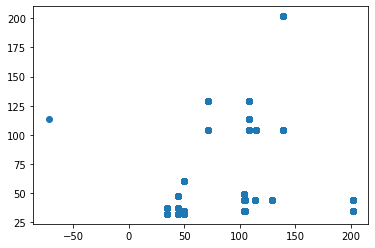

t+1 vs t-265


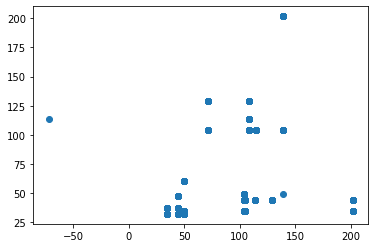

t+1 vs t-266


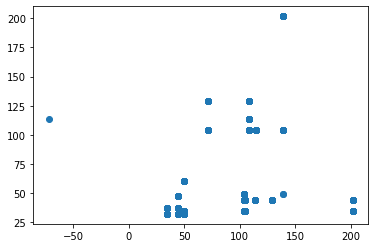

t+1 vs t-267


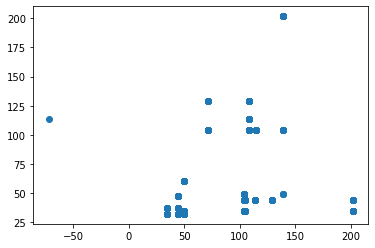

t+1 vs t-268


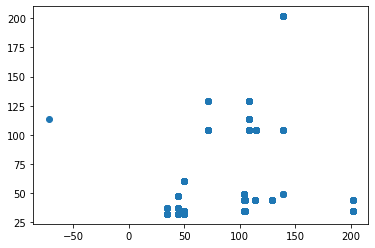

t+1 vs t-269


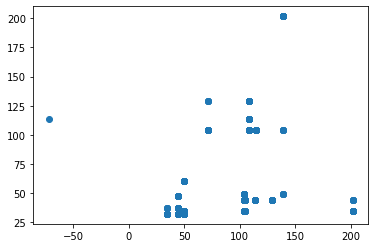

t+1 vs t-270


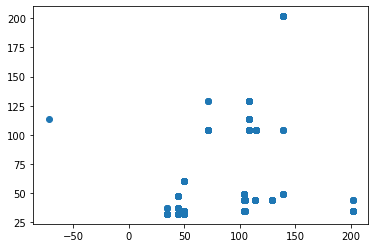

t+1 vs t-271


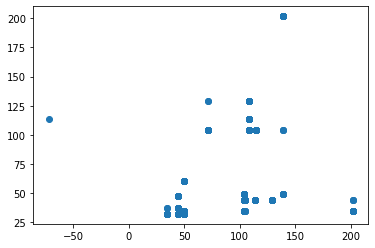

t+1 vs t-272


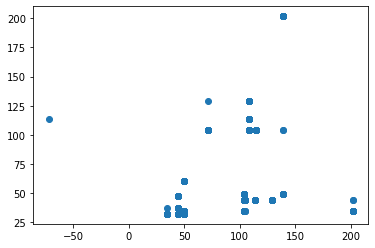

t+1 vs t-273


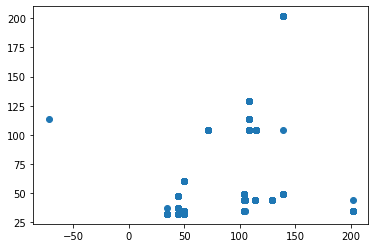

t+1 vs t-274


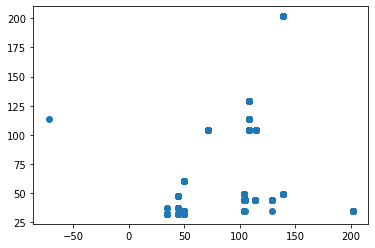

t+1 vs t-275


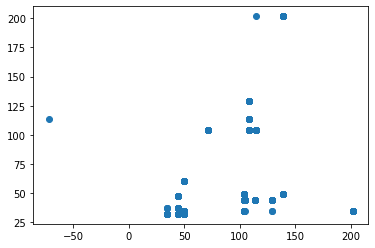

t+1 vs t-276


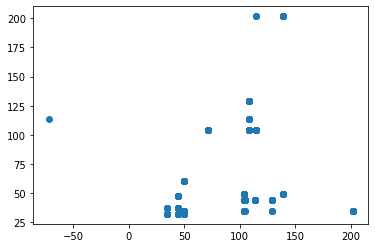

t+1 vs t-277


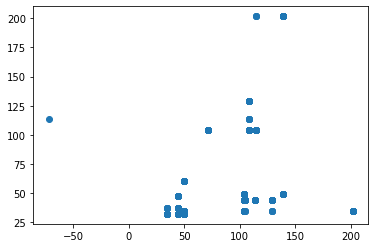

t+1 vs t-278


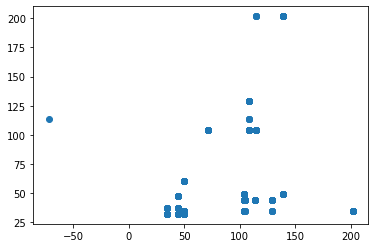

t+1 vs t-279


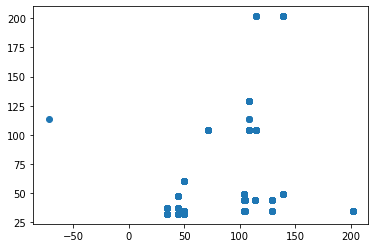

t+1 vs t-280


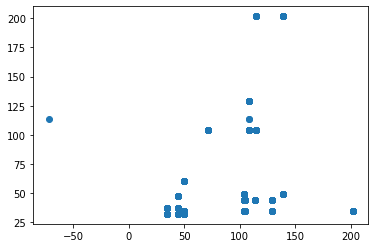

t+1 vs t-281


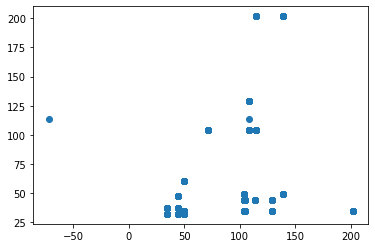

t+1 vs t-282


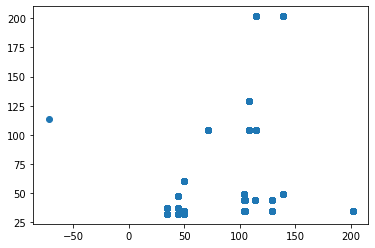

t+1 vs t-283


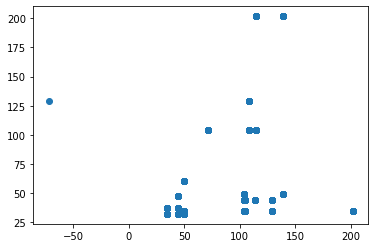

t+1 vs t-284


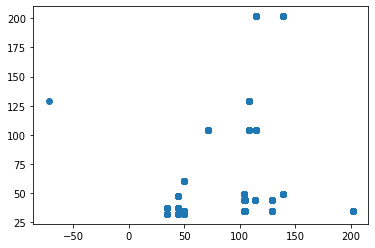

t+1 vs t-285


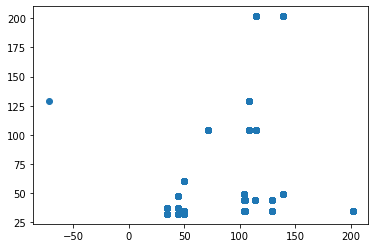

t+1 vs t-286


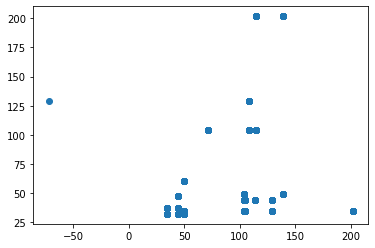

t+1 vs t-287


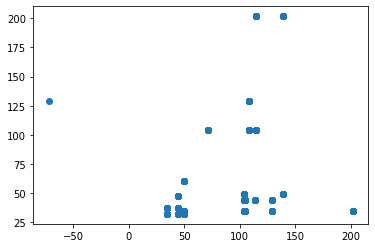

t+1 vs t-288


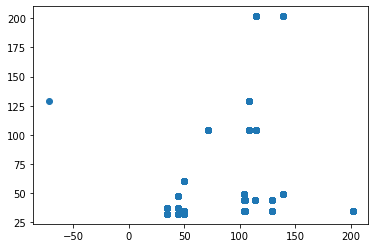

t+1 vs t-289


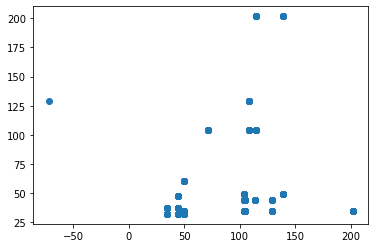

t+1 vs t-290


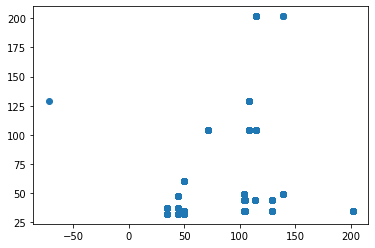

t+1 vs t-291


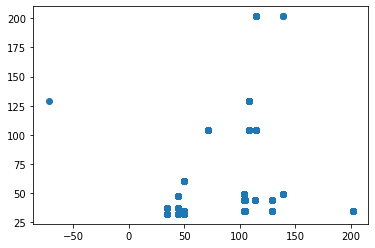

t+1 vs t-292


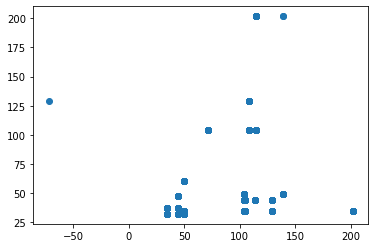

t+1 vs t-293


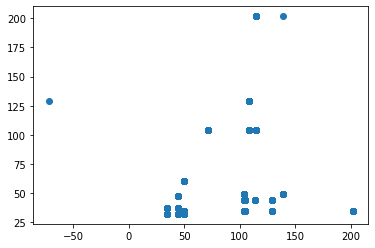

t+1 vs t-294


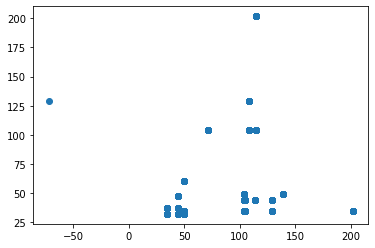

t+1 vs t-295


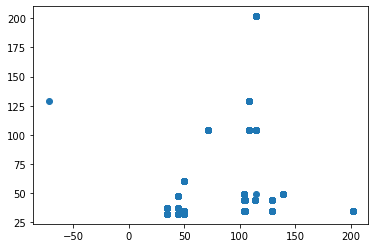

t+1 vs t-296


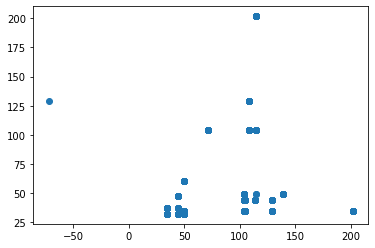

t+1 vs t-297


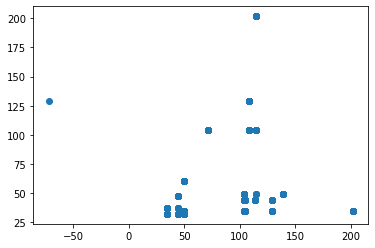

t+1 vs t-298


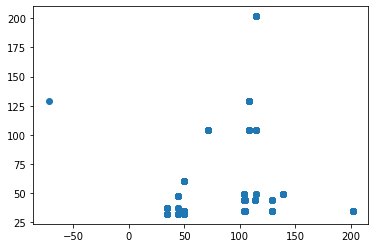

t+1 vs t-299


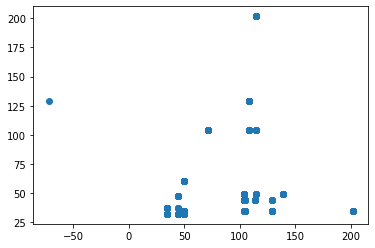

t+1 vs t-300


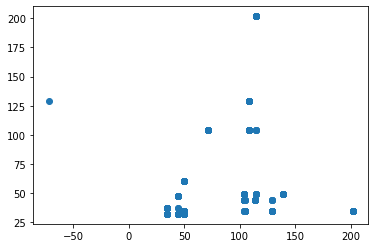

t+1 vs t-301


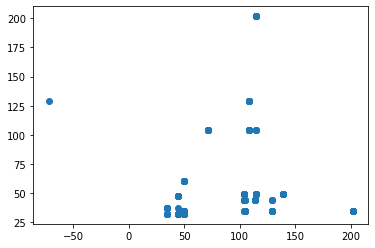

t+1 vs t-302


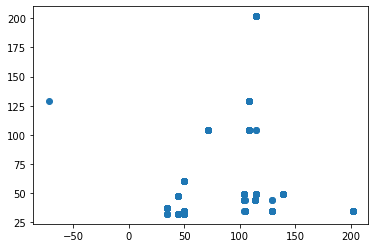

t+1 vs t-303


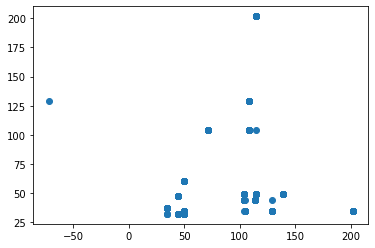

t+1 vs t-304


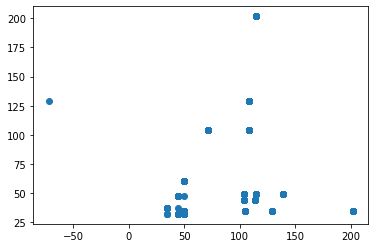

t+1 vs t-305


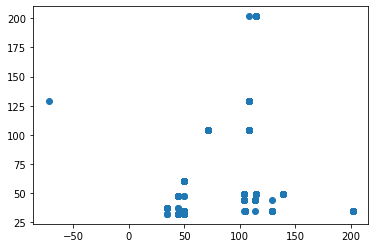

t+1 vs t-306


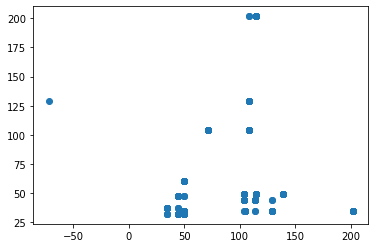

t+1 vs t-307


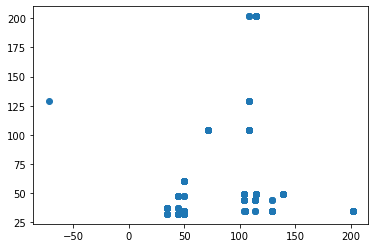

t+1 vs t-308


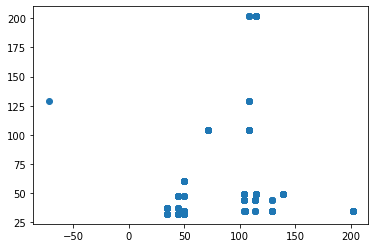

t+1 vs t-309


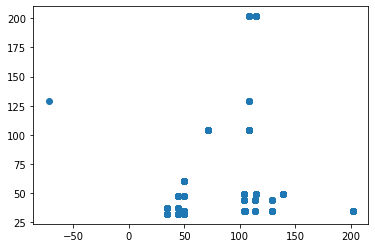

t+1 vs t-310


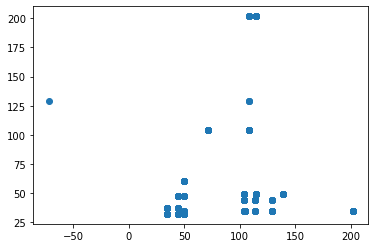

t+1 vs t-311


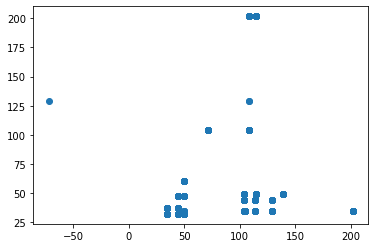

t+1 vs t-312


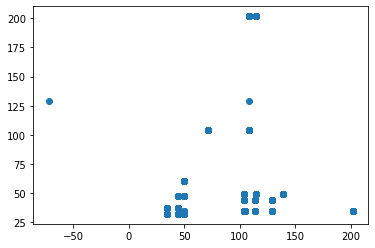

t+1 vs t-313


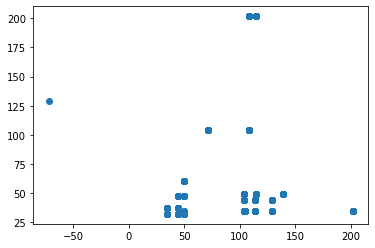

t+1 vs t-314


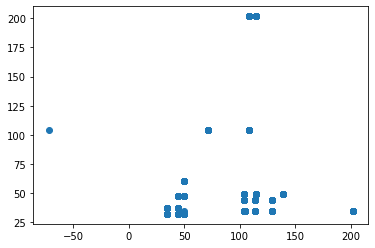

t+1 vs t-315


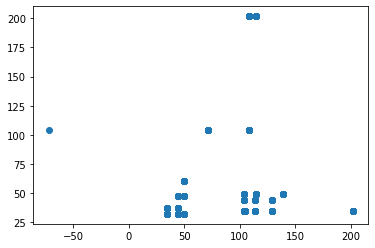

t+1 vs t-316


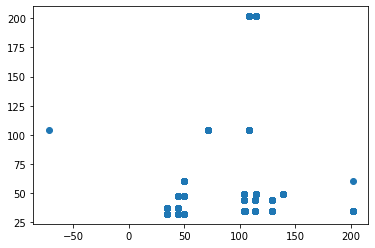

t+1 vs t-317


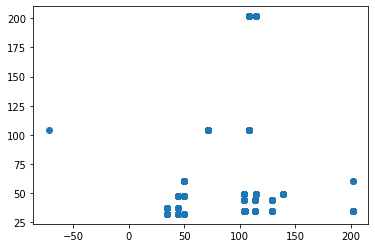

t+1 vs t-318


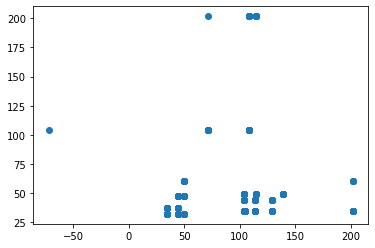

t+1 vs t-319


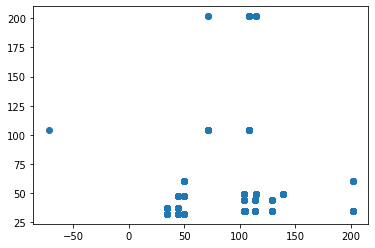

t+1 vs t-320


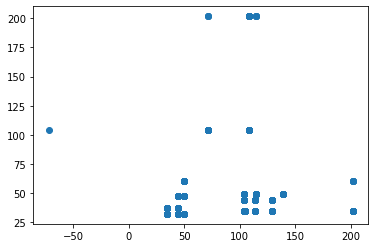

t+1 vs t-321


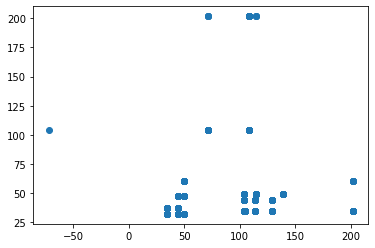

t+1 vs t-322


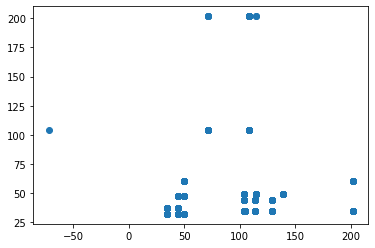

t+1 vs t-323


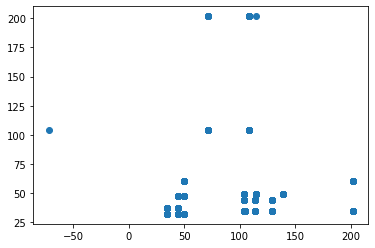

t+1 vs t-324


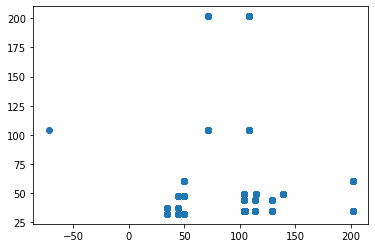

t+1 vs t-325


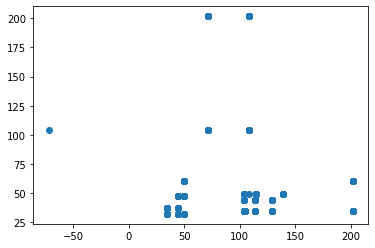

t+1 vs t-326


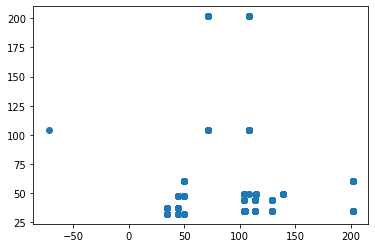

t+1 vs t-327


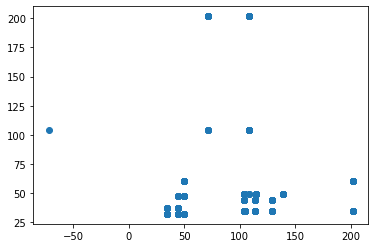

t+1 vs t-328


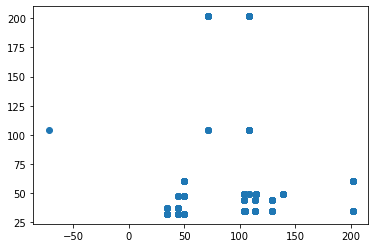

t+1 vs t-329


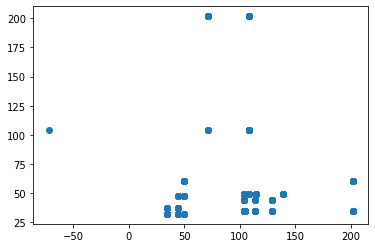

t+1 vs t-330


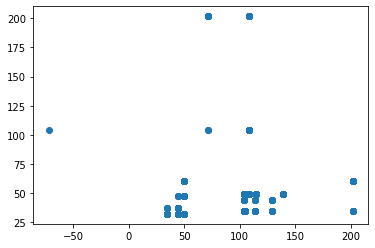

t+1 vs t-331


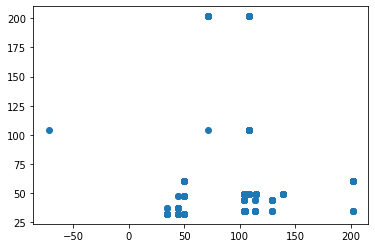

t+1 vs t-332


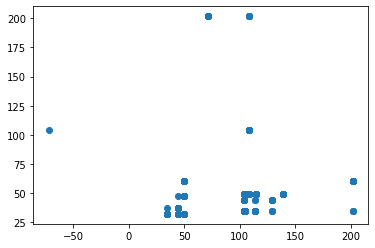

t+1 vs t-333


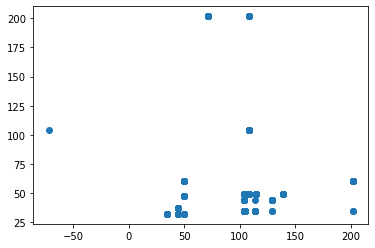

t+1 vs t-334


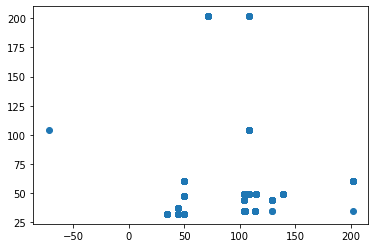

t+1 vs t-335


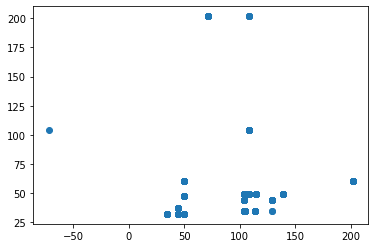

t+1 vs t-336


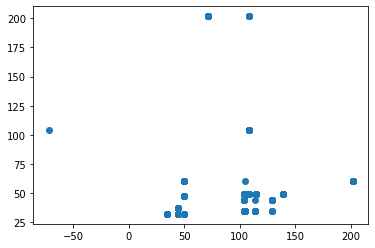

t+1 vs t-337


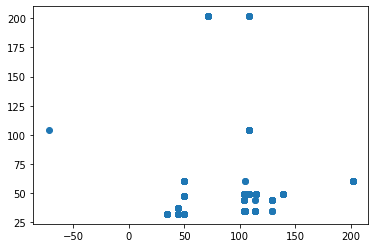

t+1 vs t-338


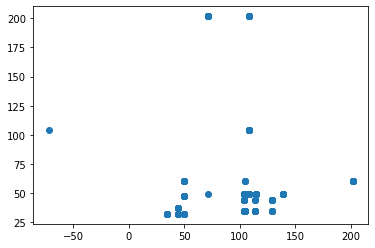

t+1 vs t-339


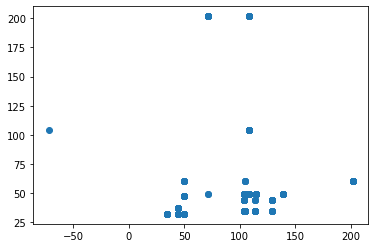

t+1 vs t-340


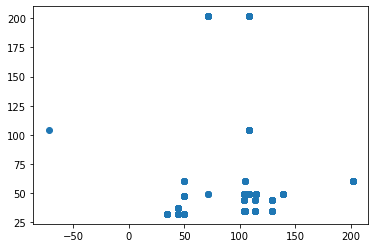

t+1 vs t-341


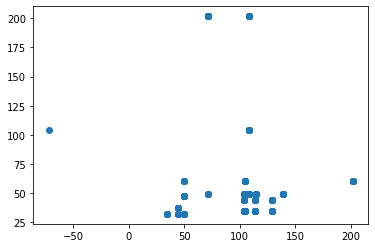

t+1 vs t-342


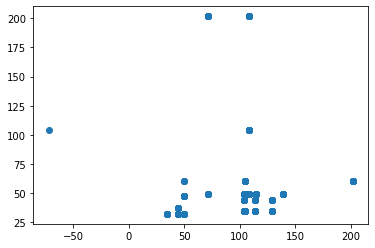

t+1 vs t-343


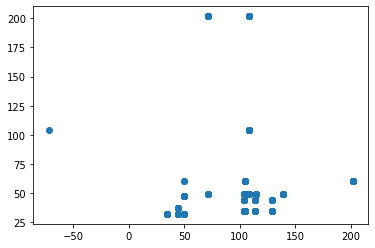

t+1 vs t-344


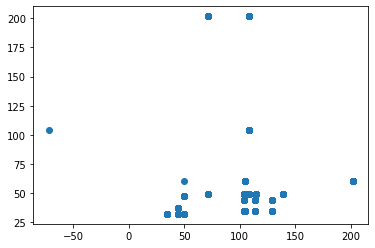

t+1 vs t-345


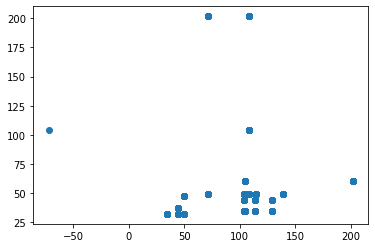

t+1 vs t-346


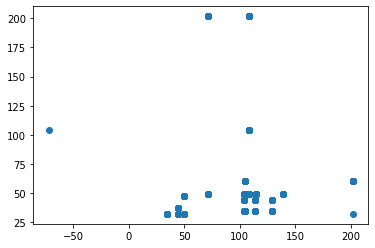

t+1 vs t-347


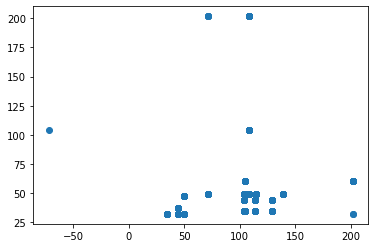

t+1 vs t-348


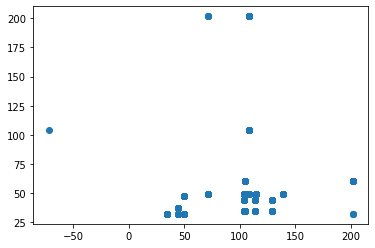

t+1 vs t-349


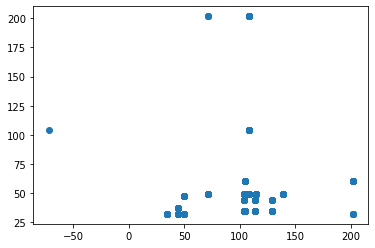

t+1 vs t-350


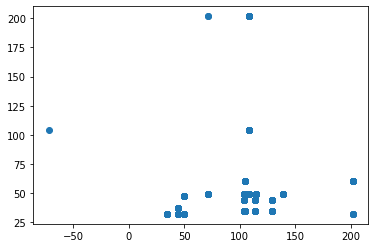

t+1 vs t-351


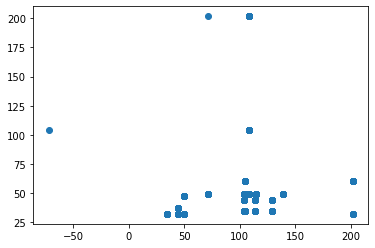

t+1 vs t-352


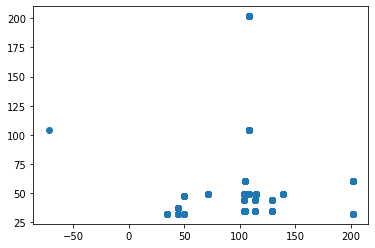

t+1 vs t-353


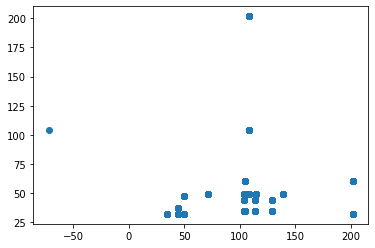

t+1 vs t-354


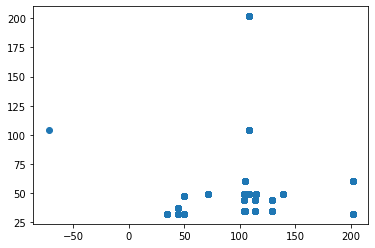

t+1 vs t-355


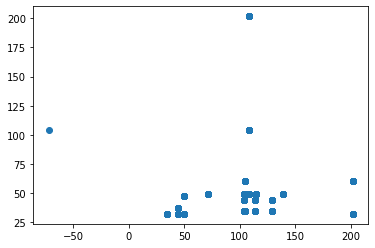

t+1 vs t-356


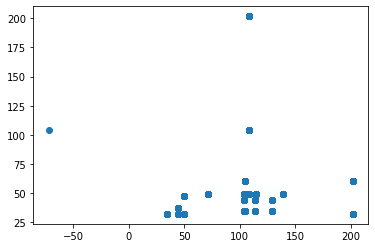

t+1 vs t-357


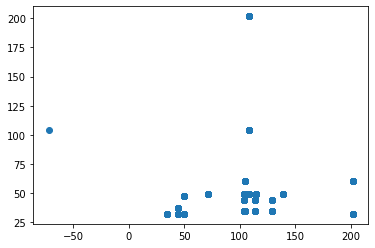

t+1 vs t-358


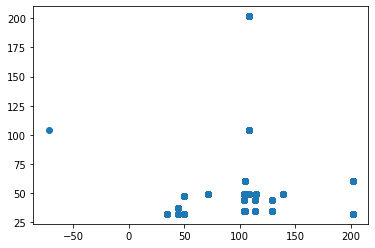

t+1 vs t-359


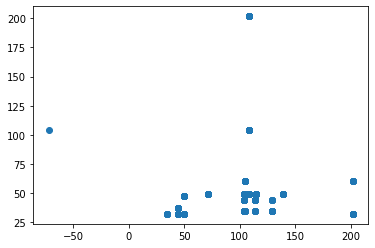

t+1 vs t-360


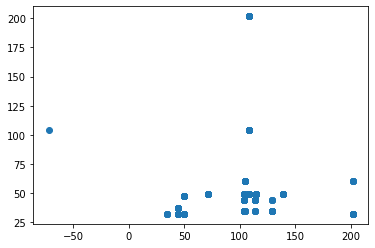

t+1 vs t-361


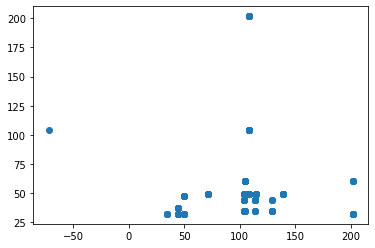

t+1 vs t-362


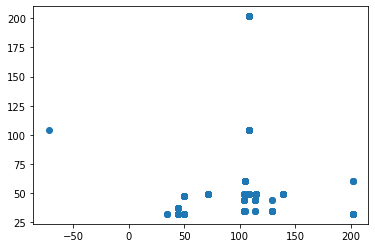

t+1 vs t-363


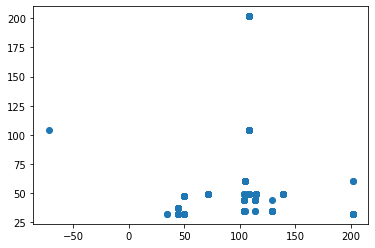

t+1 vs t-364


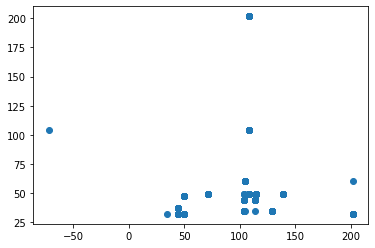

t+1 vs t-365


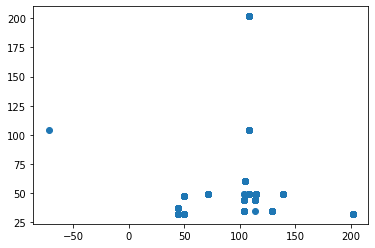

t+1 vs t-366


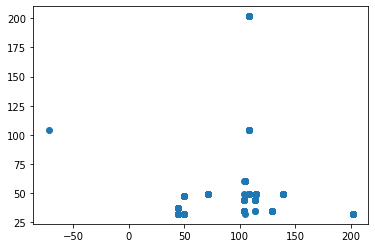

t+1 vs t-367


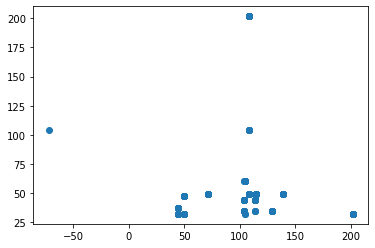

t+1 vs t-368


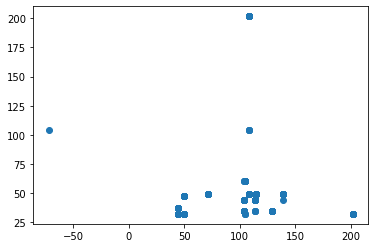

t+1 vs t-369


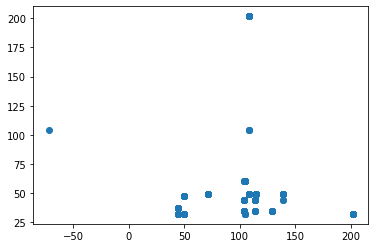

t+1 vs t-370


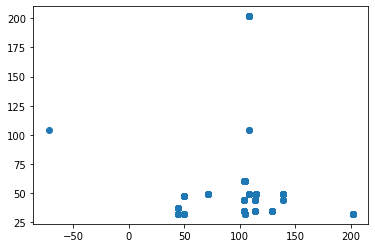

t+1 vs t-371


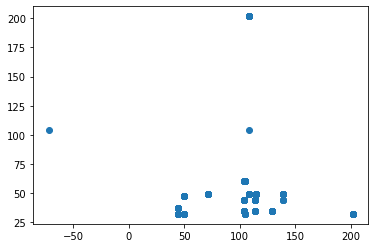

t+1 vs t-372


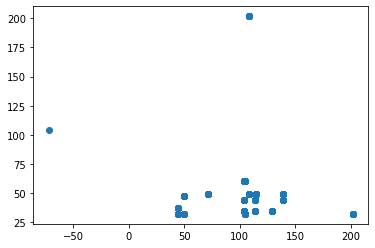

t+1 vs t-373


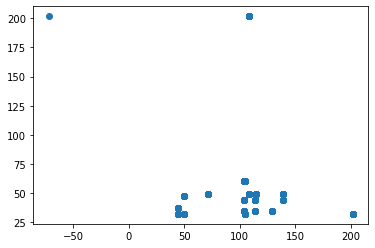

t+1 vs t-374


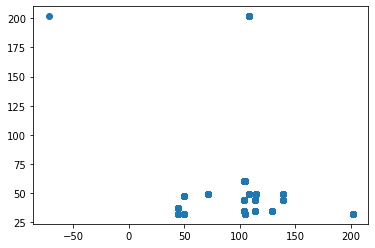

t+1 vs t-375


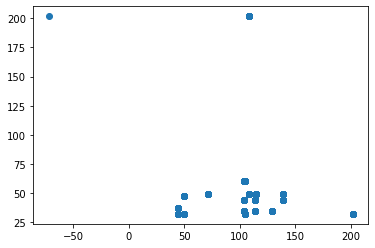

t+1 vs t-376


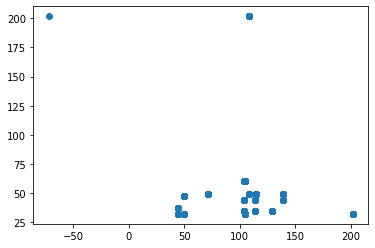

t+1 vs t-377


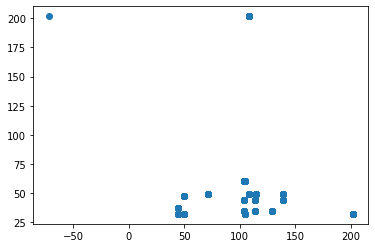

t+1 vs t-378


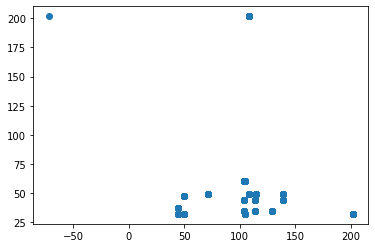

t+1 vs t-379


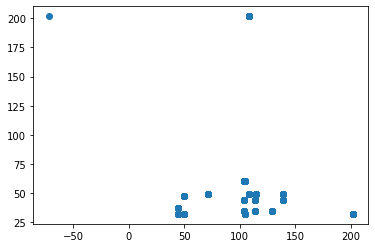

t+1 vs t-380


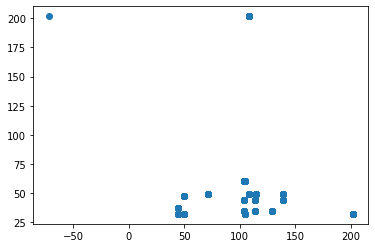

t+1 vs t-381


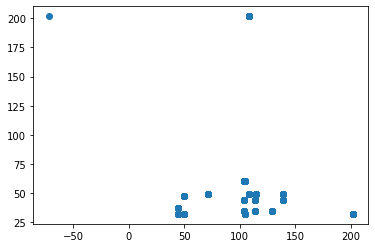

t+1 vs t-382


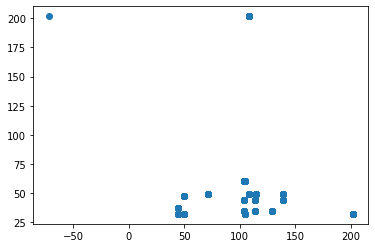

t+1 vs t-383


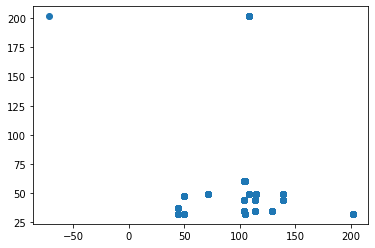

t+1 vs t-384


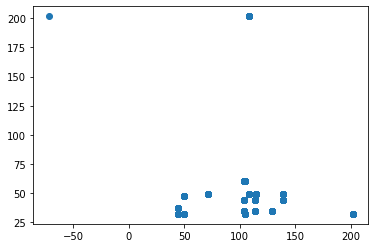

t+1 vs t-385


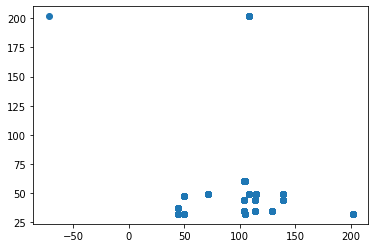

t+1 vs t-386


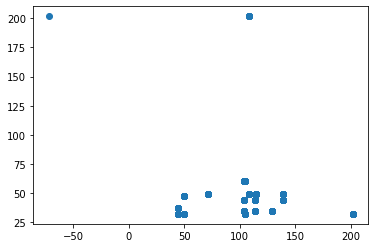

t+1 vs t-387


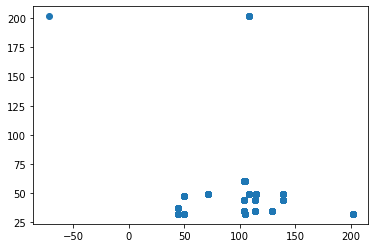

t+1 vs t-388


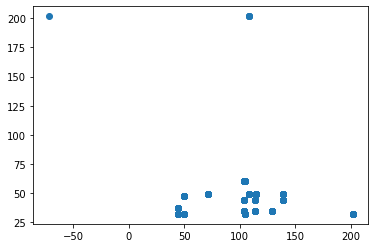

t+1 vs t-389


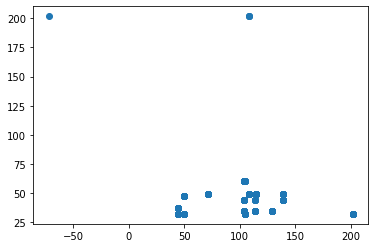

t+1 vs t-390


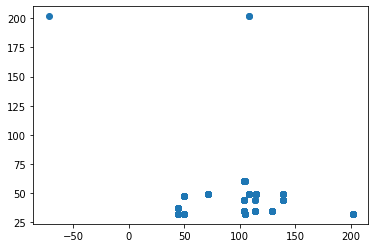

t+1 vs t-391


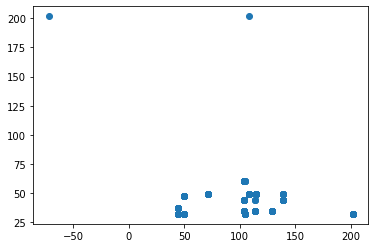

t+1 vs t-392


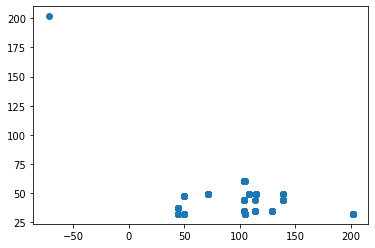

t+1 vs t-393


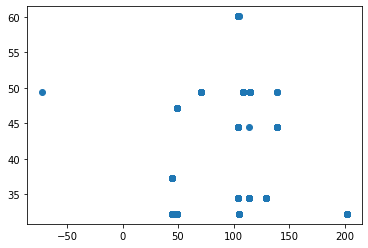

t+1 vs t-394


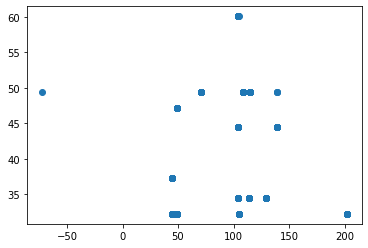

t+1 vs t-395


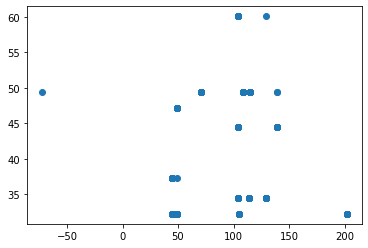

t+1 vs t-396


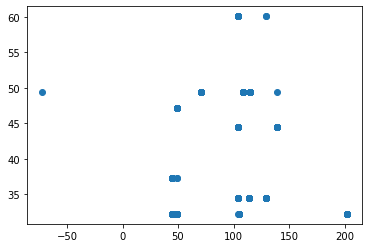

t+1 vs t-397


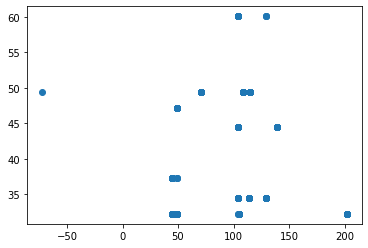

t+1 vs t-398


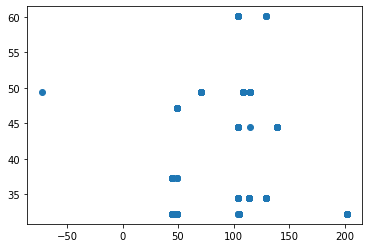

t+1 vs t-399


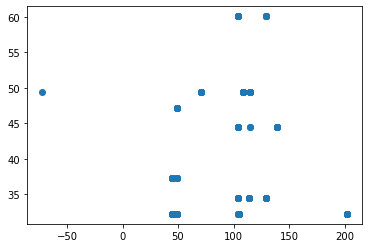

t+1 vs t-400


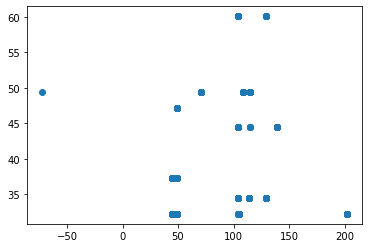

t+1 vs t-401


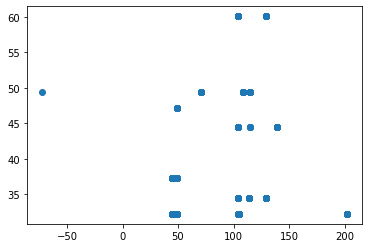

t+1 vs t-402


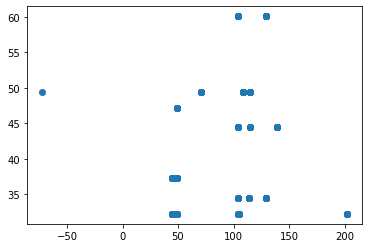

t+1 vs t-403


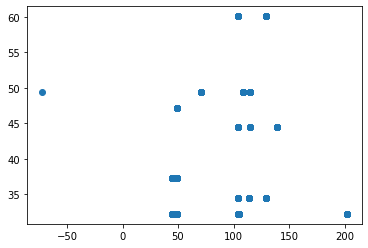

t+1 vs t-404


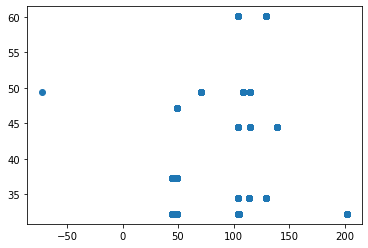

t+1 vs t-405


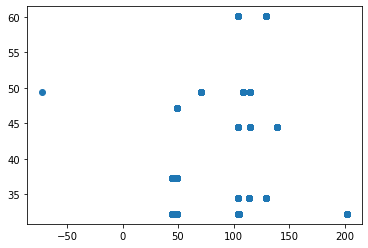

t+1 vs t-406


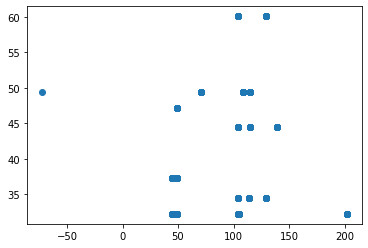

t+1 vs t-407


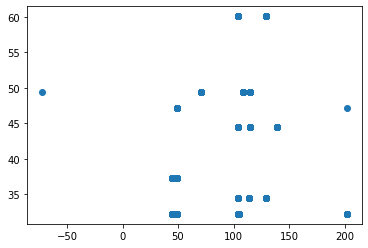

t+1 vs t-408


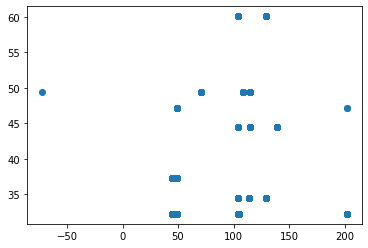

t+1 vs t-409


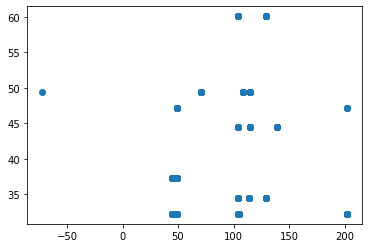

t+1 vs t-410


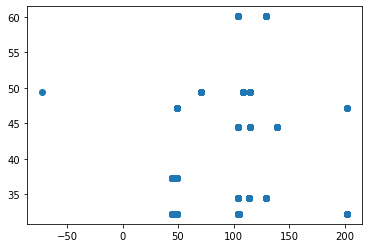

t+1 vs t-411


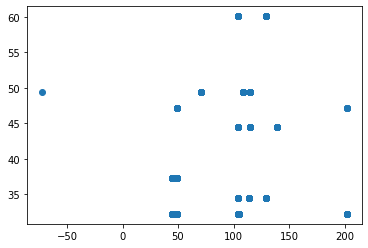

t+1 vs t-412


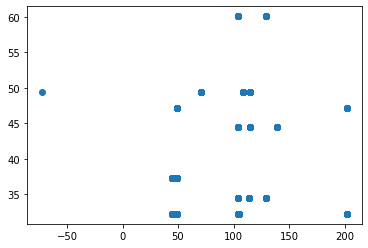

t+1 vs t-413


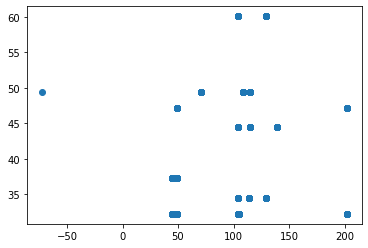

t+1 vs t-414


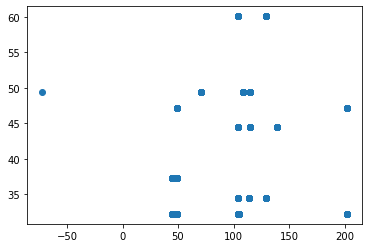

t+1 vs t-415


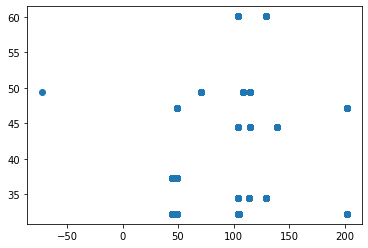

t+1 vs t-416


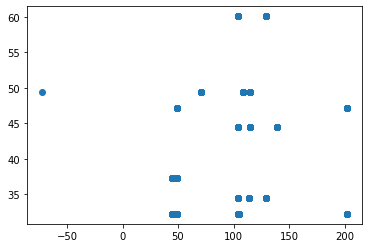

t+1 vs t-417


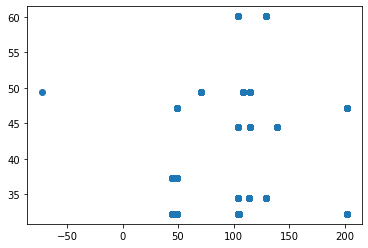

t+1 vs t-418


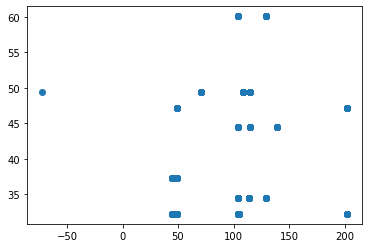

t+1 vs t-419


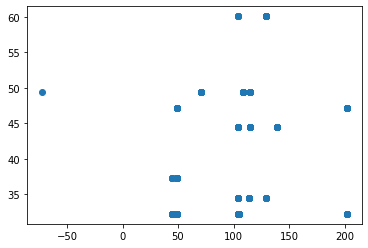

t+1 vs t-420


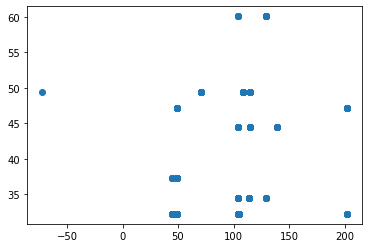

t+1 vs t-421


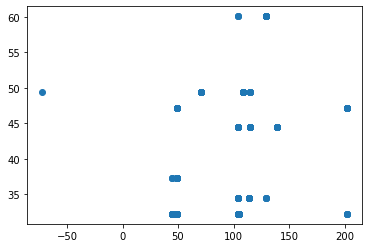

t+1 vs t-422


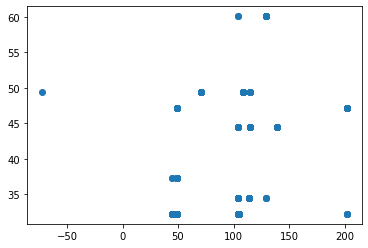

t+1 vs t-423


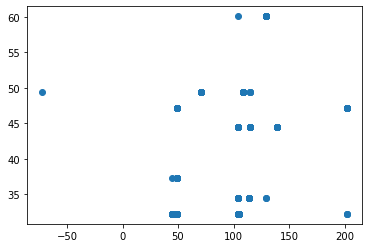

t+1 vs t-424


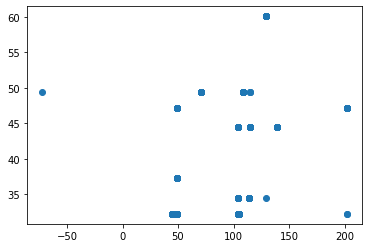

t+1 vs t-425


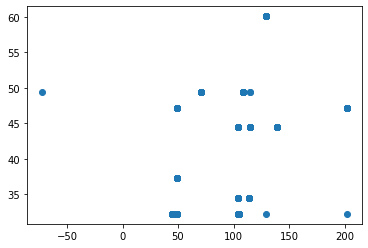

t+1 vs t-426


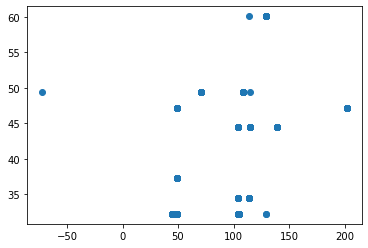

t+1 vs t-427


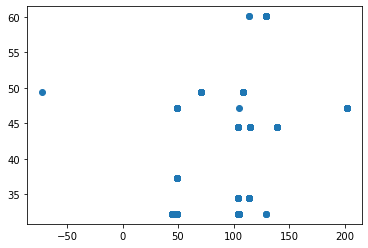

t+1 vs t-428


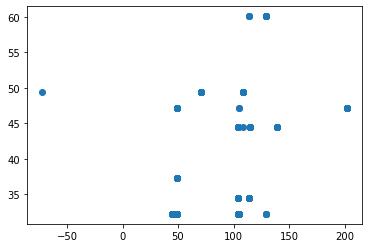

t+1 vs t-429


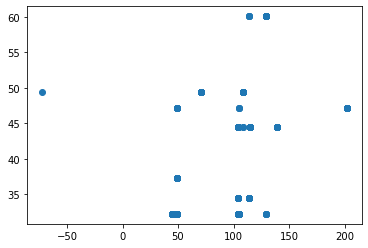

t+1 vs t-430


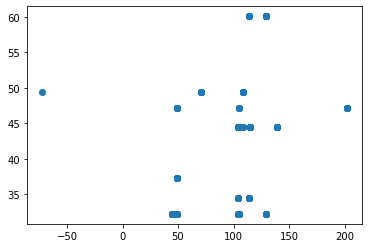

t+1 vs t-431


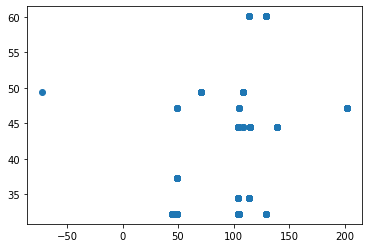

t+1 vs t-432


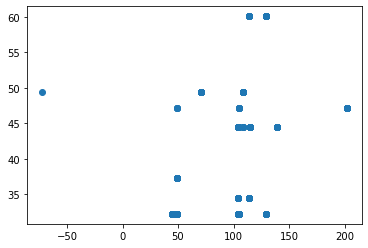

t+1 vs t-433


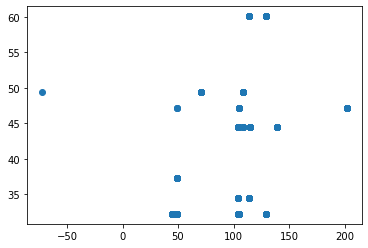

t+1 vs t-434


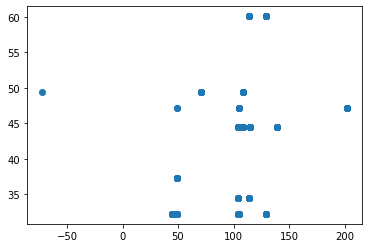

t+1 vs t-435


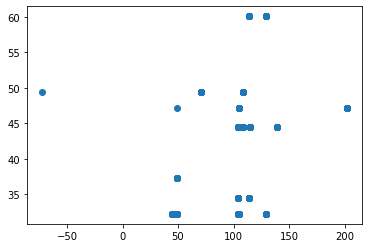

t+1 vs t-436


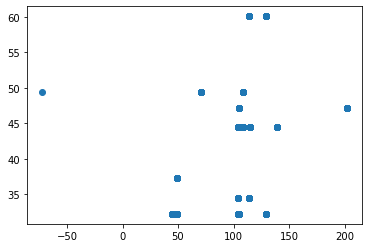

t+1 vs t-437


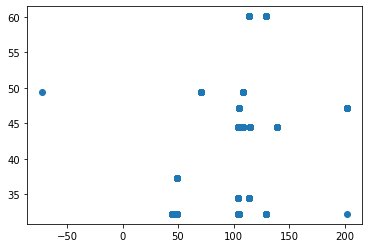

t+1 vs t-438


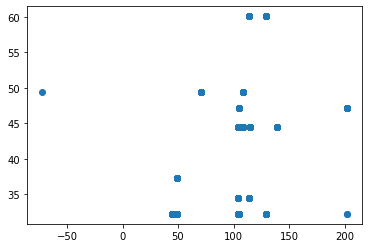

t+1 vs t-439


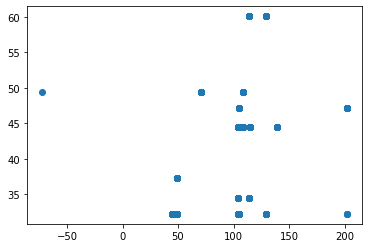

t+1 vs t-440


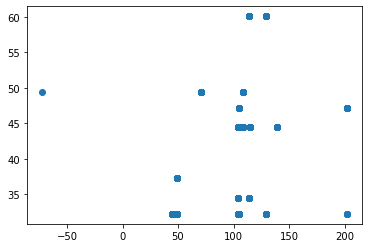

t+1 vs t-441


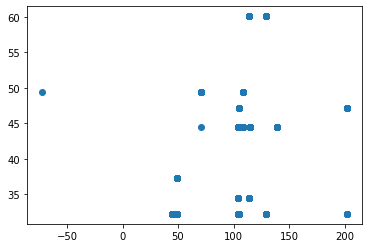

t+1 vs t-442


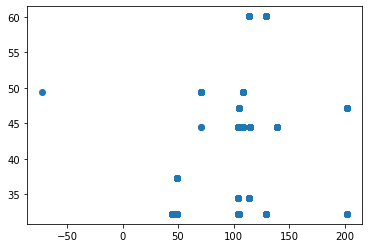

t+1 vs t-443


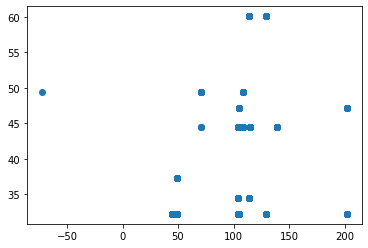

t+1 vs t-444


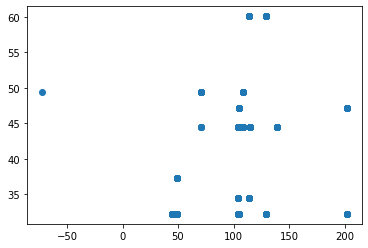

t+1 vs t-445


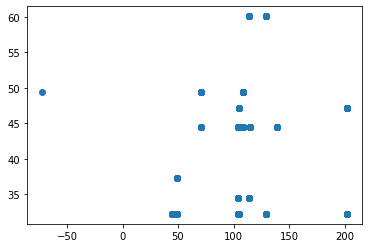

t+1 vs t-446


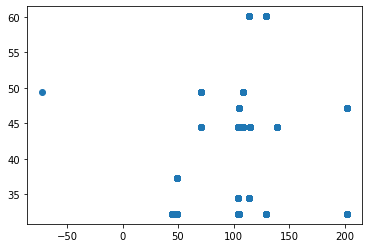

t+1 vs t-447


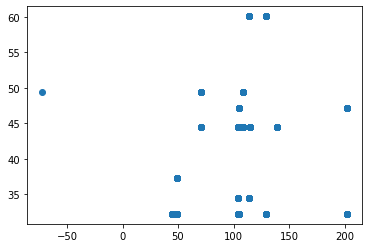

t+1 vs t-448


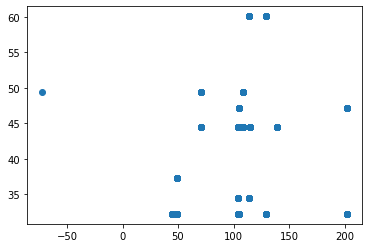

t+1 vs t-449


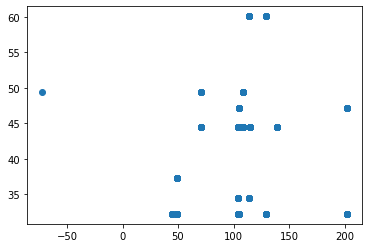

t+1 vs t-450


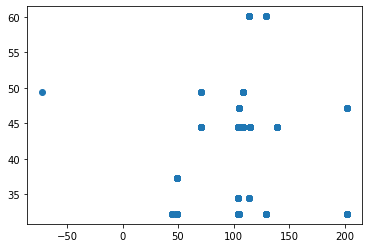

t+1 vs t-451


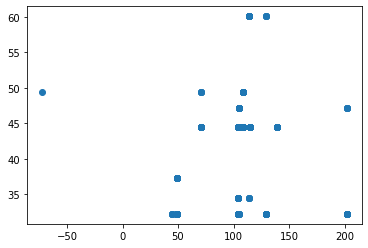

t+1 vs t-452


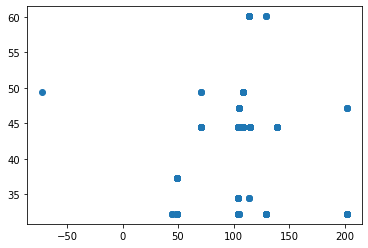

t+1 vs t-453


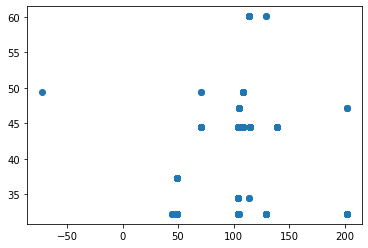

t+1 vs t-454


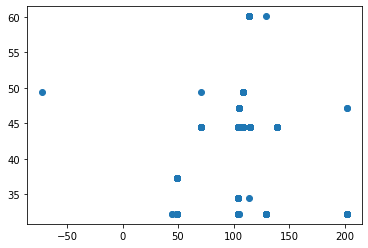

t+1 vs t-455


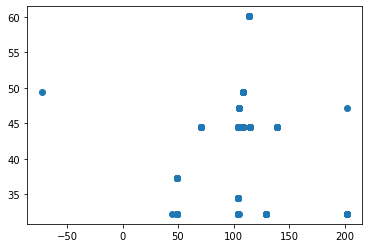

t+1 vs t-456


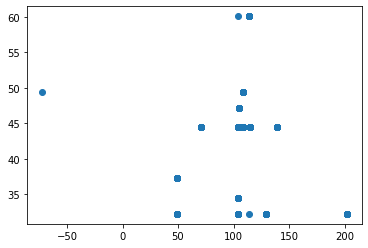

t+1 vs t-457


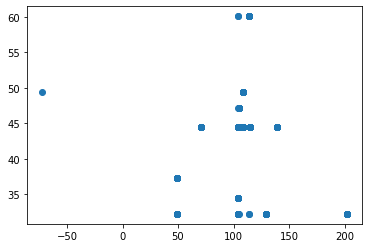

t+1 vs t-458


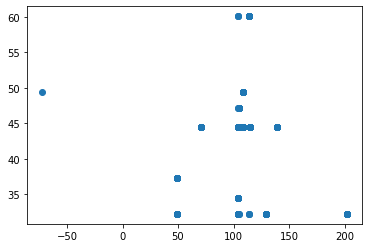

t+1 vs t-459


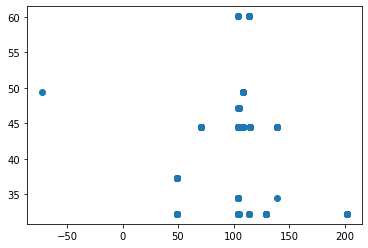

t+1 vs t-460


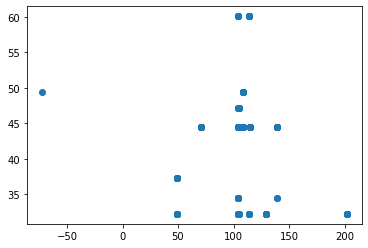

t+1 vs t-461


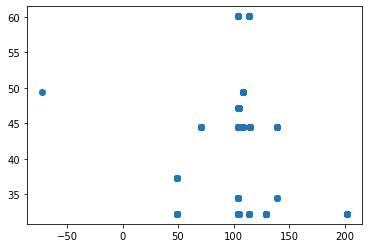

t+1 vs t-462


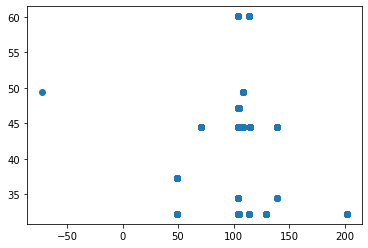

t+1 vs t-463


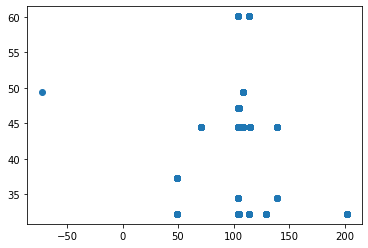

t+1 vs t-464


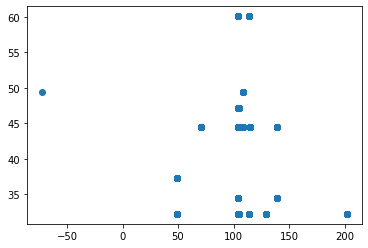

t+1 vs t-465


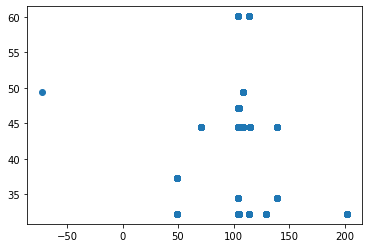

t+1 vs t-466


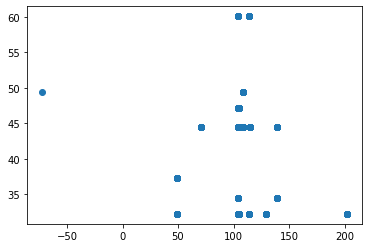

t+1 vs t-467


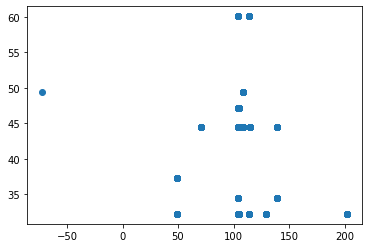

t+1 vs t-468


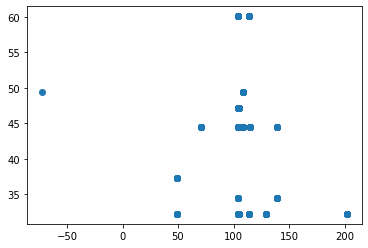

t+1 vs t-469


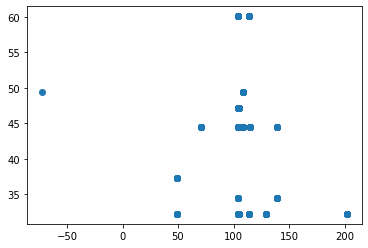

t+1 vs t-470


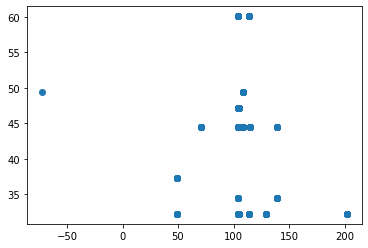

t+1 vs t-471


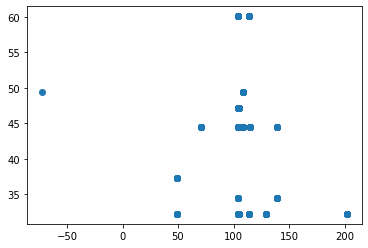

t+1 vs t-472


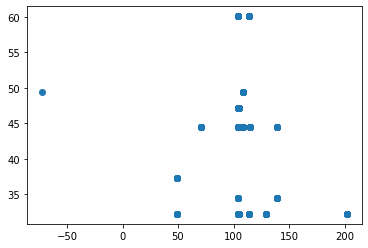

t+1 vs t-473


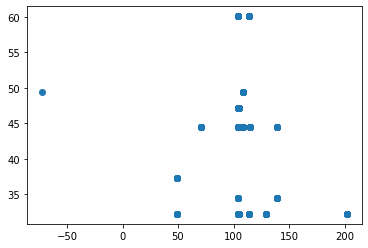

t+1 vs t-474


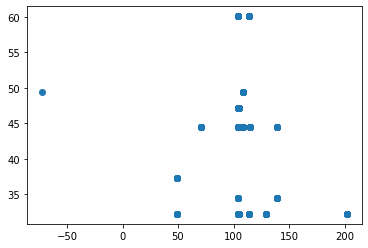

t+1 vs t-475


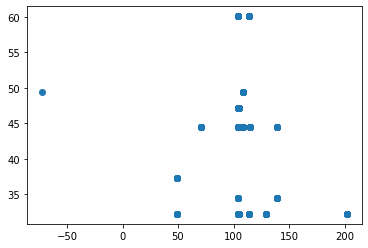

t+1 vs t-476


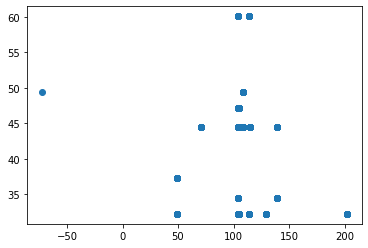

t+1 vs t-477


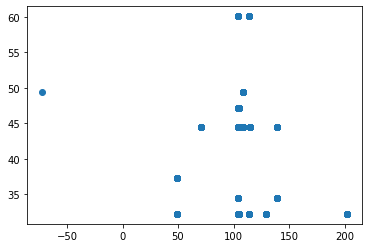

t+1 vs t-478


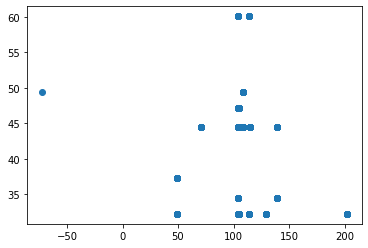

t+1 vs t-479


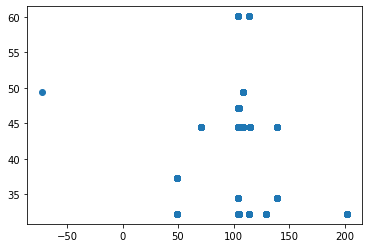

t+1 vs t-480


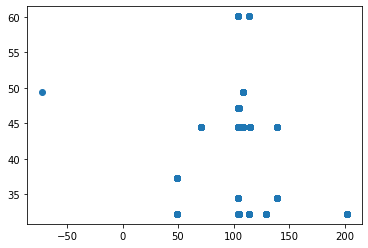

t+1 vs t-481


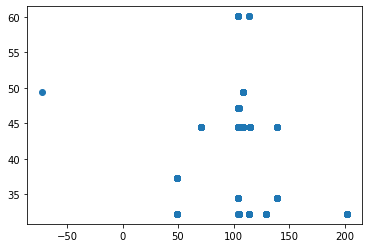

t+1 vs t-482


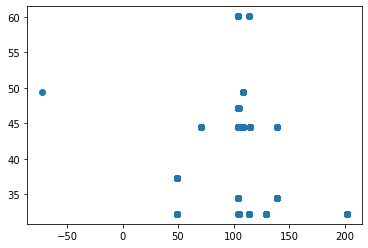

t+1 vs t-483


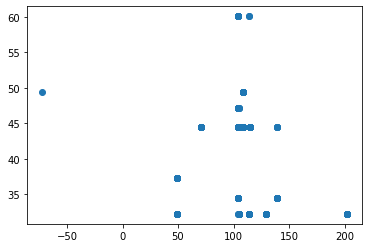

t+1 vs t-484


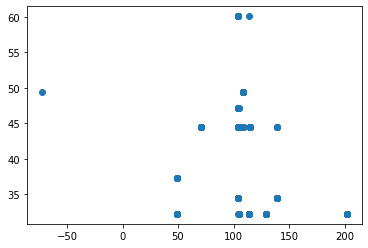

t+1 vs t-485


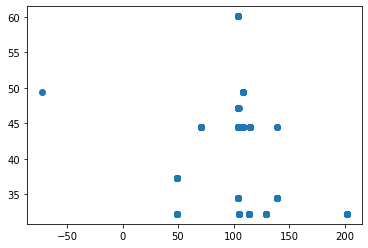

t+1 vs t-486


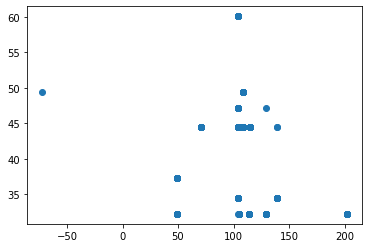

t+1 vs t-487


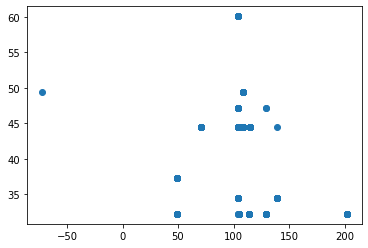

t+1 vs t-488


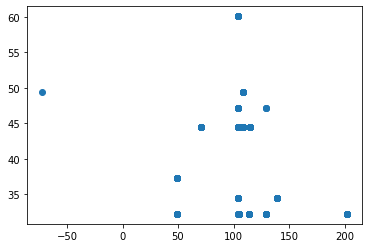

t+1 vs t-489


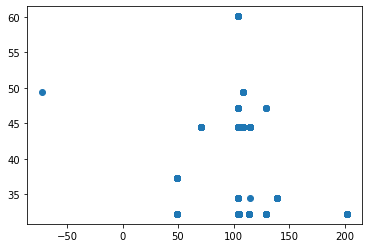

t+1 vs t-490


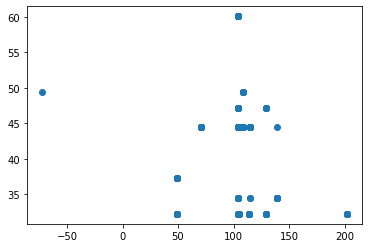

t+1 vs t-491


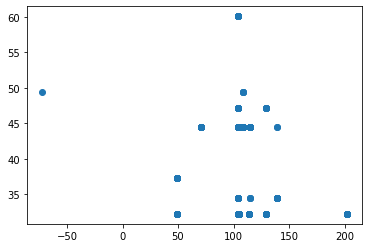

t+1 vs t-492


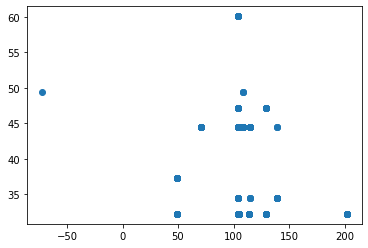

t+1 vs t-493


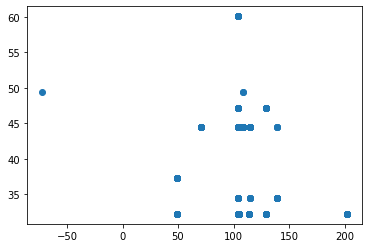

t+1 vs t-494


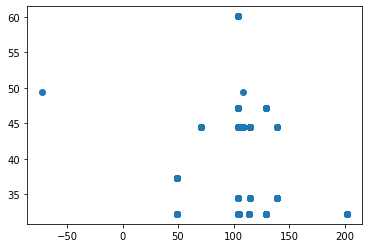

t+1 vs t-495


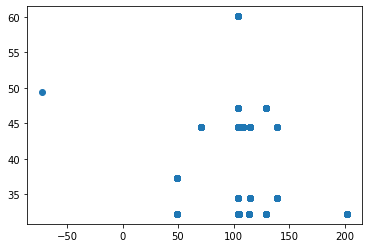

t+1 vs t-496


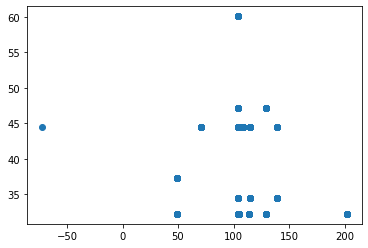

t+1 vs t-497


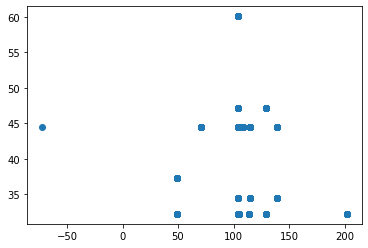

t+1 vs t-498


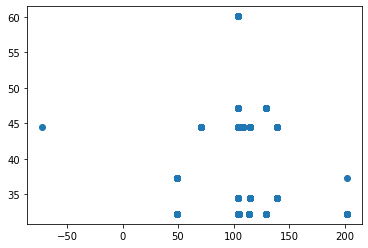

t+1 vs t-499


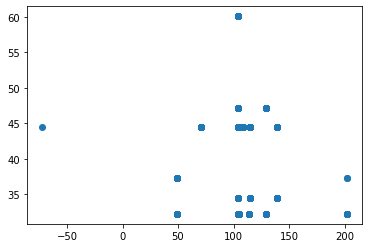

t+1 vs t-500


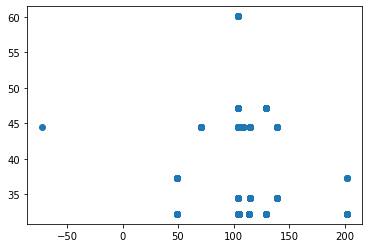

t+1 vs t-501


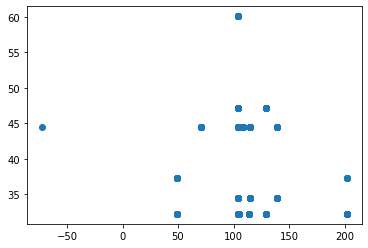

t+1 vs t-502


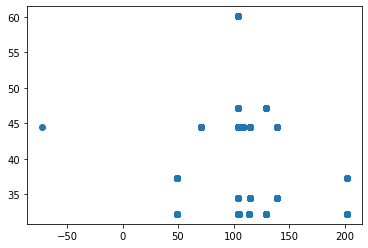

t+1 vs t-503


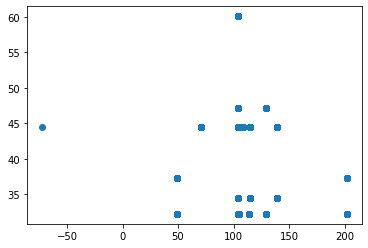

t+1 vs t-504


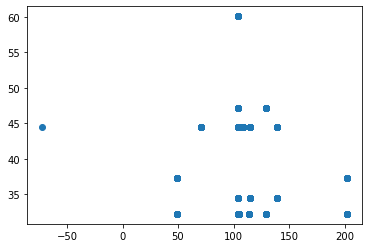

t+1 vs t-505


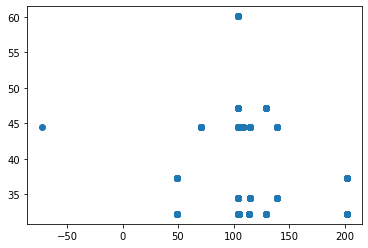

t+1 vs t-506


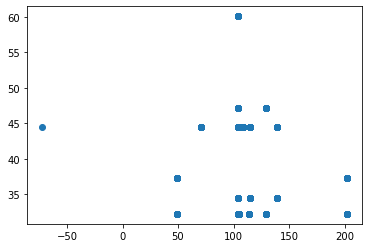

t+1 vs t-507


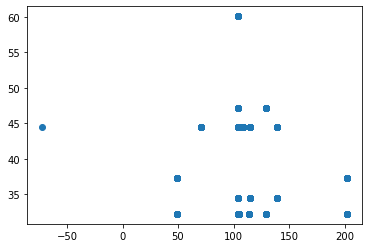

t+1 vs t-508


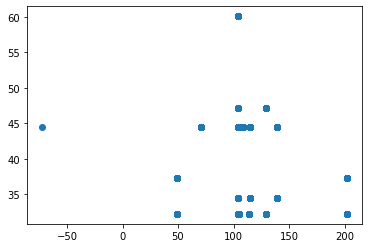

t+1 vs t-509


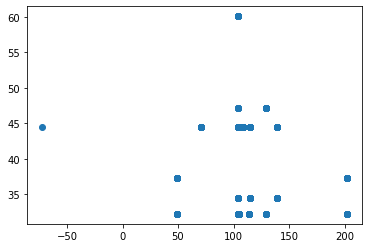

t+1 vs t-510


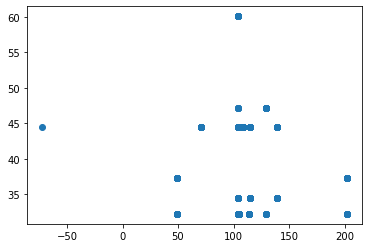

t+1 vs t-511


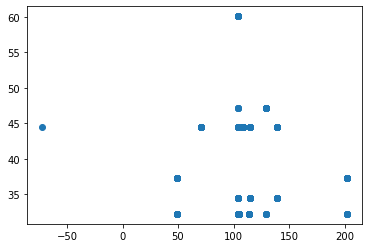

t+1 vs t-512


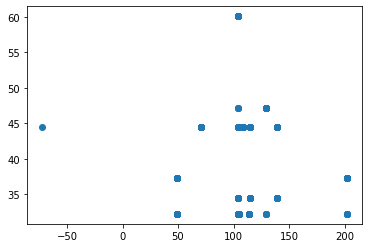

t+1 vs t-513


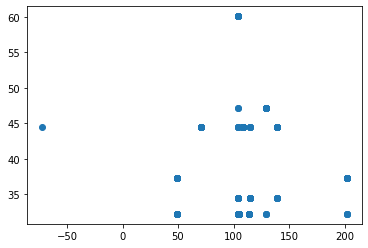

t+1 vs t-514


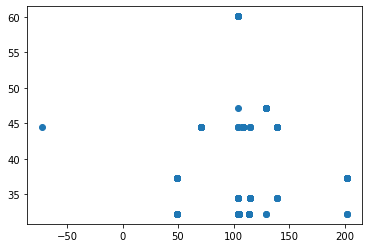

t+1 vs t-515


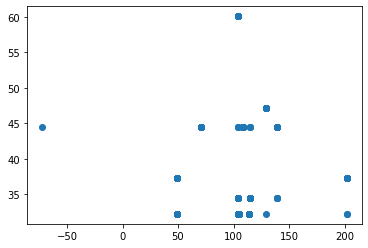

t+1 vs t-516


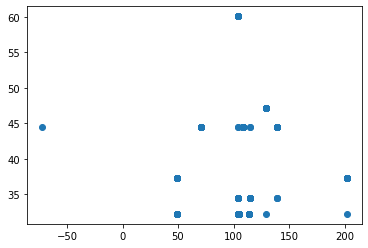

t+1 vs t-517


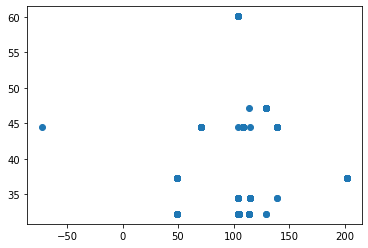

t+1 vs t-518


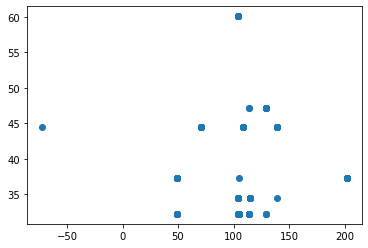

t+1 vs t-519


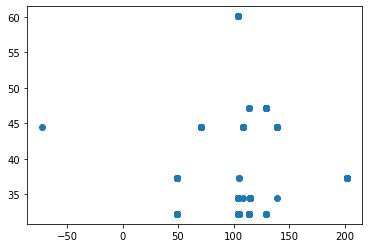

t+1 vs t-520


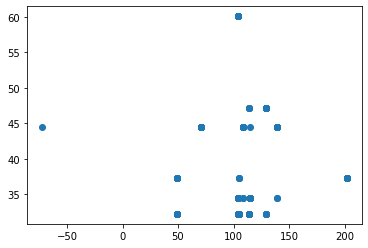

t+1 vs t-521


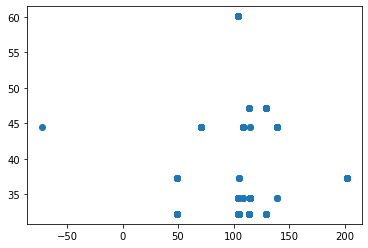

t+1 vs t-522


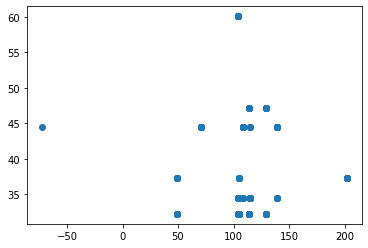

t+1 vs t-523


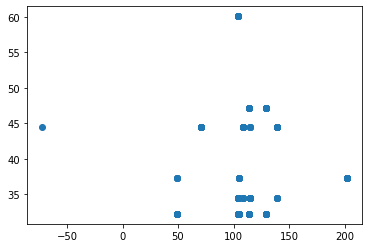

t+1 vs t-524


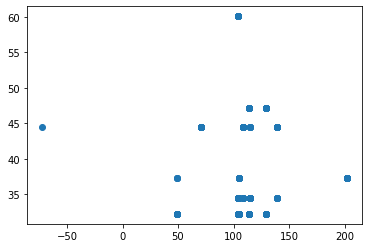

t+1 vs t-525


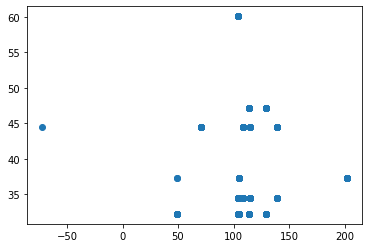

t+1 vs t-526


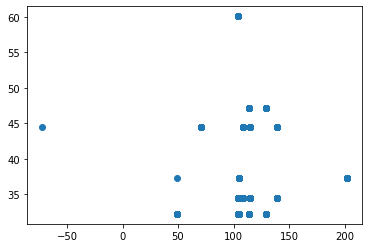

t+1 vs t-527


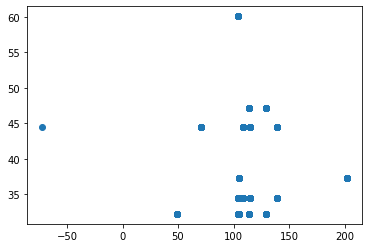

t+1 vs t-528


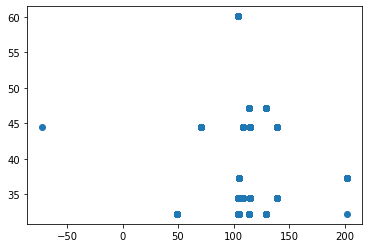

t+1 vs t-529


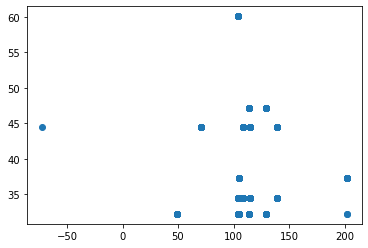

t+1 vs t-530


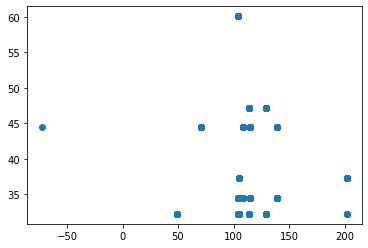

t+1 vs t-531


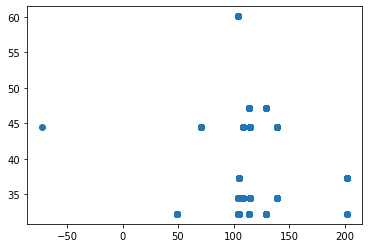

t+1 vs t-532


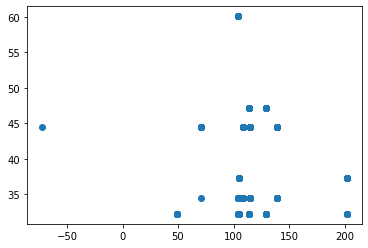

t+1 vs t-533


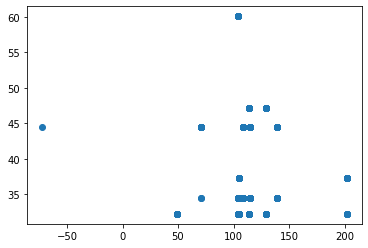

t+1 vs t-534


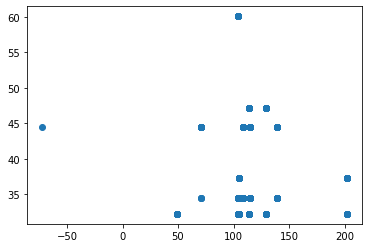

t+1 vs t-535


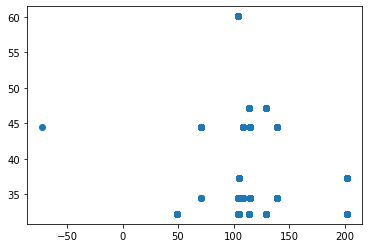

t+1 vs t-536


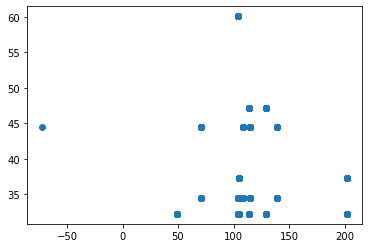

t+1 vs t-537


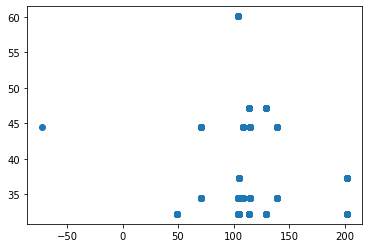

t+1 vs t-538


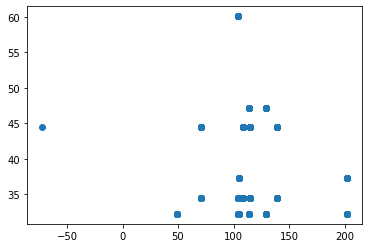

t+1 vs t-539


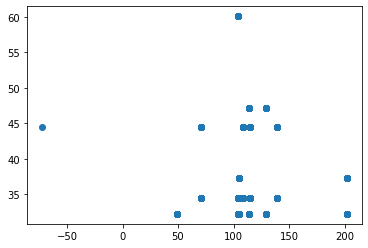

t+1 vs t-540


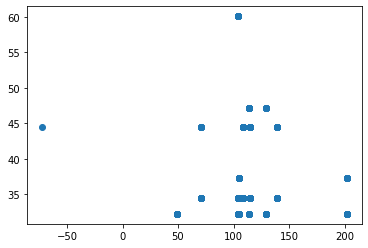

t+1 vs t-541


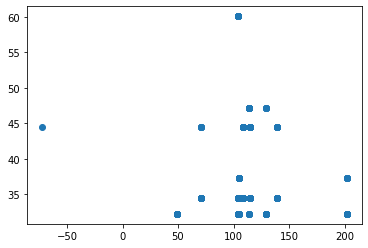

t+1 vs t-542


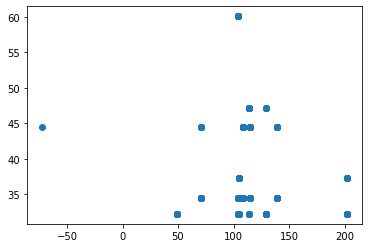

t+1 vs t-543


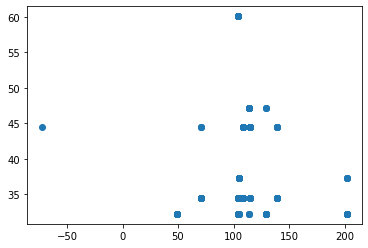

t+1 vs t-544


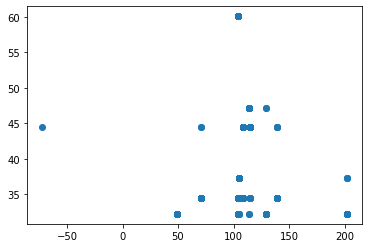

t+1 vs t-545


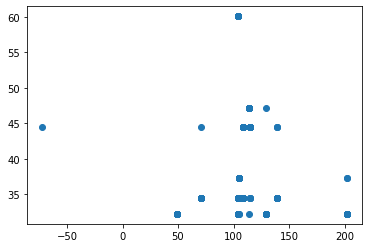

t+1 vs t-546


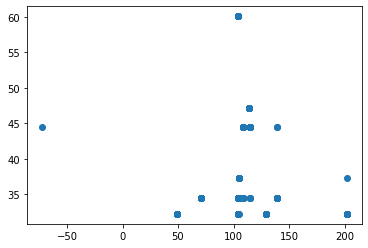

t+1 vs t-547


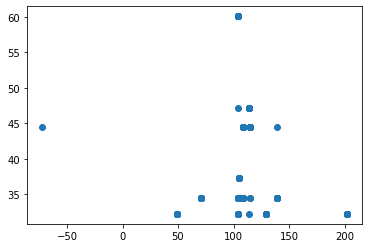

t+1 vs t-548


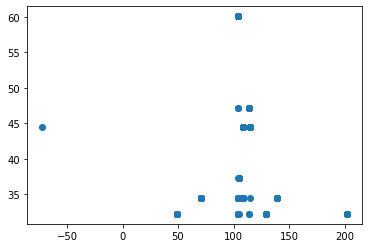

t+1 vs t-549


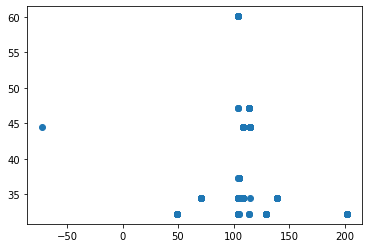

t+1 vs t-550


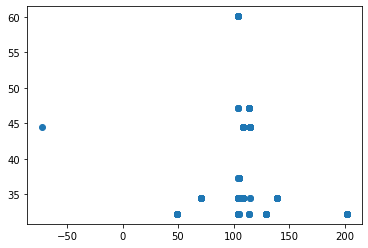

t+1 vs t-551


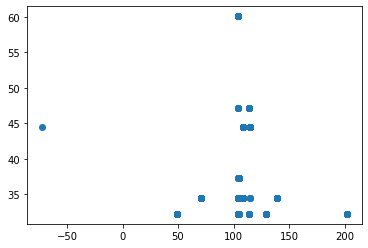

t+1 vs t-552


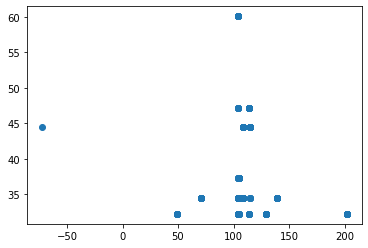

t+1 vs t-553


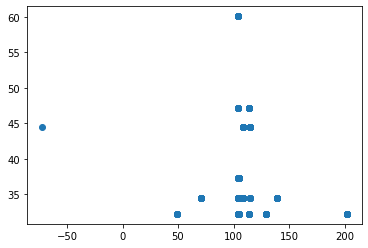

t+1 vs t-554


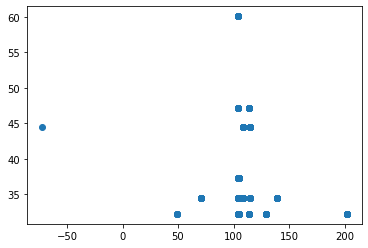

t+1 vs t-555


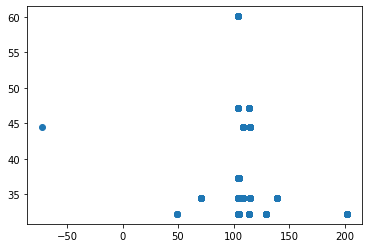

t+1 vs t-556


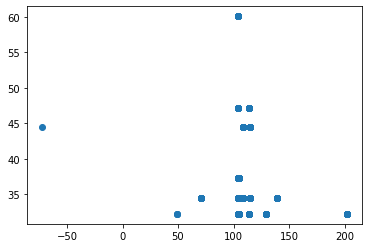

t+1 vs t-557


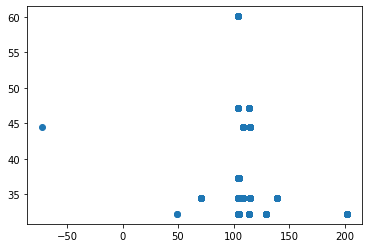

t+1 vs t-558


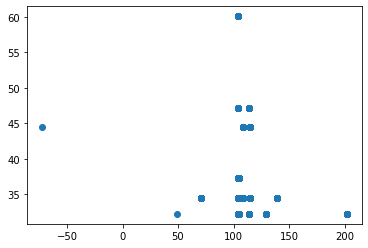

t+1 vs t-559


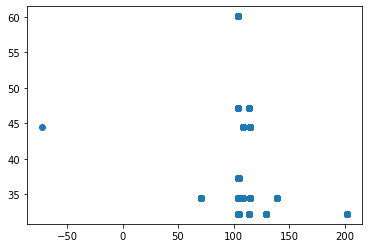

t+1 vs t-560


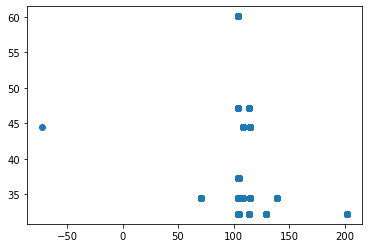

t+1 vs t-561


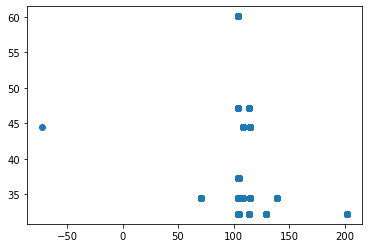

t+1 vs t-562


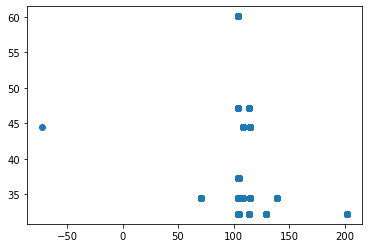

t+1 vs t-563


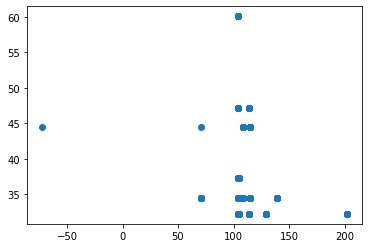

t+1 vs t-564


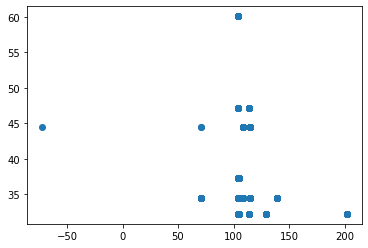

t+1 vs t-565


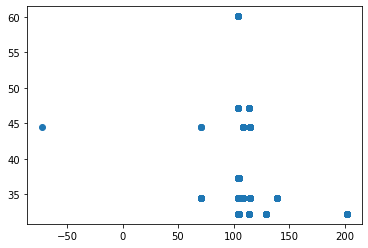

t+1 vs t-566


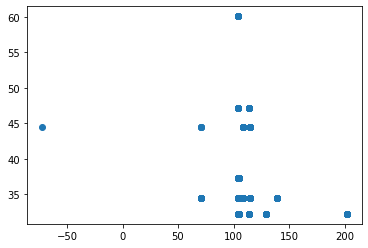

t+1 vs t-567


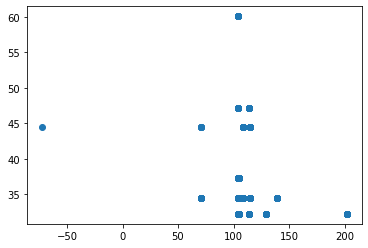

t+1 vs t-568


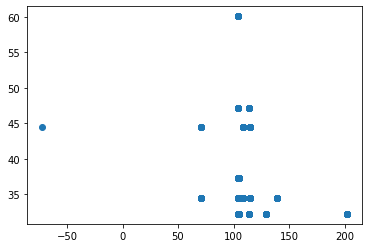

t+1 vs t-569


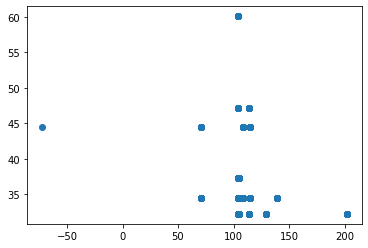

t+1 vs t-570


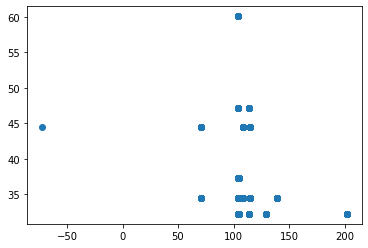

t+1 vs t-571


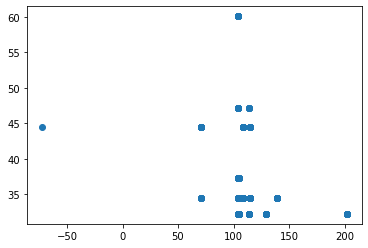

t+1 vs t-572


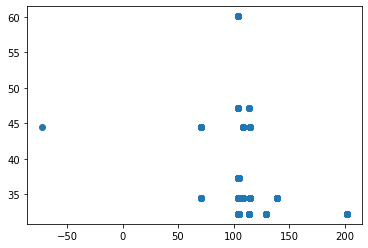

t+1 vs t-573


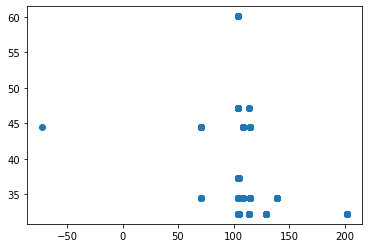

t+1 vs t-574


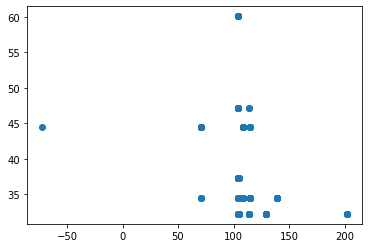

t+1 vs t-575


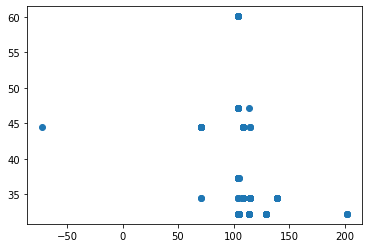

t+1 vs t-576


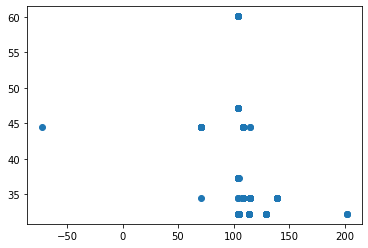

t+1 vs t-577


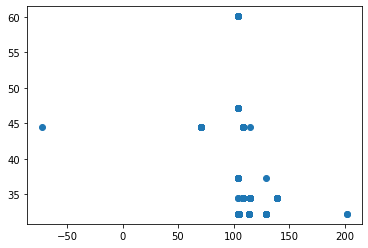

t+1 vs t-578


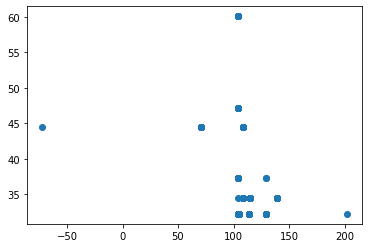

t+1 vs t-579


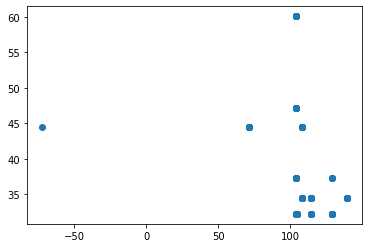

t+1 vs t-580


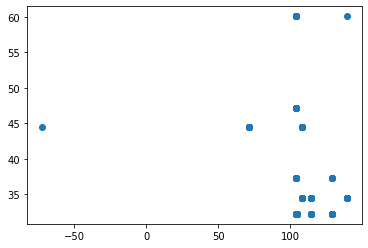

t+1 vs t-581


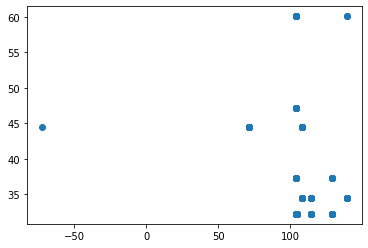

t+1 vs t-582


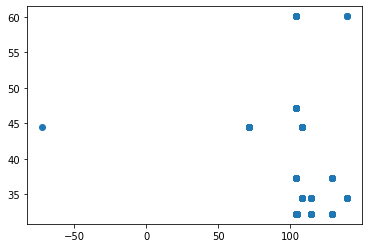

t+1 vs t-583


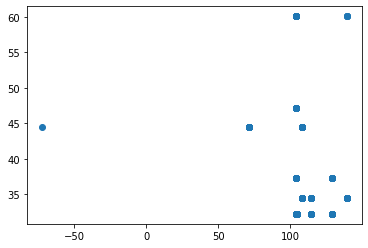

t+1 vs t-584


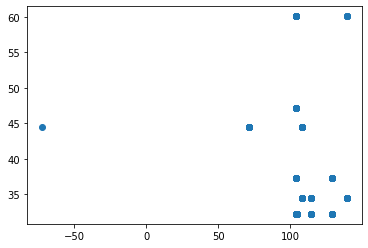

t+1 vs t-585


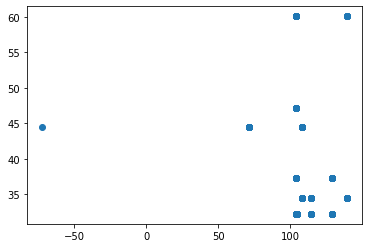

t+1 vs t-586


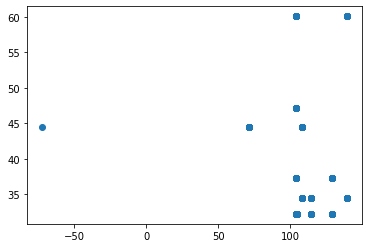

t+1 vs t-587


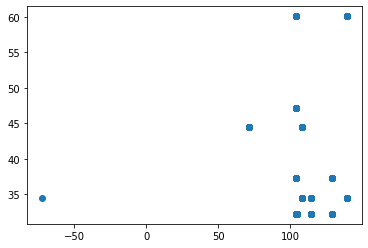

t+1 vs t-588


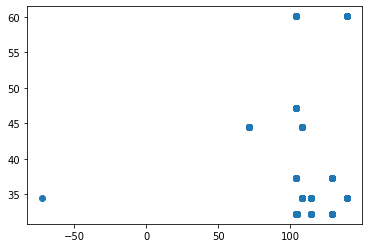

t+1 vs t-589


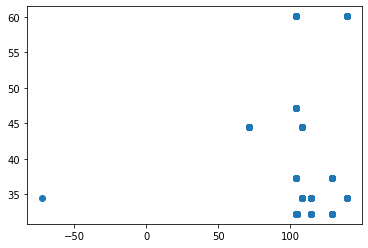

t+1 vs t-590


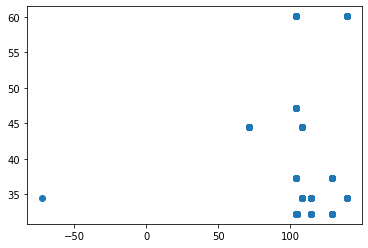

t+1 vs t-591


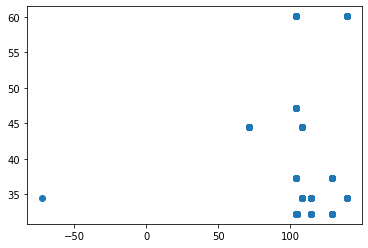

t+1 vs t-592


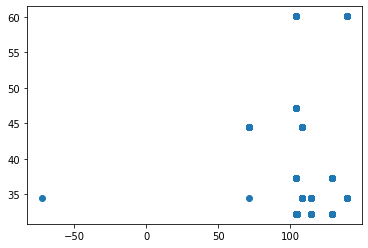

t+1 vs t-593


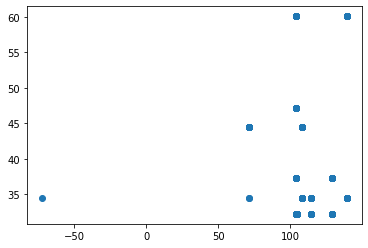

t+1 vs t-594


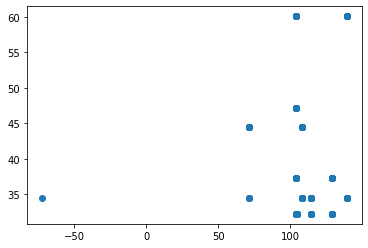

t+1 vs t-595


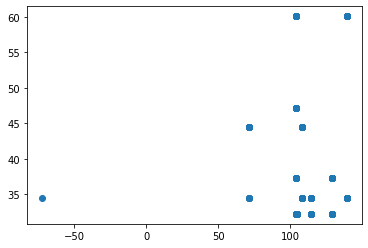

t+1 vs t-596


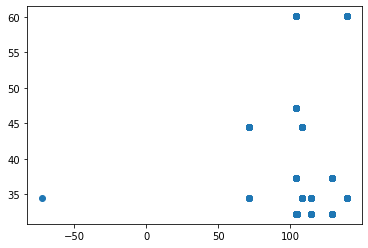

t+1 vs t-597


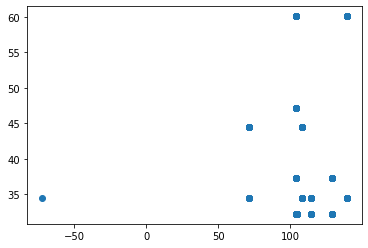

t+1 vs t-598


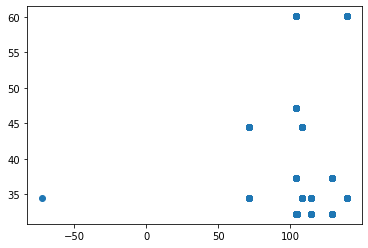

t+1 vs t-599


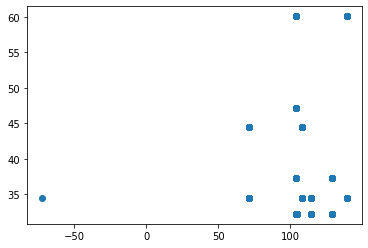

t+1 vs t-600


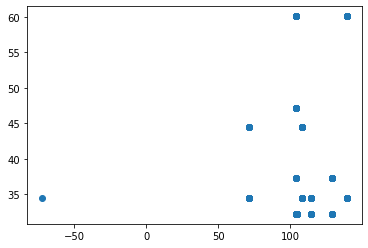

t+1 vs t-601


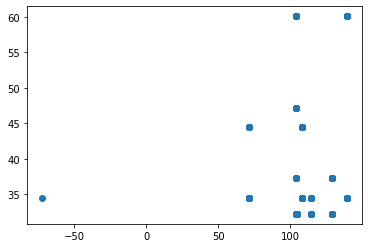

t+1 vs t-602


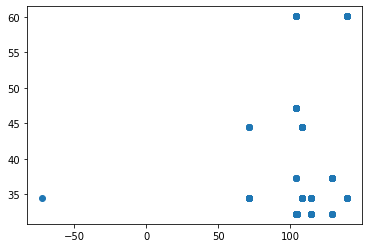

t+1 vs t-603


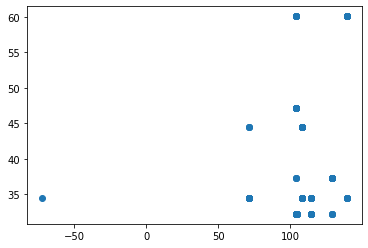

t+1 vs t-604


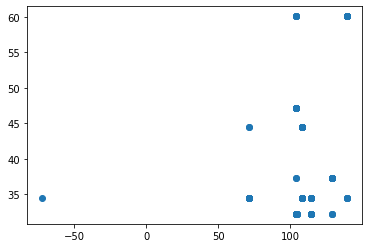

t+1 vs t-605


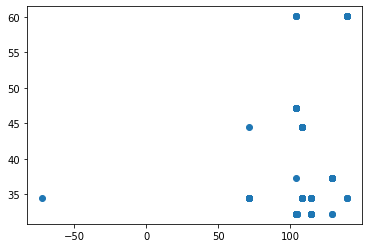

t+1 vs t-606


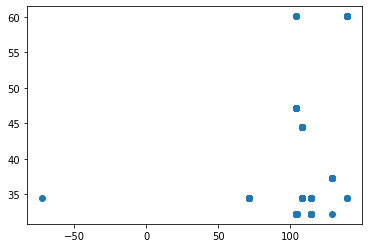

t+1 vs t-607


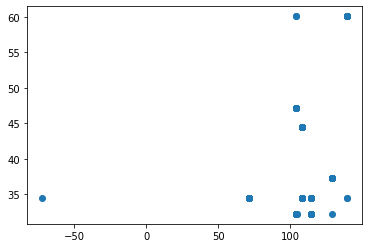

t+1 vs t-608


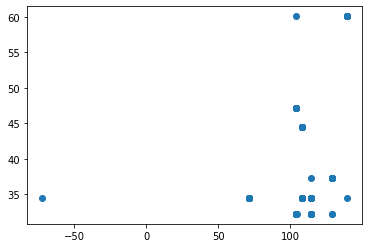

t+1 vs t-609


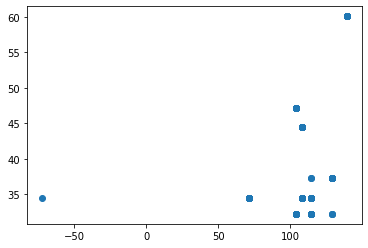

t+1 vs t-610


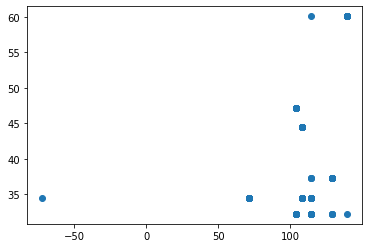

t+1 vs t-611


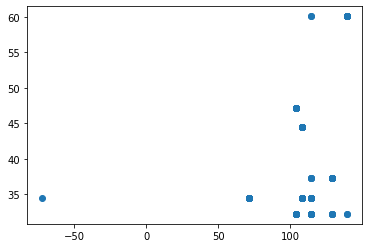

t+1 vs t-612


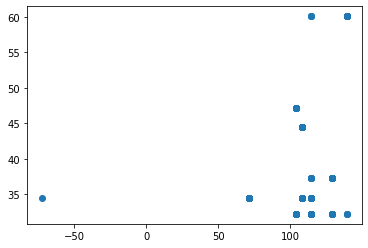

t+1 vs t-613


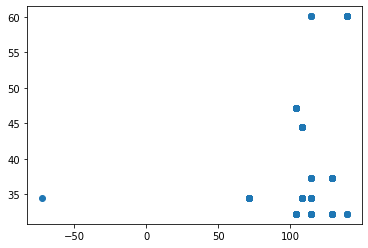

t+1 vs t-614


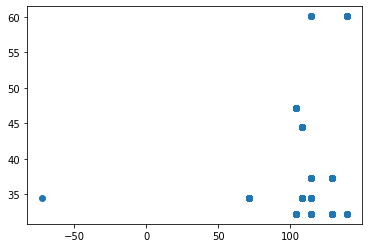

t+1 vs t-615


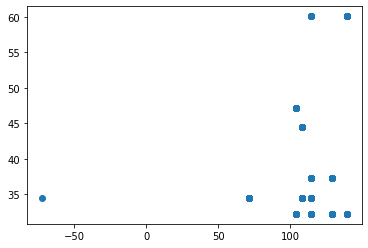

t+1 vs t-616


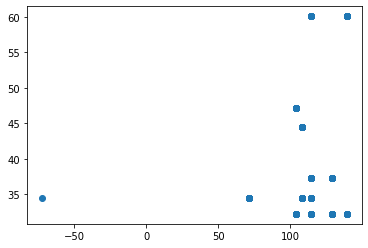

t+1 vs t-617


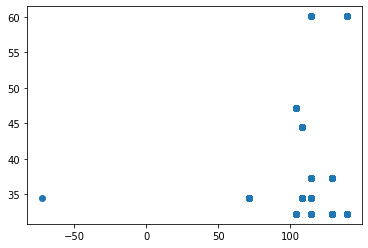

t+1 vs t-618


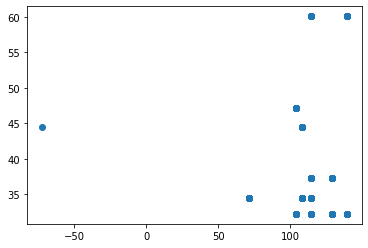

t+1 vs t-619


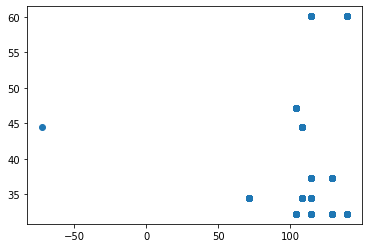

t+1 vs t-620


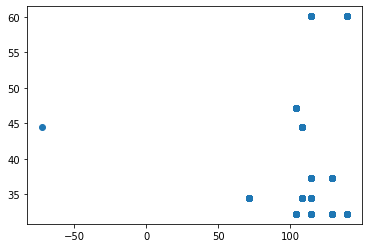

t+1 vs t-621


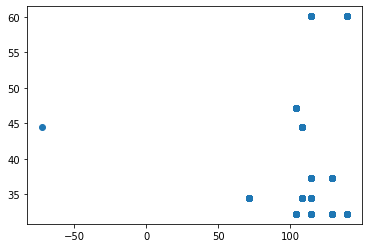

t+1 vs t-622


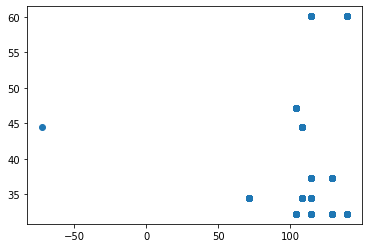

t+1 vs t-623


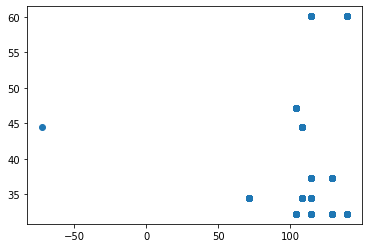

t+1 vs t-624


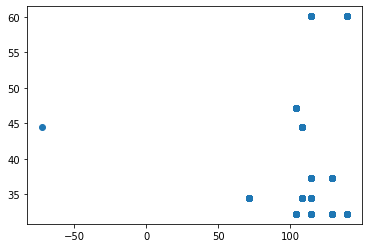

t+1 vs t-625


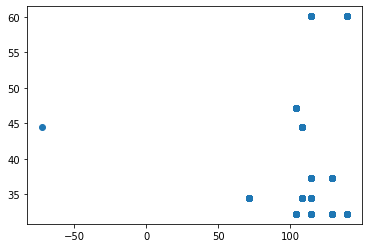

t+1 vs t-626


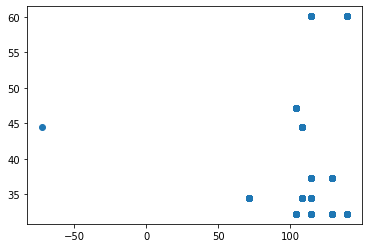

t+1 vs t-627


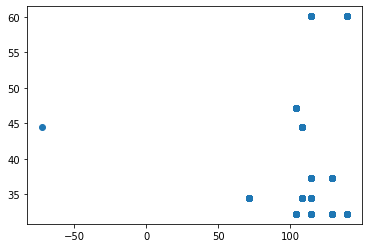

t+1 vs t-628


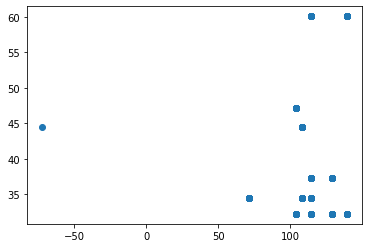

t+1 vs t-629


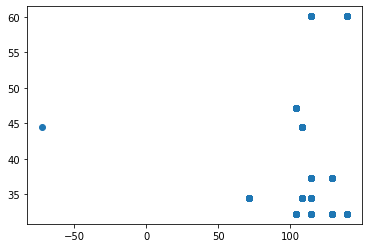

t+1 vs t-630


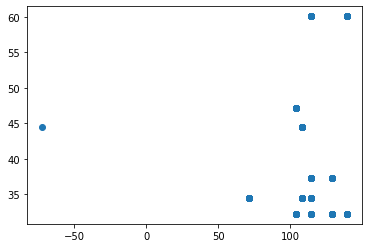

t+1 vs t-631


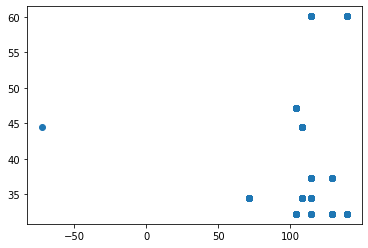

t+1 vs t-632


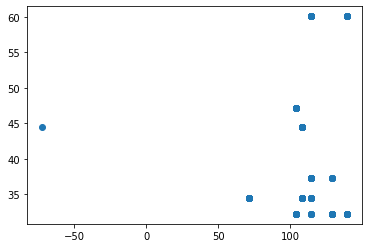

t+1 vs t-633


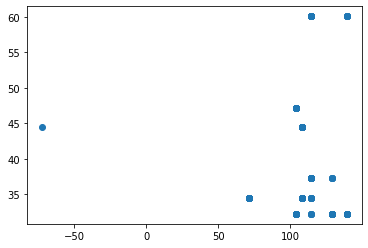

t+1 vs t-634


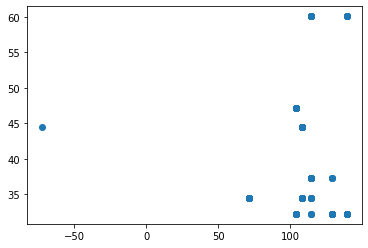

t+1 vs t-635


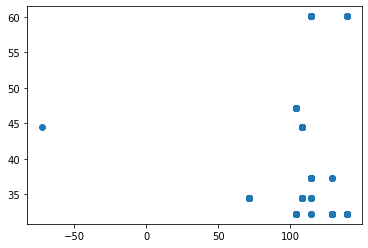

t+1 vs t-636


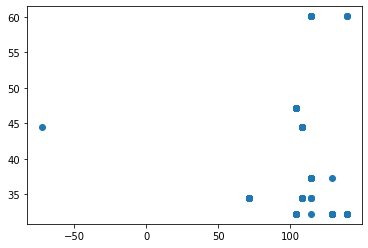

t+1 vs t-637


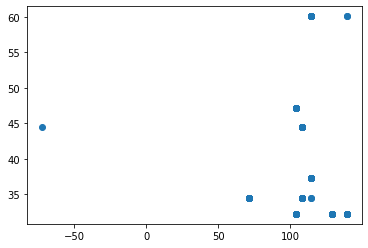

t+1 vs t-638


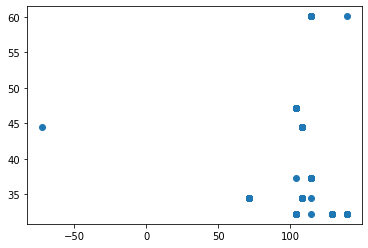

t+1 vs t-639


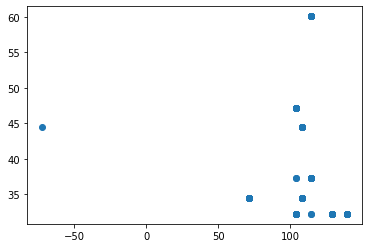

t+1 vs t-640


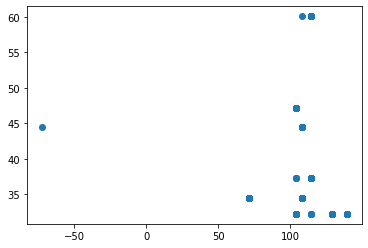

t+1 vs t-641


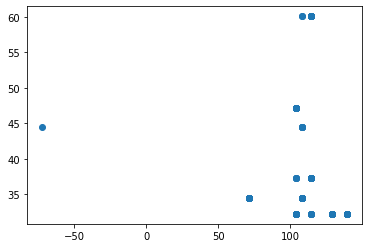

t+1 vs t-642


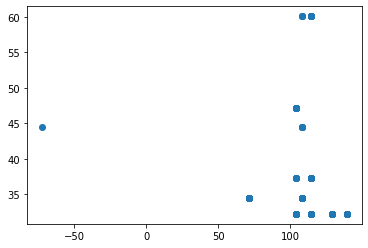

t+1 vs t-643


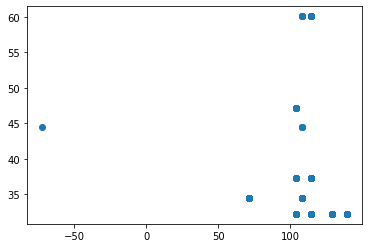

t+1 vs t-644


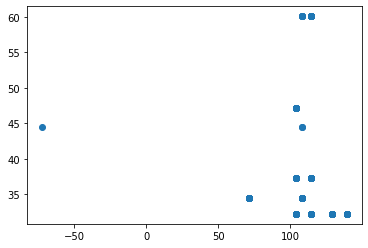

t+1 vs t-645


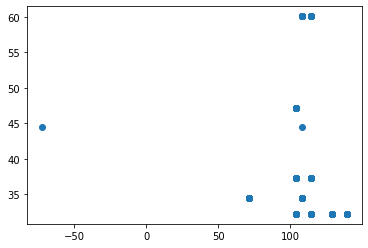

t+1 vs t-646


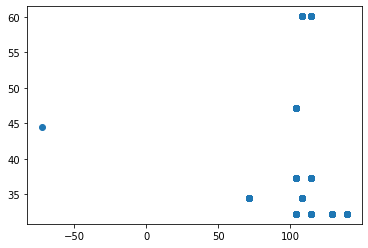

t+1 vs t-647


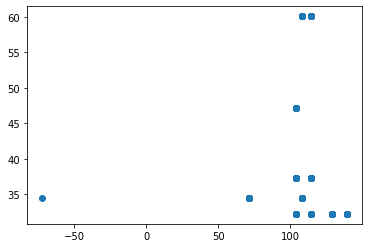

t+1 vs t-648


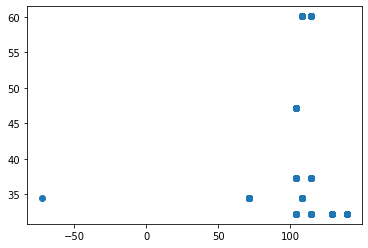

t+1 vs t-649


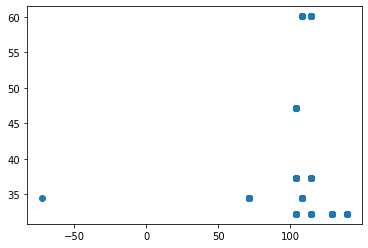

t+1 vs t-650


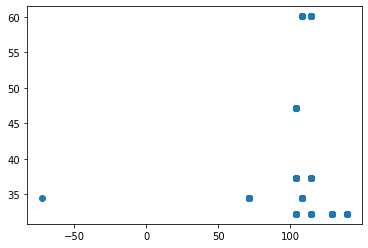

t+1 vs t-651


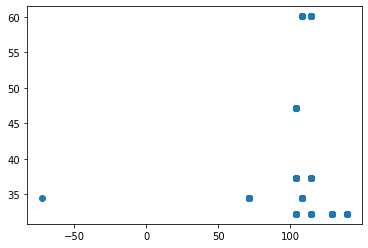

t+1 vs t-652


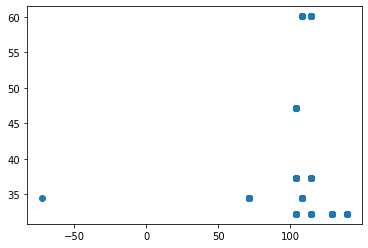

t+1 vs t-653


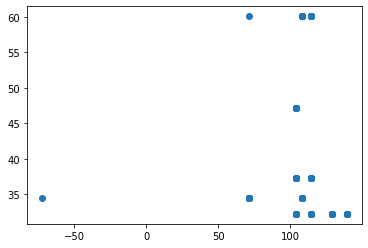

t+1 vs t-654


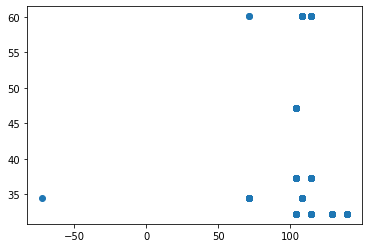

t+1 vs t-655


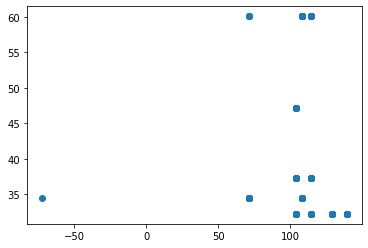

t+1 vs t-656


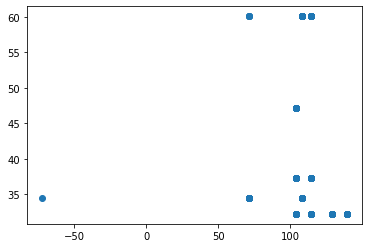

t+1 vs t-657


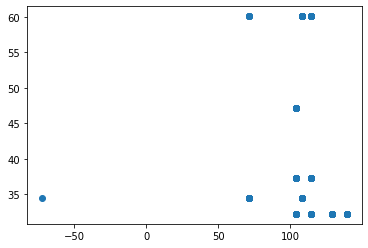

t+1 vs t-658


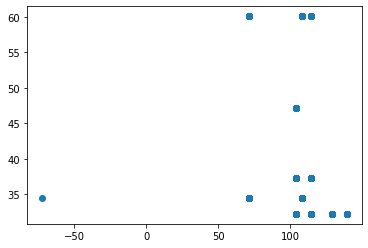

t+1 vs t-659


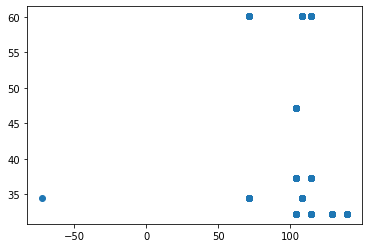

t+1 vs t-660


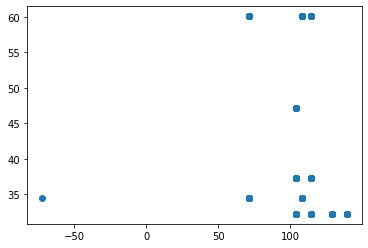

t+1 vs t-661


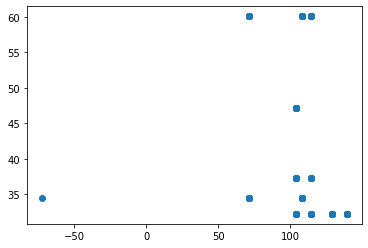

t+1 vs t-662


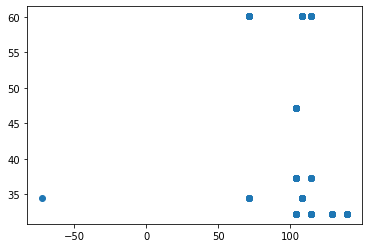

t+1 vs t-663


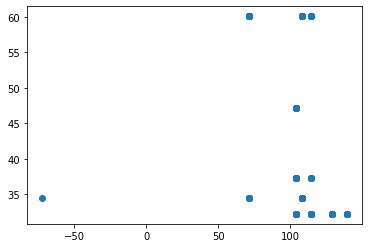

t+1 vs t-664


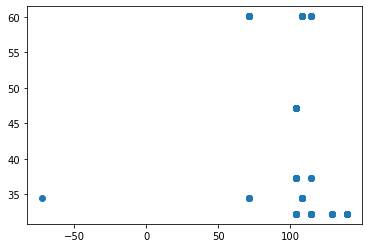

t+1 vs t-665


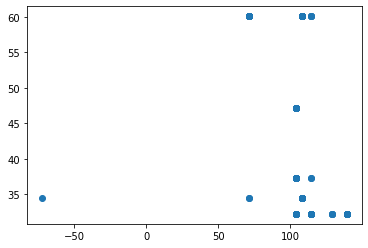

t+1 vs t-666


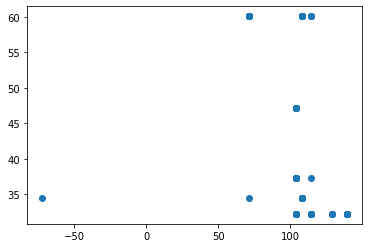

t+1 vs t-667


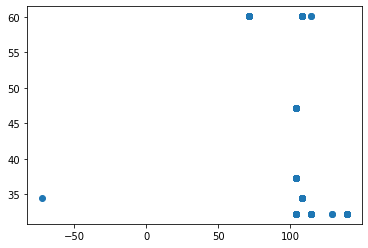

t+1 vs t-668


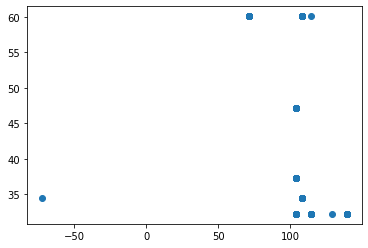

t+1 vs t-669


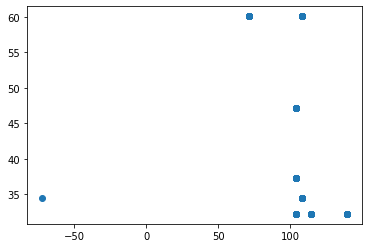

t+1 vs t-670


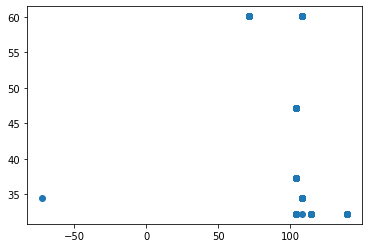

t+1 vs t-671


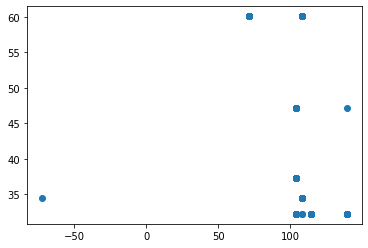

t+1 vs t-672


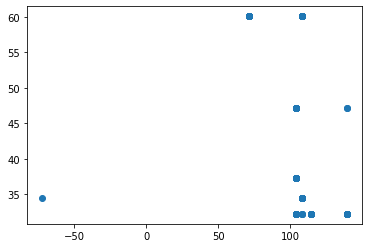

t+1 vs t-673


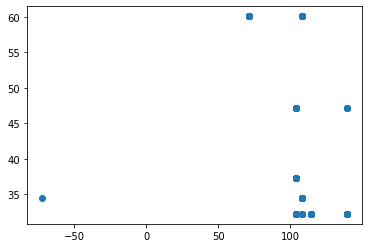

t+1 vs t-674


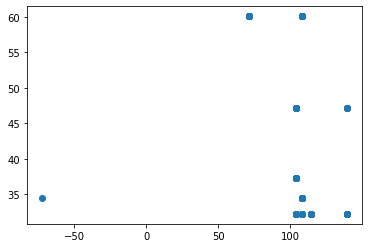

t+1 vs t-675


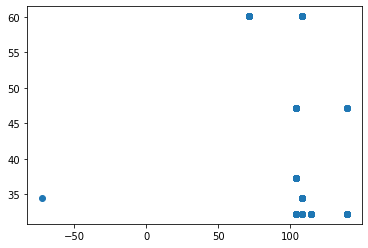

t+1 vs t-676


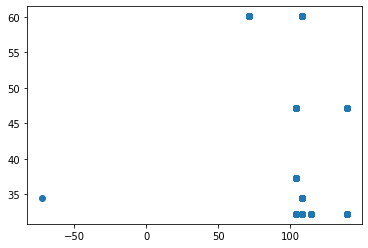

t+1 vs t-677


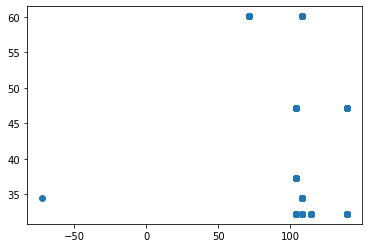

t+1 vs t-678


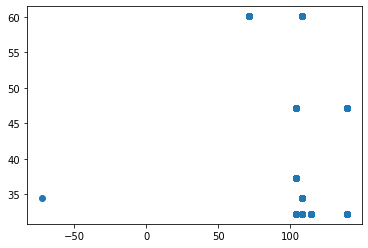

t+1 vs t-679


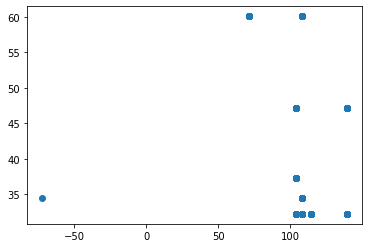

t+1 vs t-680


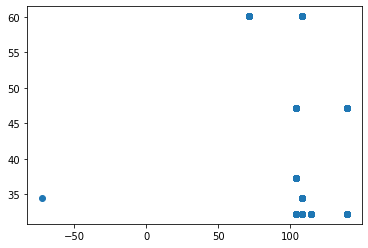

t+1 vs t-681


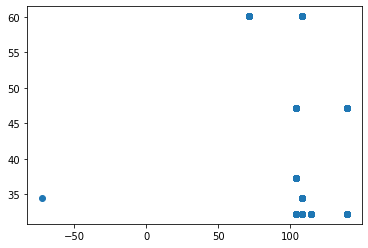

t+1 vs t-682


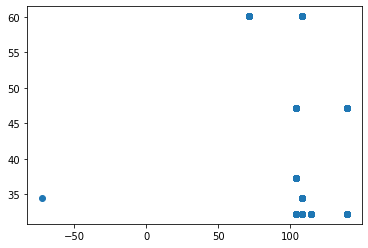

t+1 vs t-683


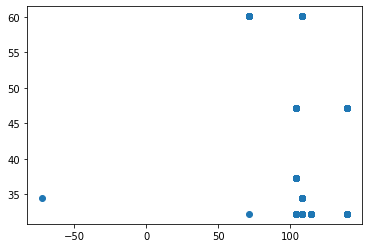

t+1 vs t-684


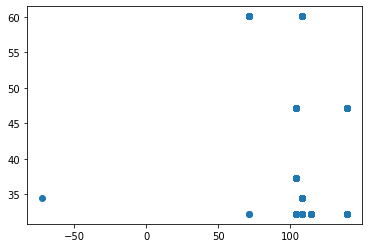

t+1 vs t-685


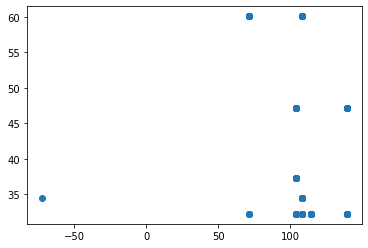

t+1 vs t-686


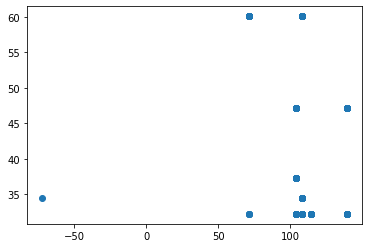

t+1 vs t-687


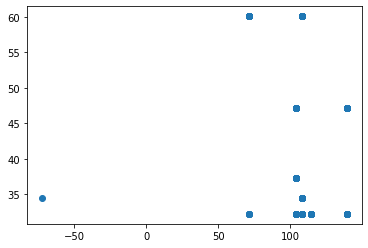

t+1 vs t-688


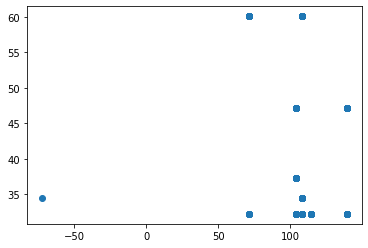

t+1 vs t-689


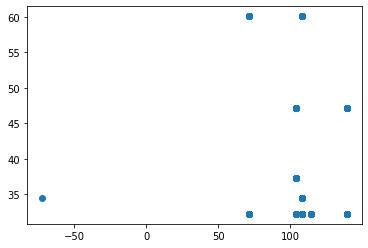

t+1 vs t-690


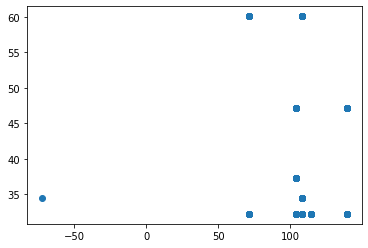

t+1 vs t-691


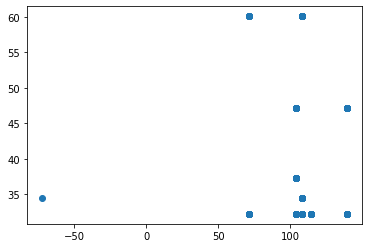

t+1 vs t-692


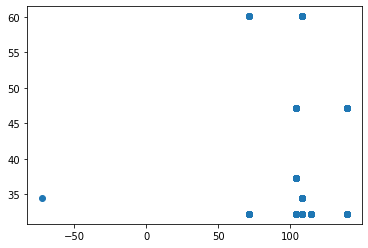

t+1 vs t-693


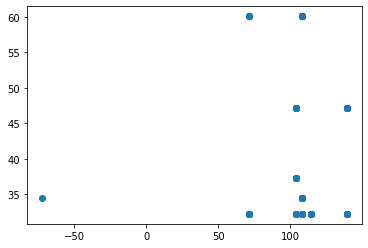

t+1 vs t-694


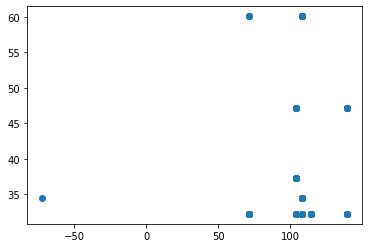

t+1 vs t-695


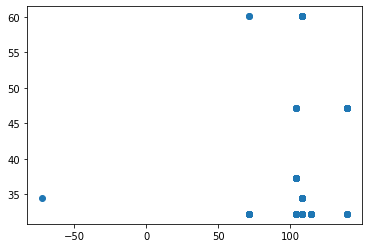

t+1 vs t-696


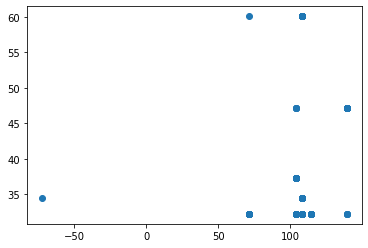

t+1 vs t-697


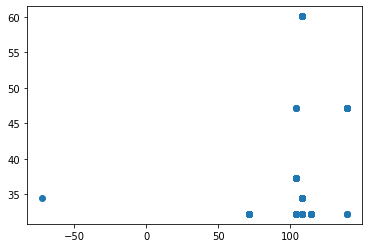

t+1 vs t-698


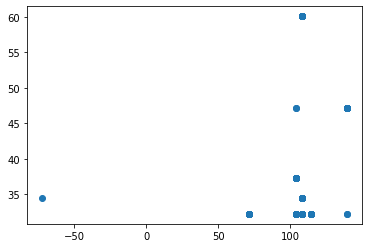

t+1 vs t-699


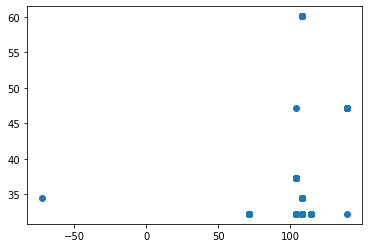

t+1 vs t-700


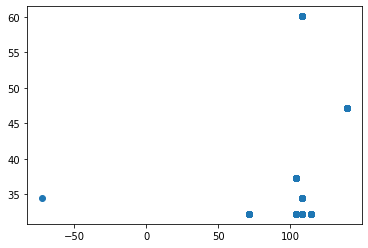

t+1 vs t-701


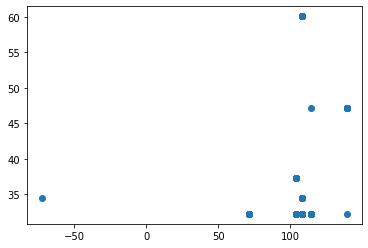

t+1 vs t-702


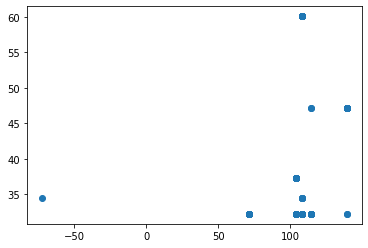

t+1 vs t-703


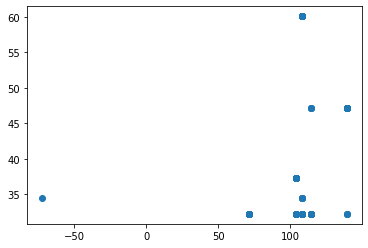

t+1 vs t-704


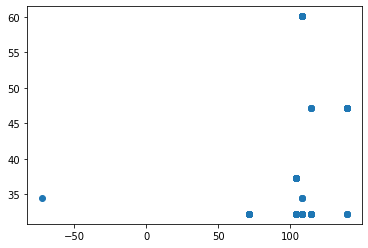

t+1 vs t-705


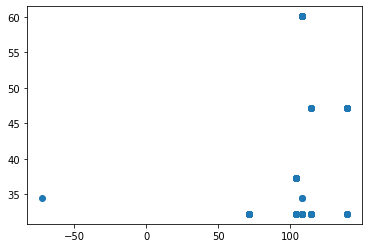

t+1 vs t-706


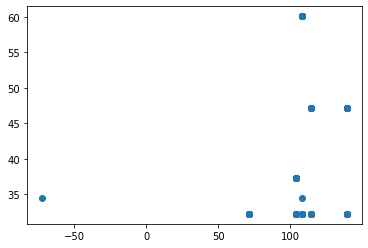

t+1 vs t-707


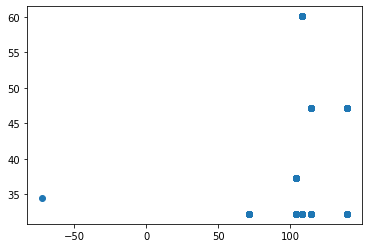

t+1 vs t-708


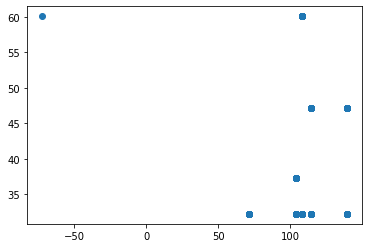

t+1 vs t-709


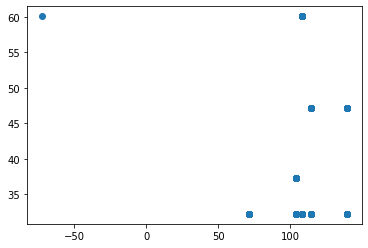

t+1 vs t-710


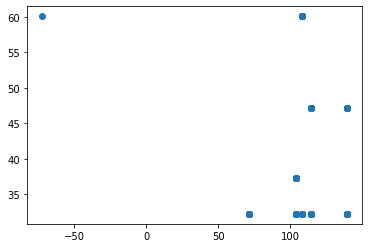

t+1 vs t-711


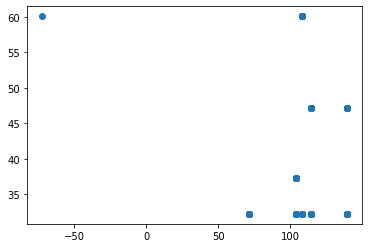

t+1 vs t-712


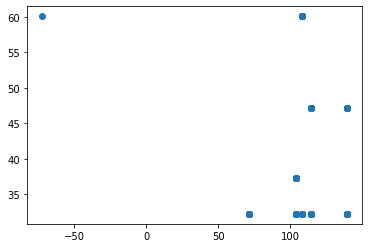

t+1 vs t-713


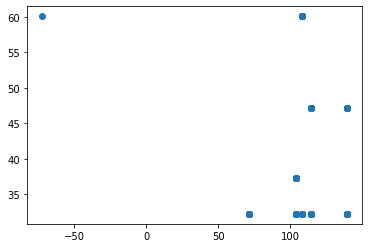

t+1 vs t-714


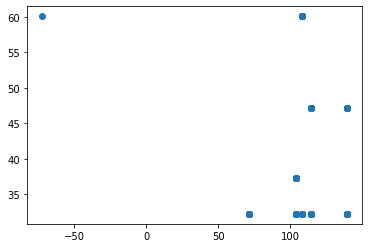

t+1 vs t-715


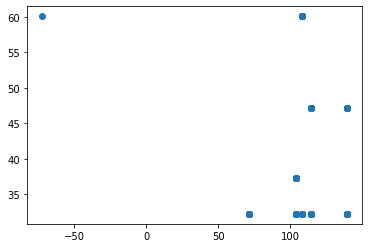

t+1 vs t-716


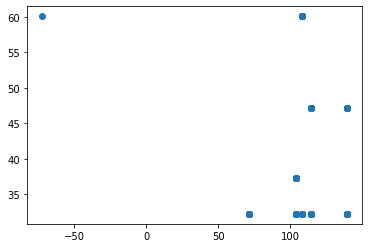

t+1 vs t-717


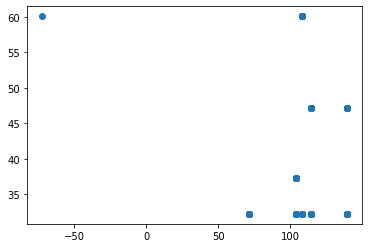

t+1 vs t-718


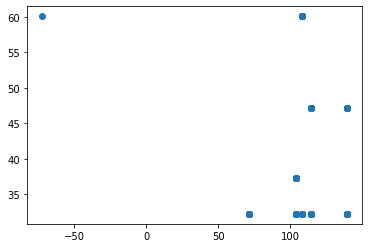

t+1 vs t-719


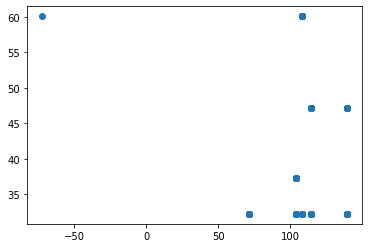

t+1 vs t-720


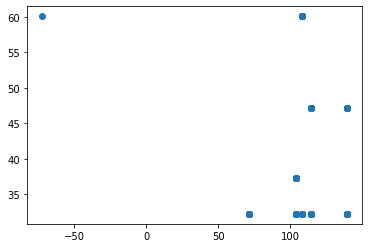

t+1 vs t-721


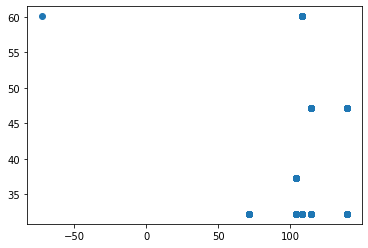

t+1 vs t-722


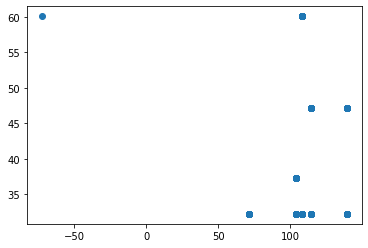

t+1 vs t-723


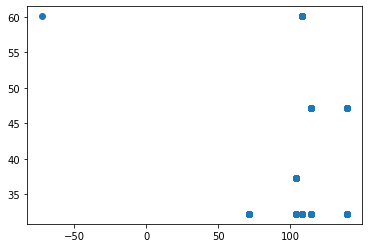

t+1 vs t-724


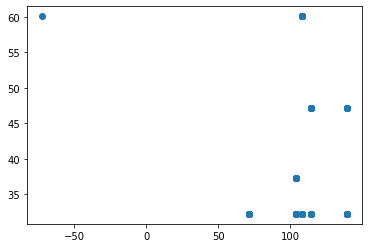

t+1 vs t-725


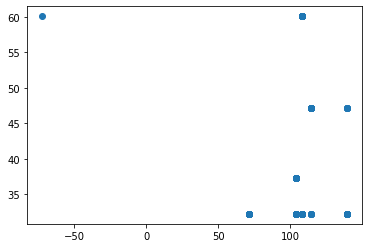

t+1 vs t-726


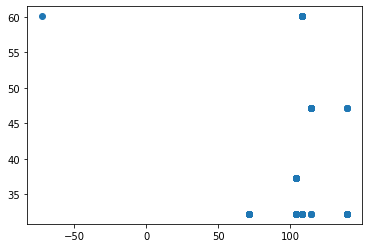

t+1 vs t-727


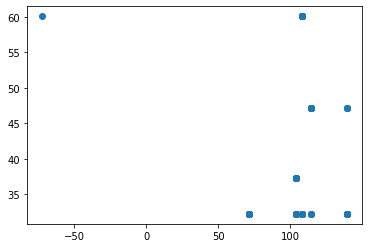

t+1 vs t-728


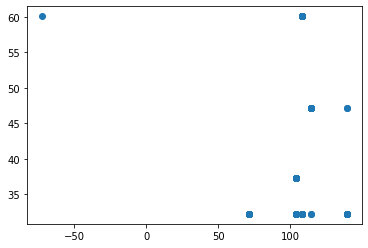

t+1 vs t-729


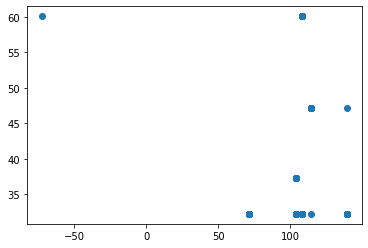

t+1 vs t-730


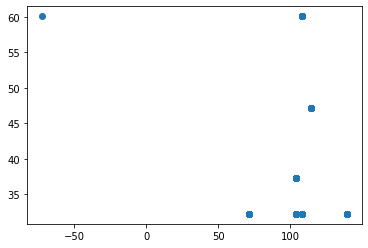

t+1 vs t-731


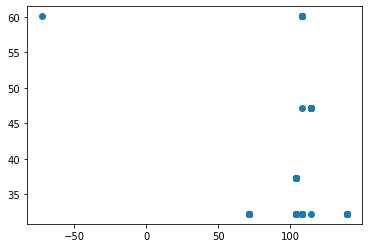

t+1 vs t-732


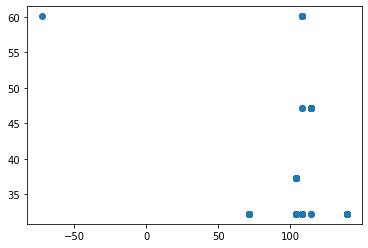

t+1 vs t-733


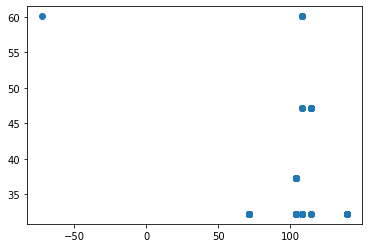

t+1 vs t-734


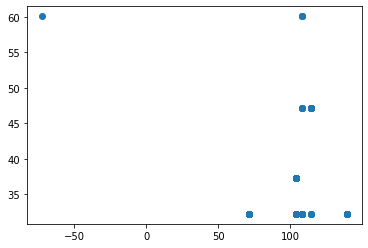

t+1 vs t-735


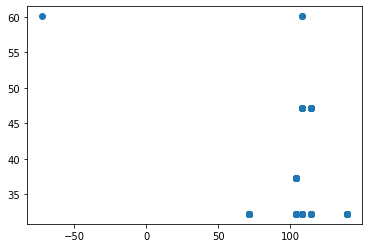

t+1 vs t-736


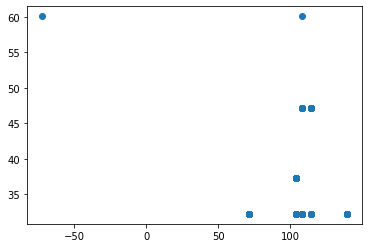

t+1 vs t-737


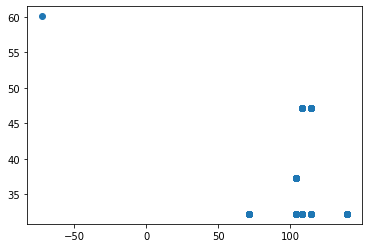

t+1 vs t-738


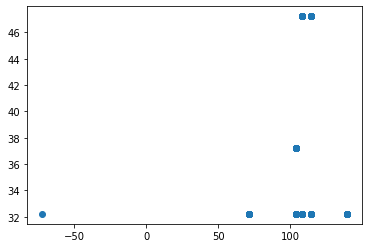

t+1 vs t-739


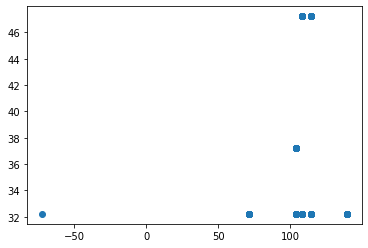

t+1 vs t-740


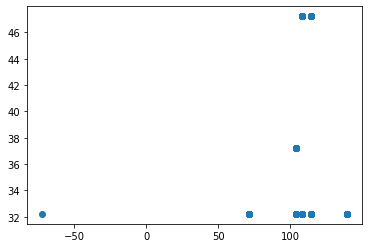

t+1 vs t-741


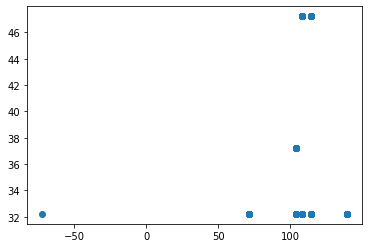

t+1 vs t-742


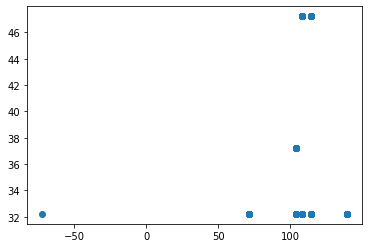

t+1 vs t-743


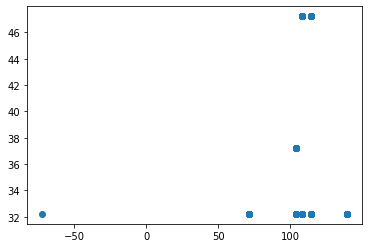

t+1 vs t-744


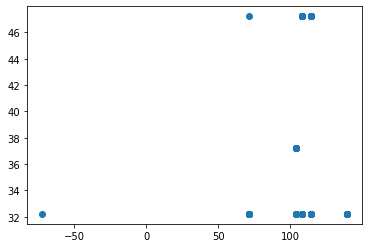

t+1 vs t-745


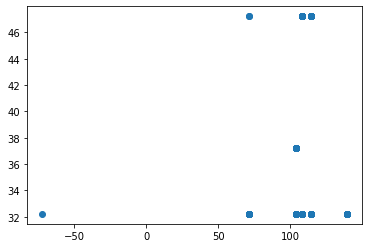

t+1 vs t-746


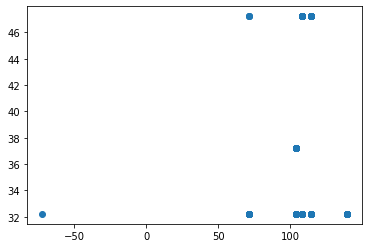

t+1 vs t-747


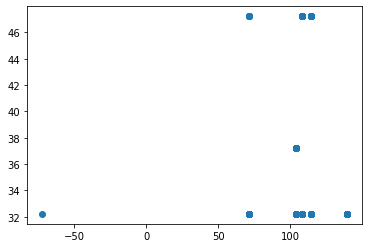

t+1 vs t-748


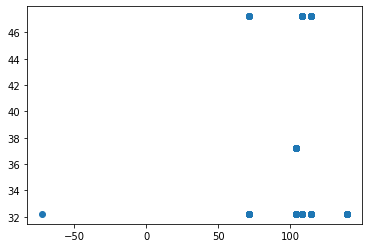

t+1 vs t-749


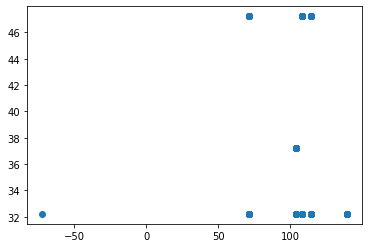

t+1 vs t-750


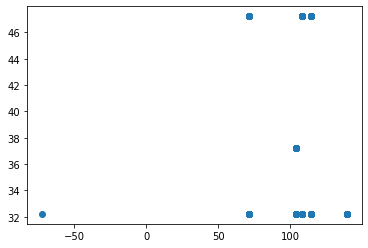

t+1 vs t-751


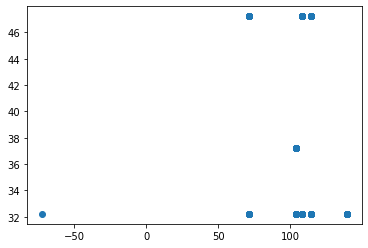

t+1 vs t-752


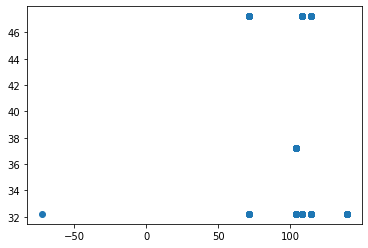

t+1 vs t-753


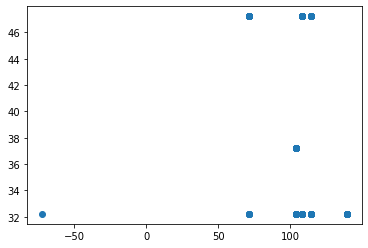

t+1 vs t-754


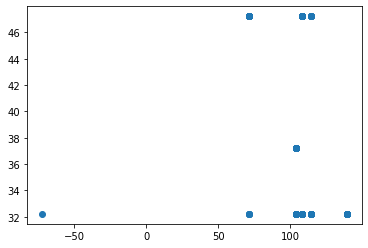

t+1 vs t-755


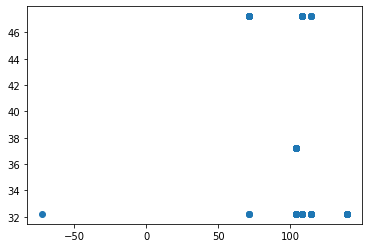

t+1 vs t-756


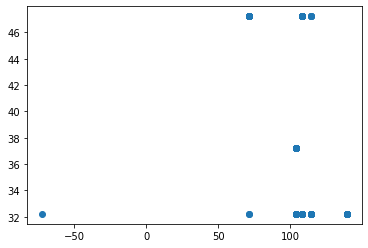

t+1 vs t-757


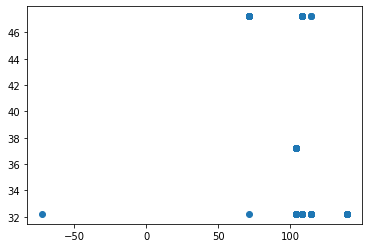

t+1 vs t-758


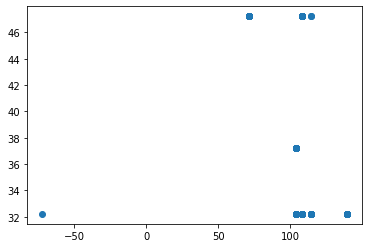

t+1 vs t-759


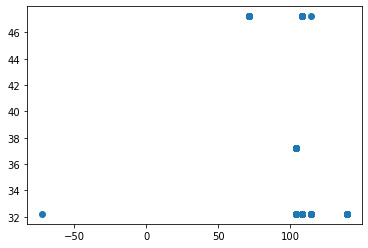

t+1 vs t-760


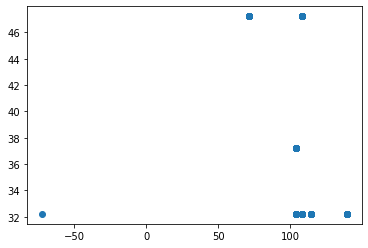

t+1 vs t-761


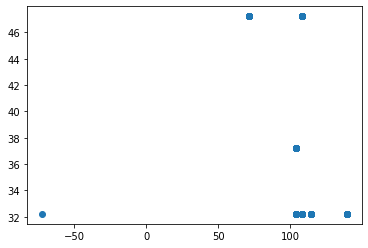

t+1 vs t-762


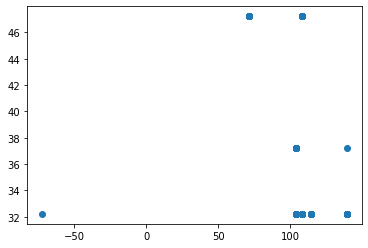

t+1 vs t-763


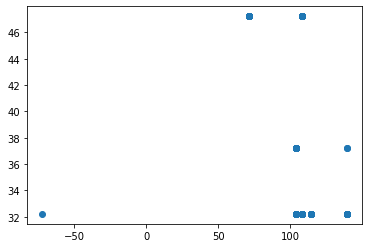

t+1 vs t-764


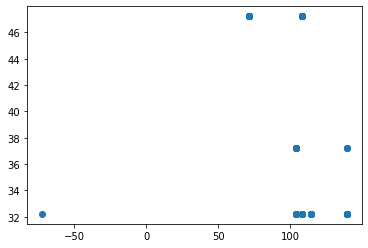

t+1 vs t-765


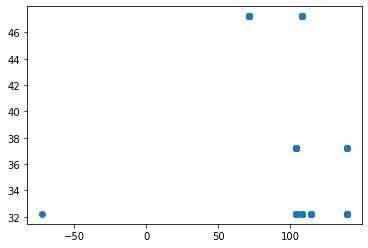

t+1 vs t-766


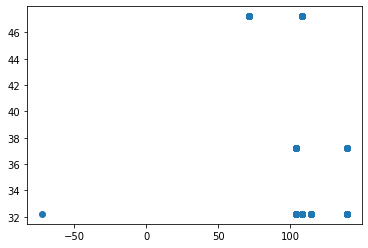

t+1 vs t-767


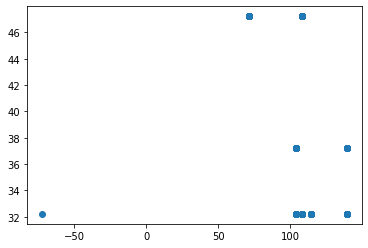

t+1 vs t-768


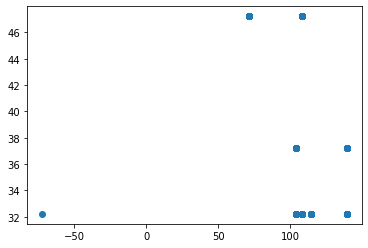

t+1 vs t-769


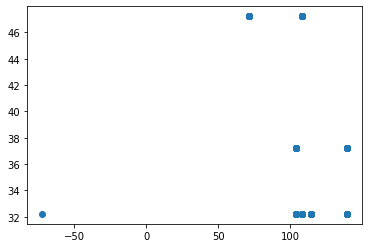

t+1 vs t-770


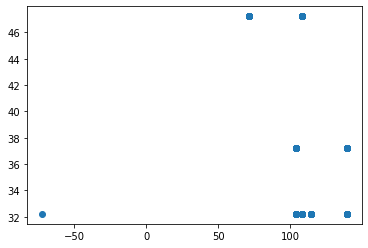

t+1 vs t-771


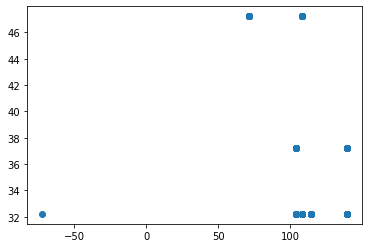

t+1 vs t-772


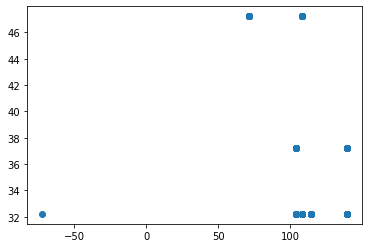

t+1 vs t-773


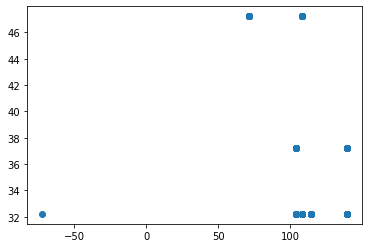

t+1 vs t-774


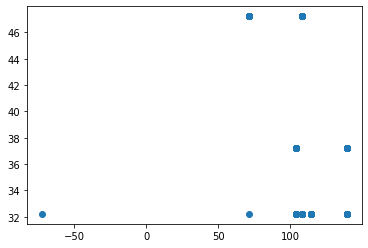

t+1 vs t-775


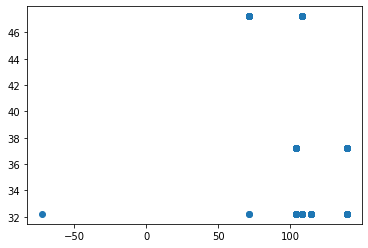

t+1 vs t-776


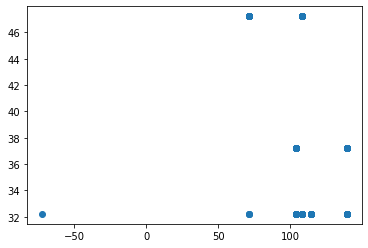

t+1 vs t-777


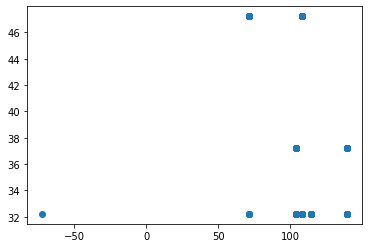

t+1 vs t-778


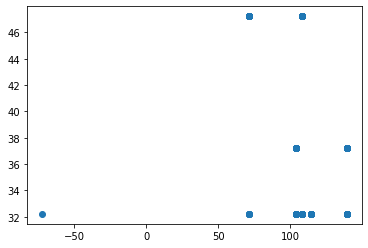

t+1 vs t-779


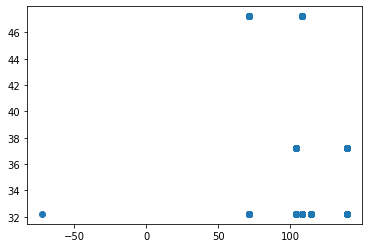

t+1 vs t-780


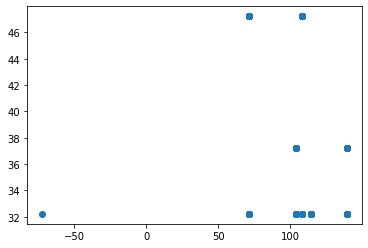

t+1 vs t-781


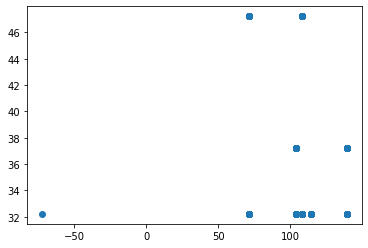

t+1 vs t-782


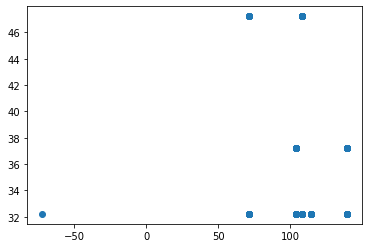

t+1 vs t-783


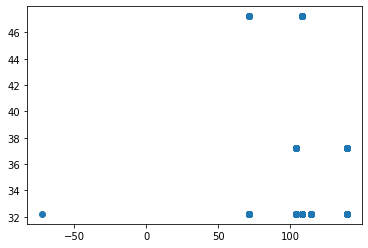

t+1 vs t-784


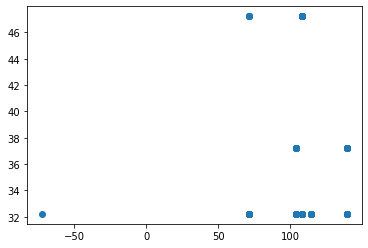

t+1 vs t-785


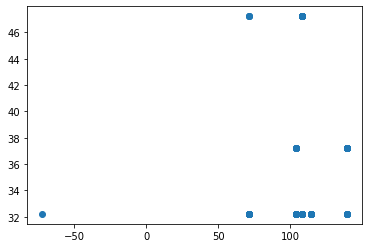

t+1 vs t-786


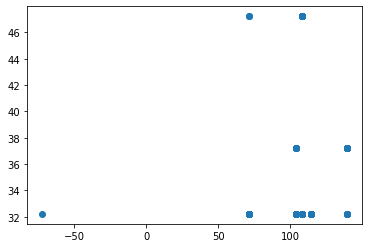

t+1 vs t-787


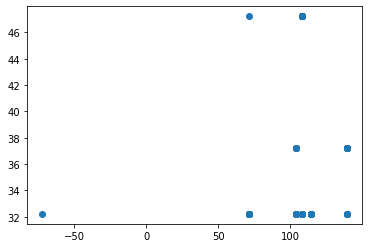

t+1 vs t-788


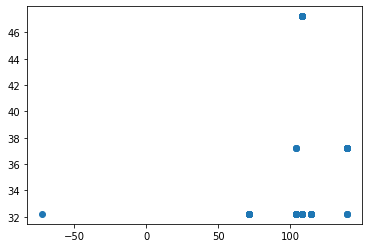

t+1 vs t-789


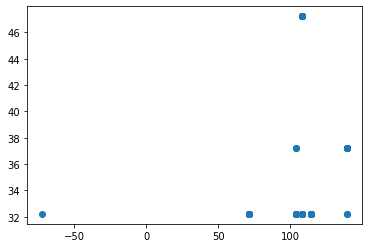

t+1 vs t-790


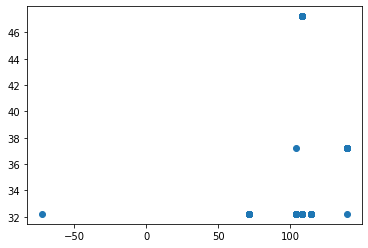

t+1 vs t-791


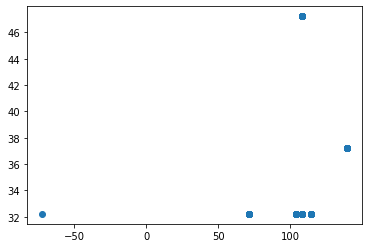

t+1 vs t-792


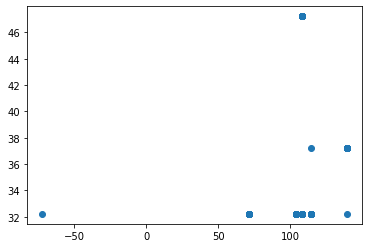

t+1 vs t-793


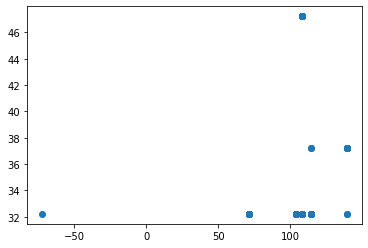

t+1 vs t-794


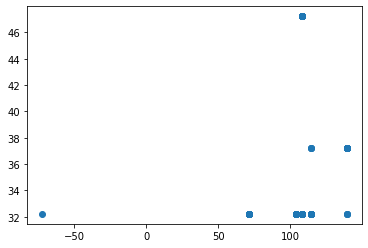

t+1 vs t-795


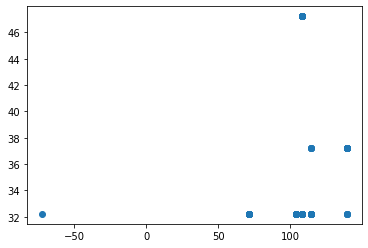

t+1 vs t-796


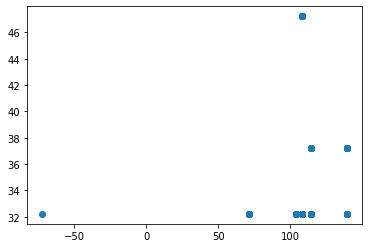

t+1 vs t-797


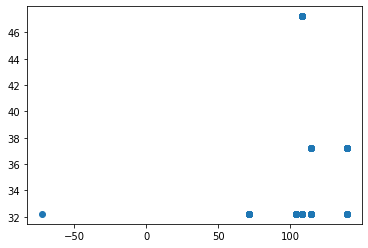

t+1 vs t-798


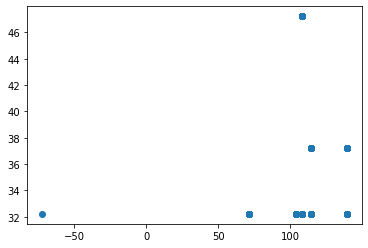

t+1 vs t-799


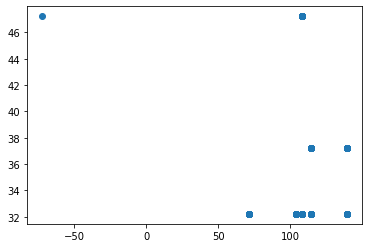

t+1 vs t-800


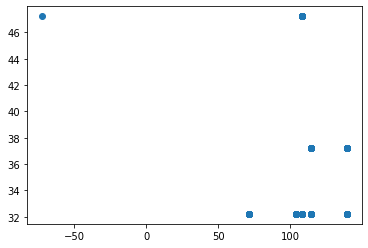

t+1 vs t-801


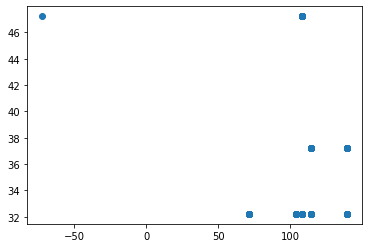

t+1 vs t-802


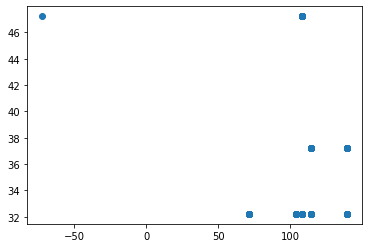

t+1 vs t-803


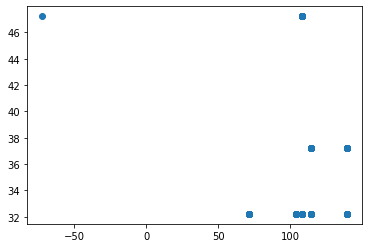

t+1 vs t-804


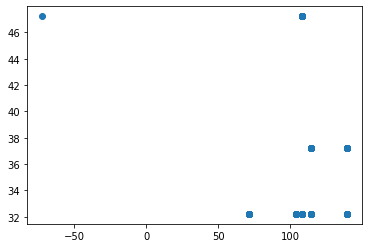

t+1 vs t-805


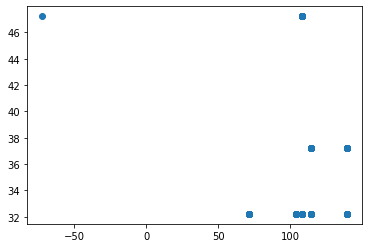

t+1 vs t-806


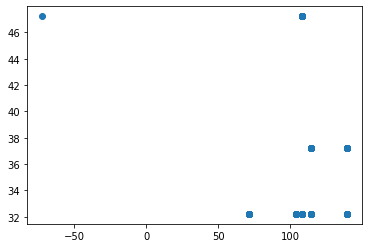

t+1 vs t-807


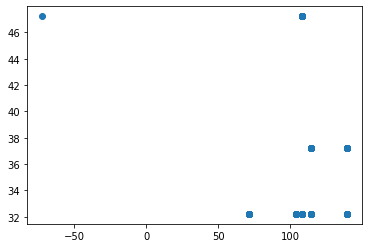

t+1 vs t-808


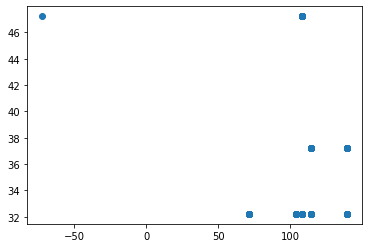

t+1 vs t-809


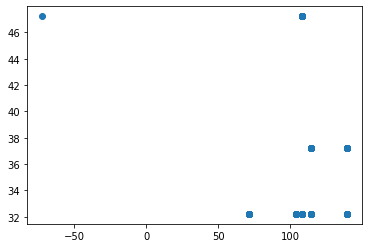

t+1 vs t-810


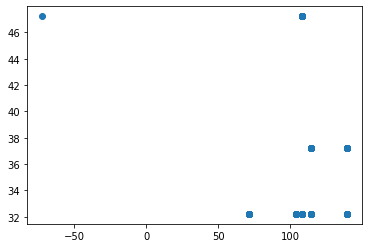

t+1 vs t-811


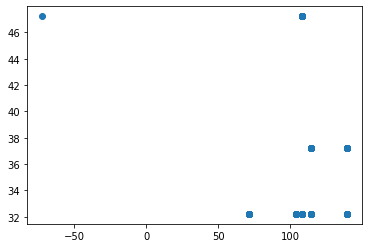

t+1 vs t-812


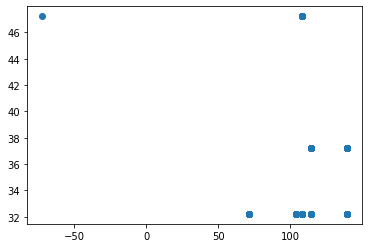

t+1 vs t-813


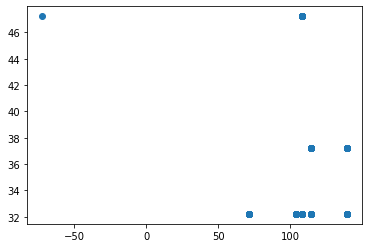

t+1 vs t-814


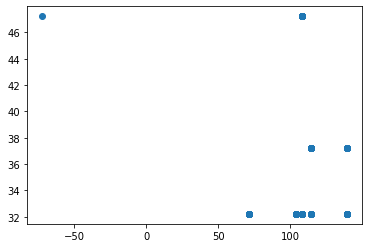

t+1 vs t-815


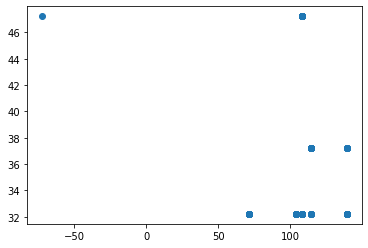

t+1 vs t-816


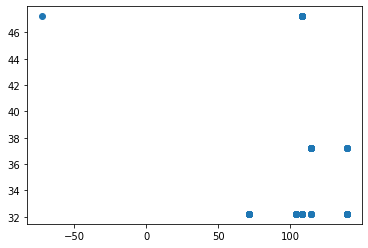

t+1 vs t-817


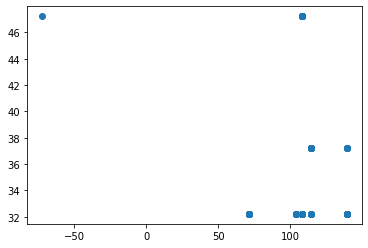

t+1 vs t-818


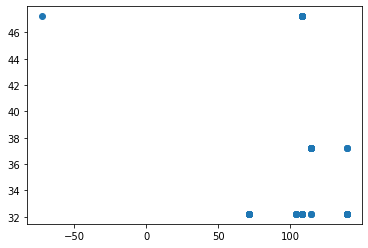

t+1 vs t-819


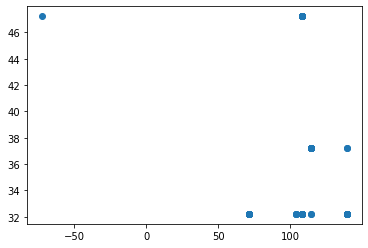

t+1 vs t-820


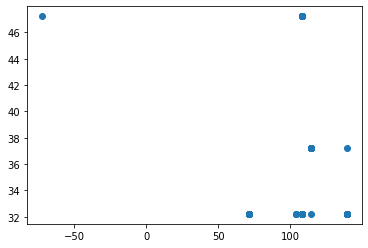

t+1 vs t-821


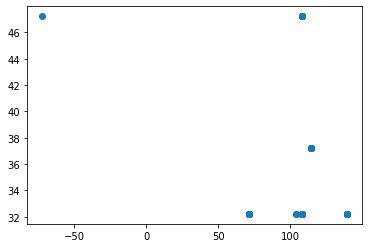

t+1 vs t-822


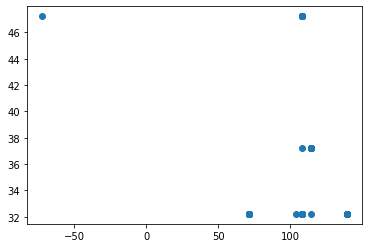

t+1 vs t-823


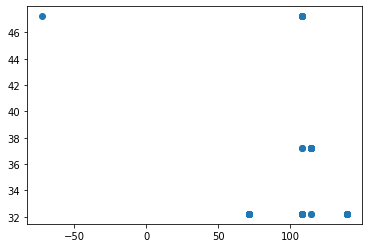

t+1 vs t-824


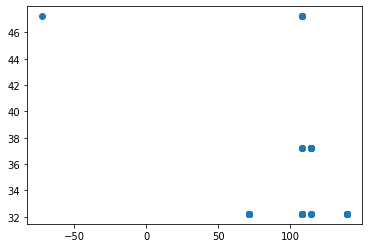

t+1 vs t-825


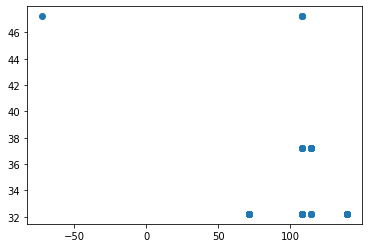

t+1 vs t-826


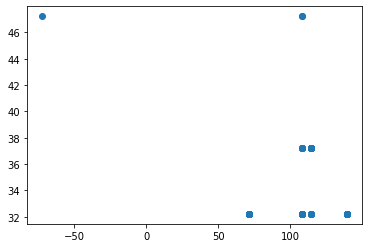

t+1 vs t-827


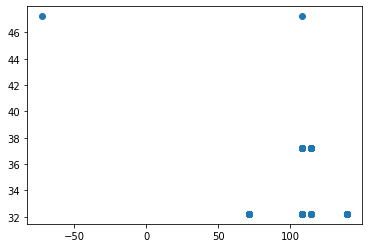

t+1 vs t-828


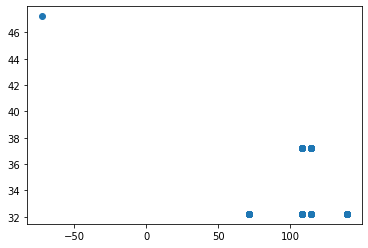

t+1 vs t-829


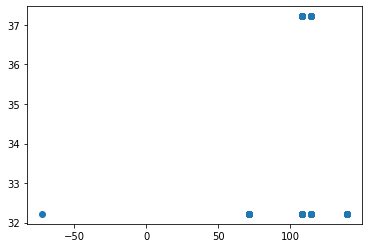

t+1 vs t-830


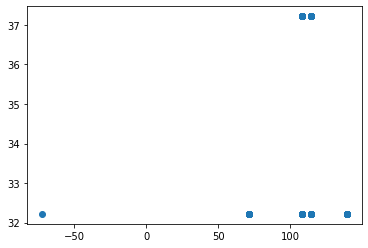

t+1 vs t-831


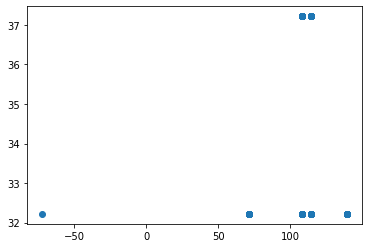

t+1 vs t-832


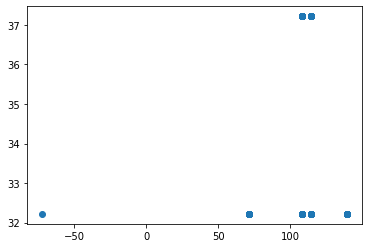

t+1 vs t-833


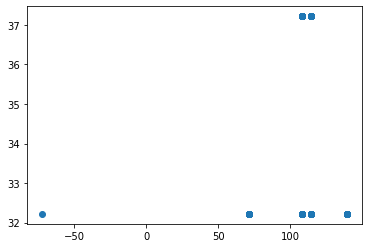

t+1 vs t-834


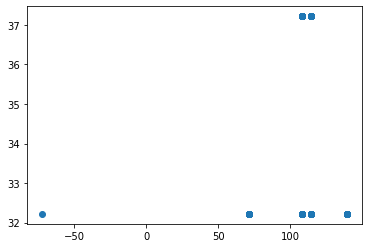

t+1 vs t-835


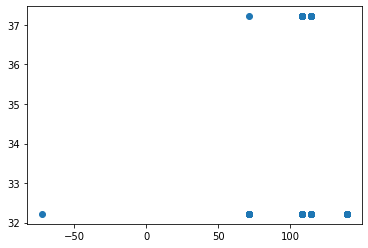

t+1 vs t-836


t+1 vs t-837


t+1 vs t-838


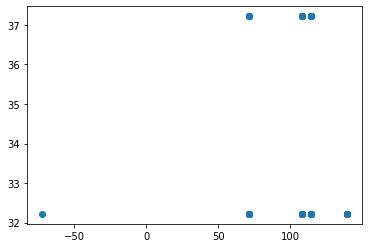

t+1 vs t-839


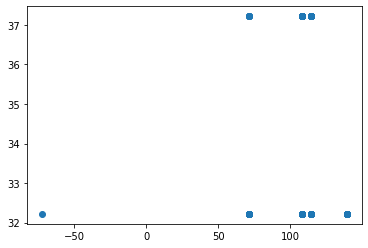

t+1 vs t-840


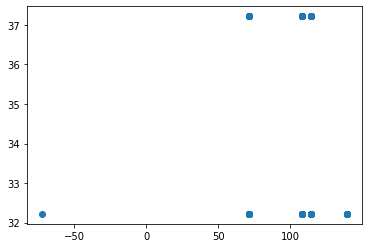

t+1 vs t-841


t+1 vs t-842


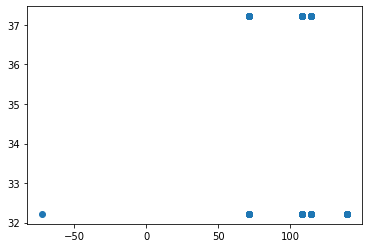

t+1 vs t-843


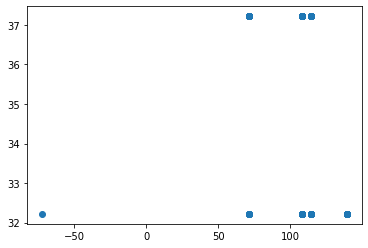

t+1 vs t-844


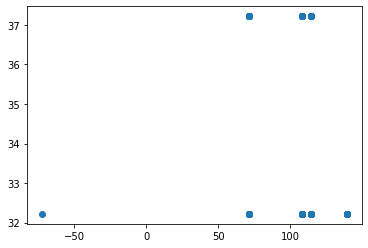

t+1 vs t-845


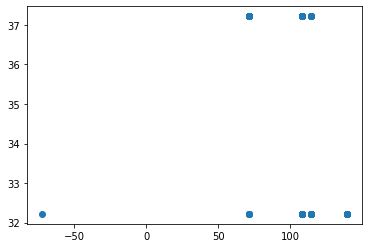

t+1 vs t-846


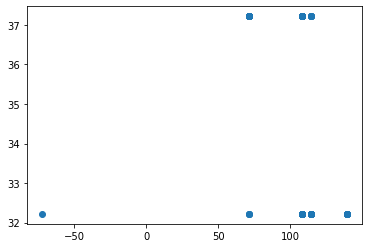

t+1 vs t-847


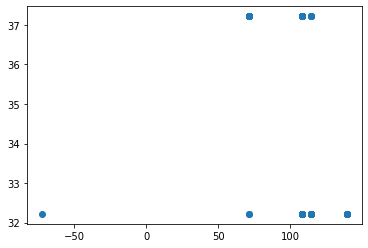

t+1 vs t-848


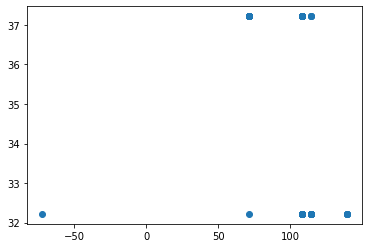

t+1 vs t-849


t+1 vs t-850


t+1 vs t-851


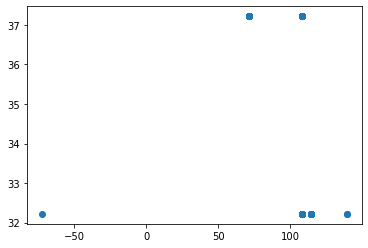

t+1 vs t-852


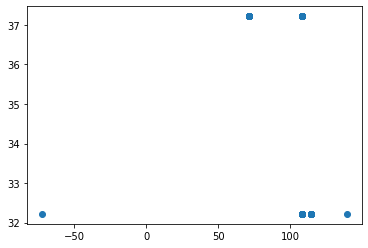

t+1 vs t-853


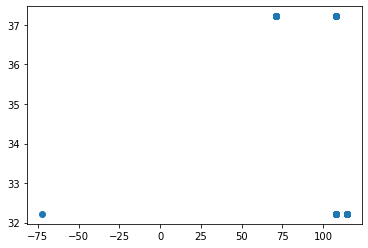

t+1 vs t-854


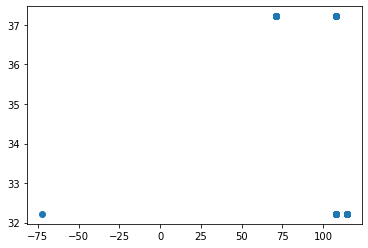

t+1 vs t-855


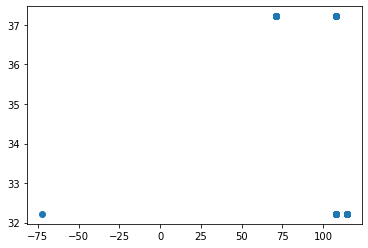

t+1 vs t-856


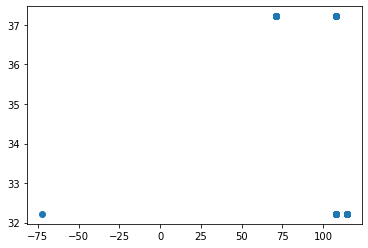

t+1 vs t-857


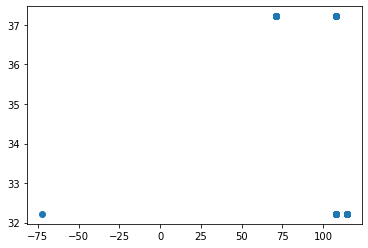

t+1 vs t-858


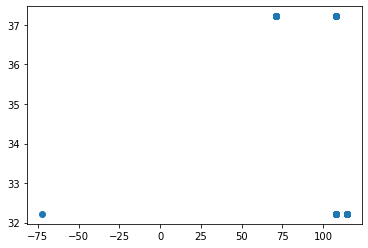

t+1 vs t-859


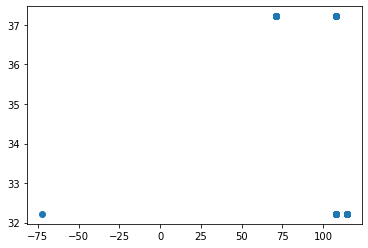

t+1 vs t-860


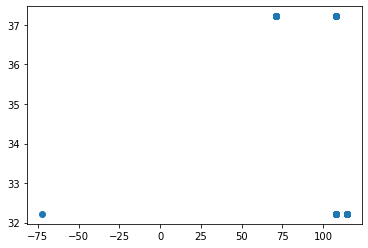

t+1 vs t-861


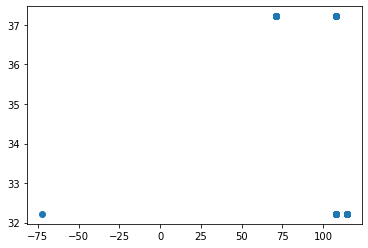

t+1 vs t-862


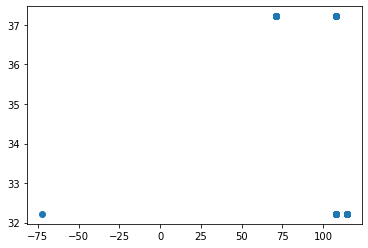

t+1 vs t-863


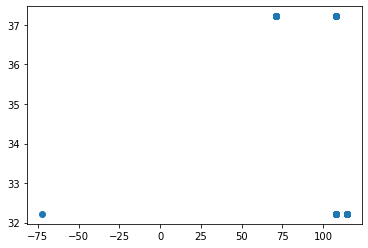

t+1 vs t-864


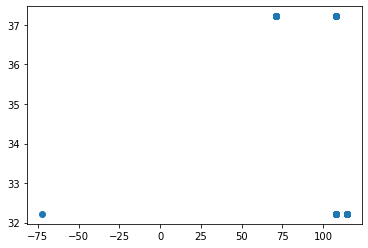

t+1 vs t-865


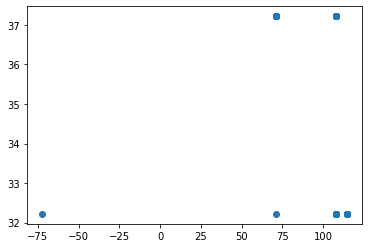

t+1 vs t-866


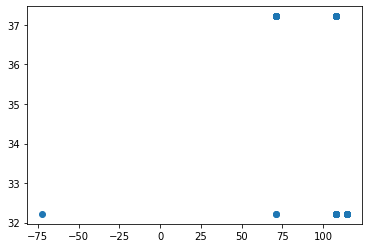

t+1 vs t-867


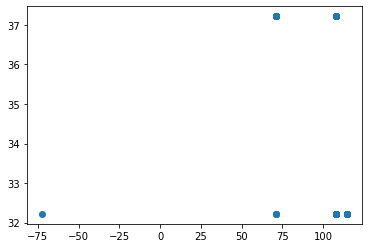

t+1 vs t-868


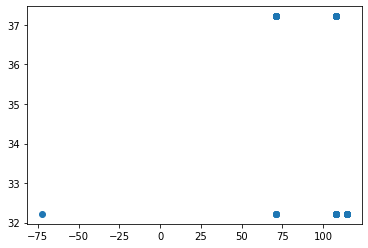

t+1 vs t-869


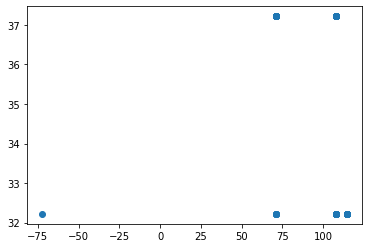

t+1 vs t-870


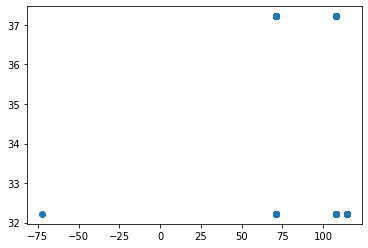

t+1 vs t-871


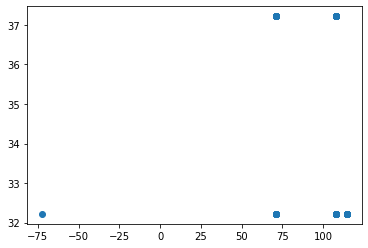

t+1 vs t-872


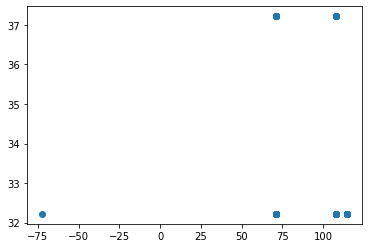

t+1 vs t-873


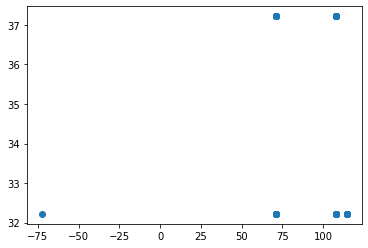

t+1 vs t-874


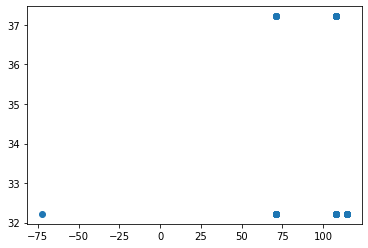

t+1 vs t-875


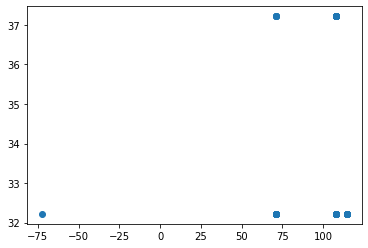

t+1 vs t-876


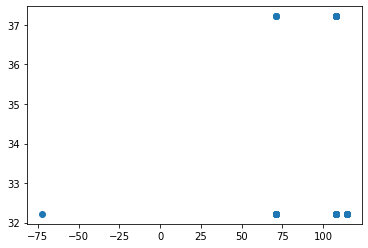

t+1 vs t-877


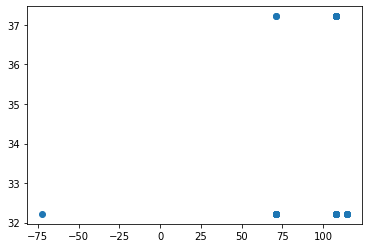

t+1 vs t-878


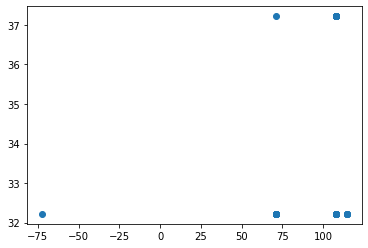

t+1 vs t-879


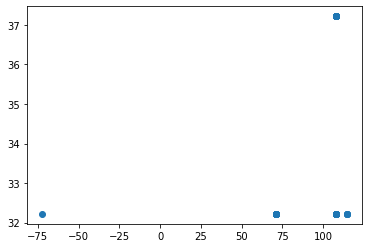

t+1 vs t-880


t+1 vs t-881


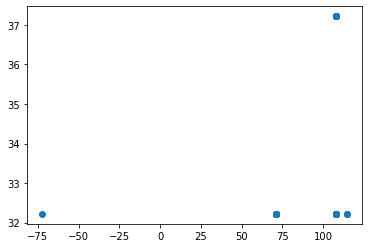

t+1 vs t-882


t+1 vs t-883


t+1 vs t-884


t+1 vs t-885


t+1 vs t-886


t+1 vs t-887


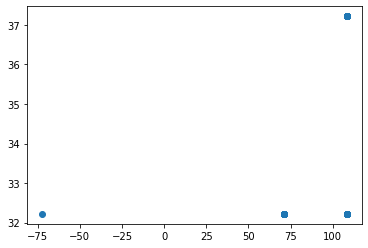

t+1 vs t-888


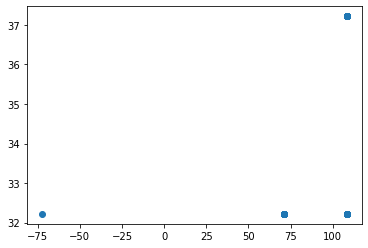

t+1 vs t-889


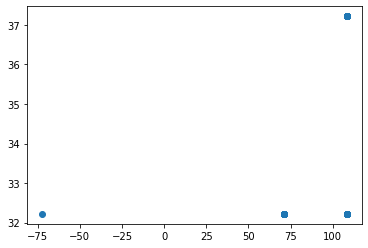

t+1 vs t-890


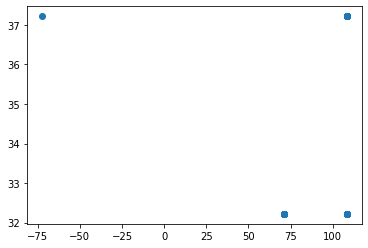

t+1 vs t-891


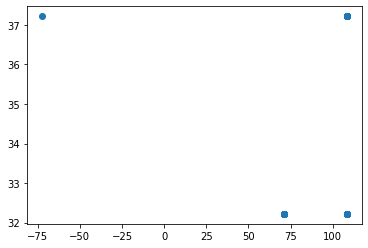

t+1 vs t-892


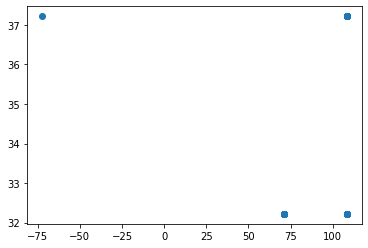

t+1 vs t-893


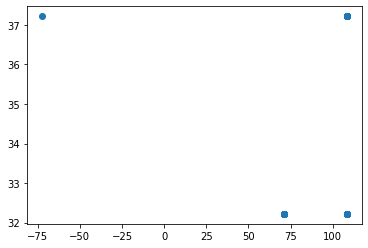

t+1 vs t-894


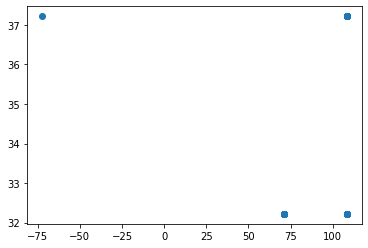

t+1 vs t-895


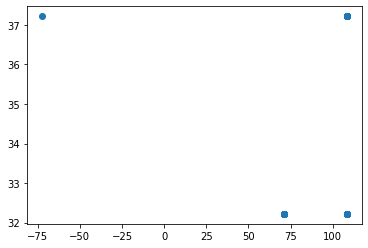

t+1 vs t-896


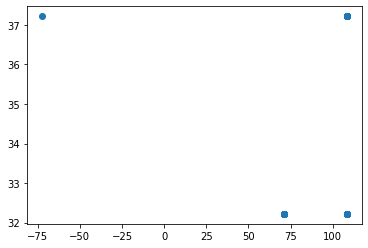

t+1 vs t-897


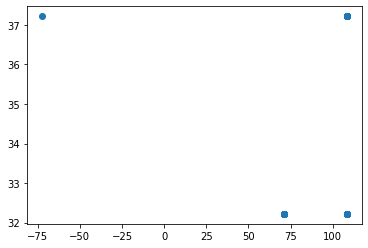

t+1 vs t-898


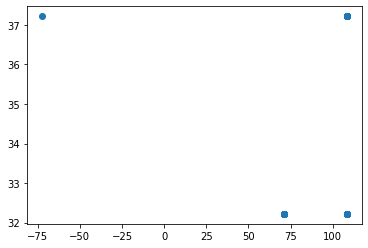

t+1 vs t-899


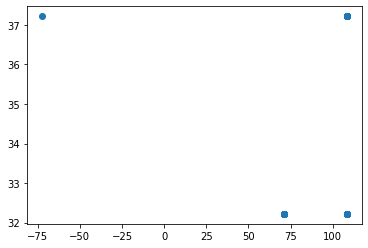

t+1 vs t-900


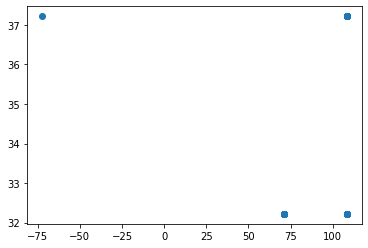

t+1 vs t-901


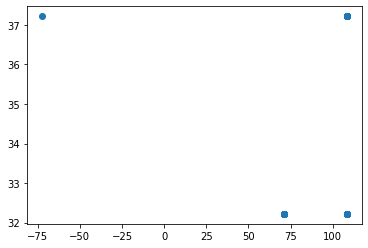

t+1 vs t-902


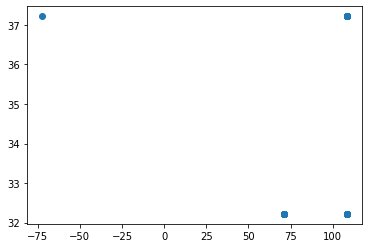

t+1 vs t-903


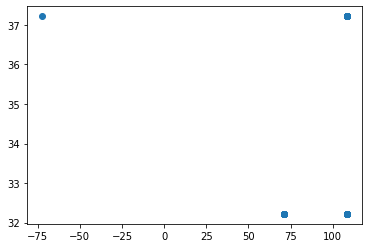

t+1 vs t-904


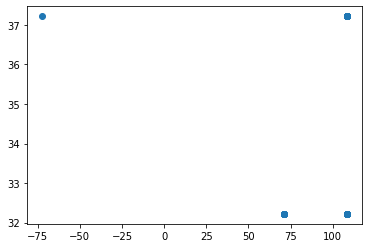

t+1 vs t-905


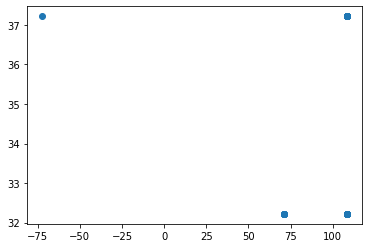

t+1 vs t-906


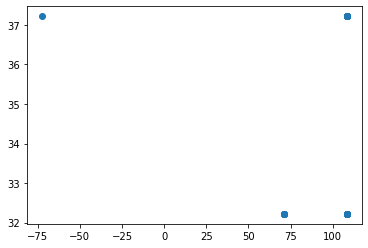

t+1 vs t-907


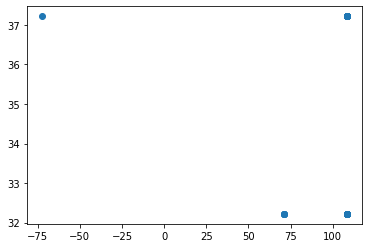

t+1 vs t-908


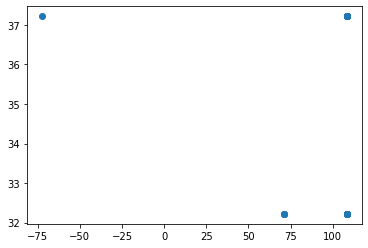

t+1 vs t-909


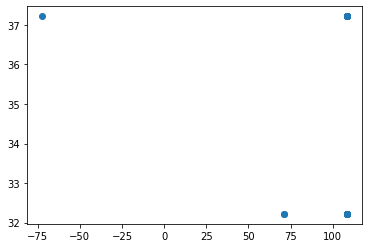

t+1 vs t-910


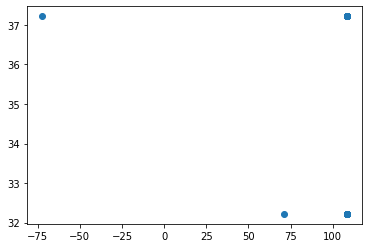

t+1 vs t-911


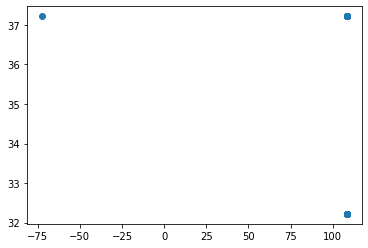

t+1 vs t-912


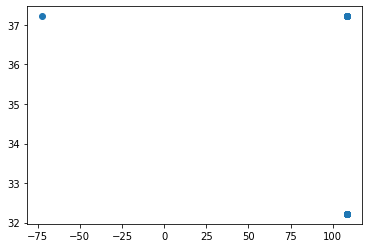

t+1 vs t-913


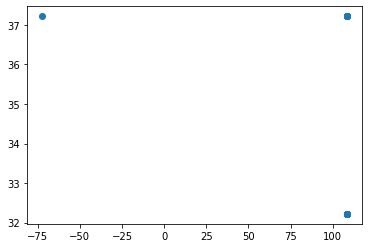

t+1 vs t-914


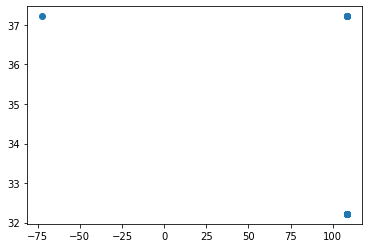

t+1 vs t-915


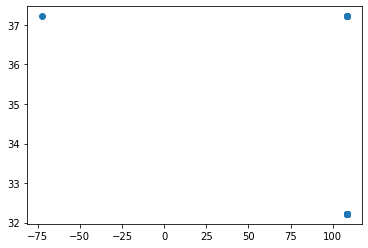

t+1 vs t-916


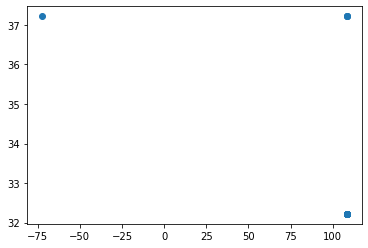

t+1 vs t-917


t+1 vs t-918


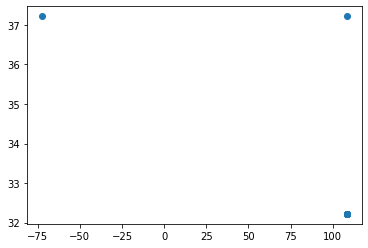

t+1 vs t-919


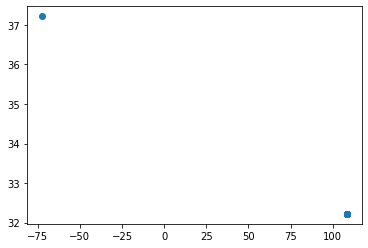

t+1 vs t-920


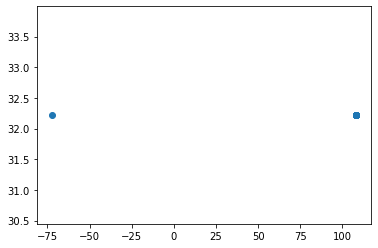

t+1 vs t-921


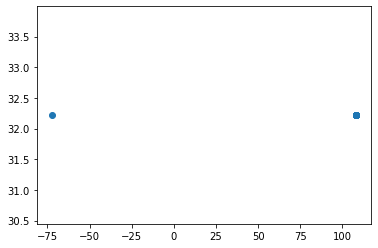

t+1 vs t-922


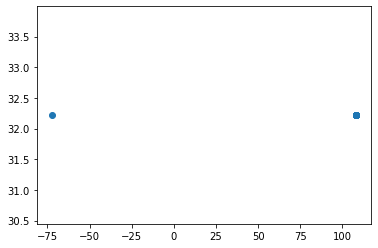

t+1 vs t-923


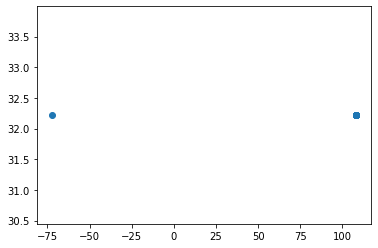

t+1 vs t-924


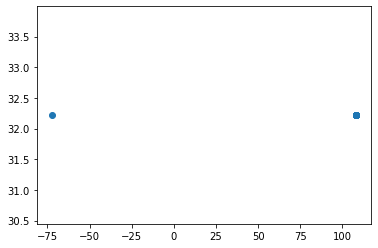

t+1 vs t-925


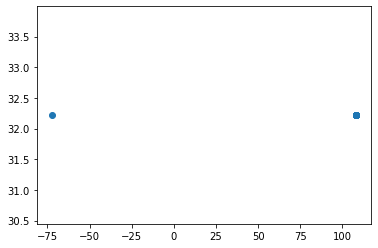

t+1 vs t-926


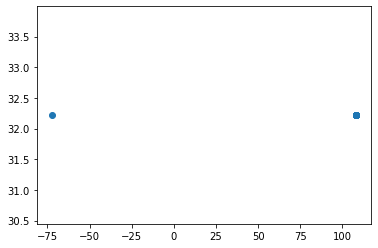

t+1 vs t-927


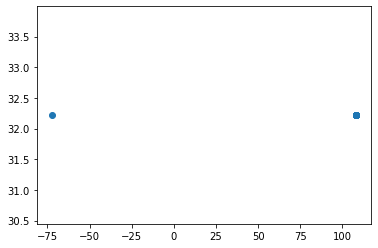

t+1 vs t-928


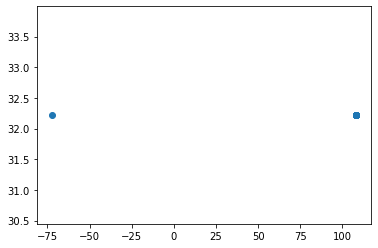

t+1 vs t-929


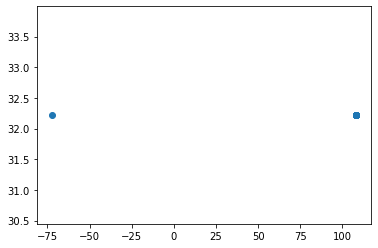

t+1 vs t-930


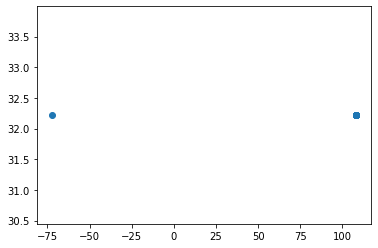

t+1 vs t-931


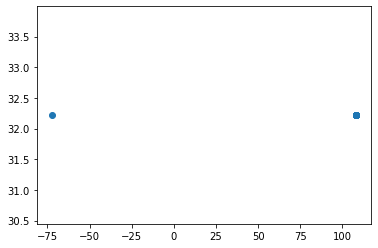

t+1 vs t-932


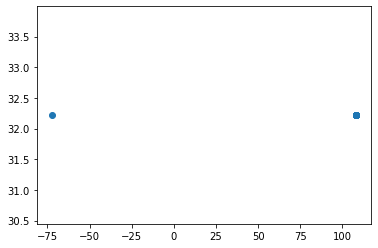

t+1 vs t-933


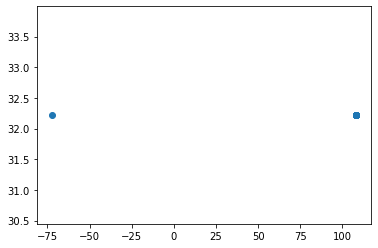

t+1 vs t-934


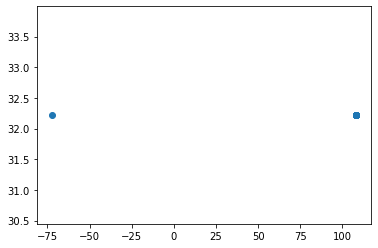

t+1 vs t-935


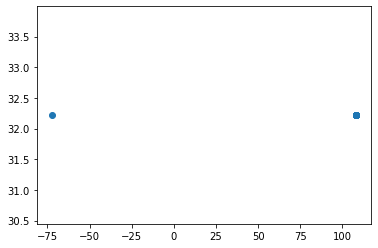

t+1 vs t-936


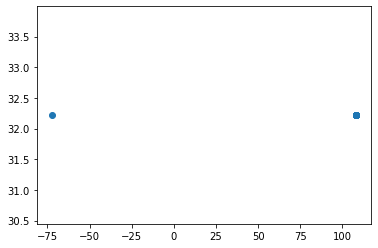

t+1 vs t-937


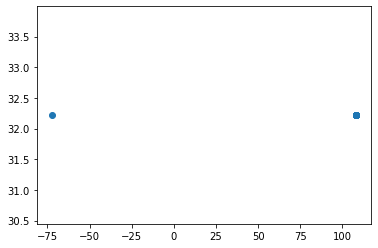

t+1 vs t-938


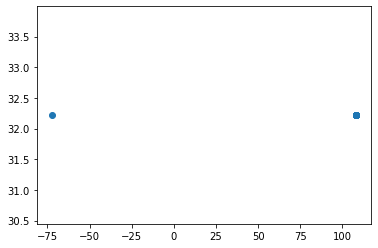

t+1 vs t-939


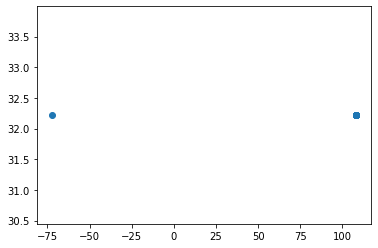

t+1 vs t-940


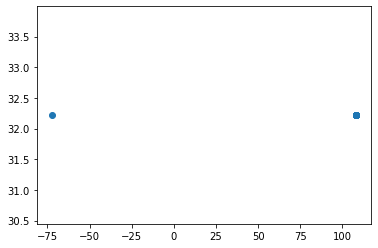

t+1 vs t-941


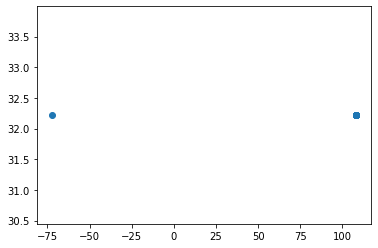

t+1 vs t-942


t+1 vs t-943


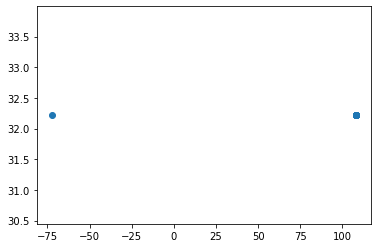

t+1 vs t-944


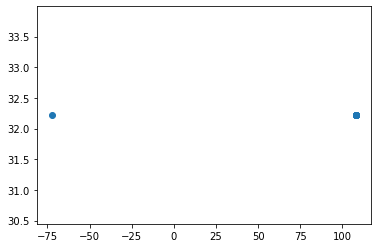

t+1 vs t-945


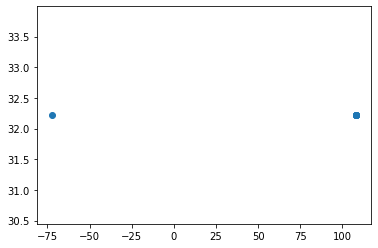

t+1 vs t-946


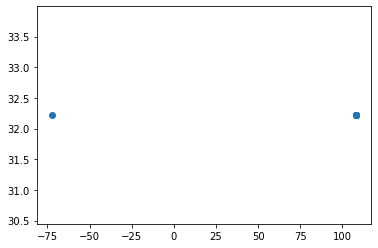

t+1 vs t-947


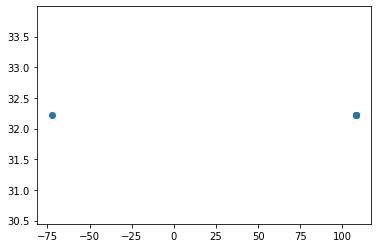

t+1 vs t-948


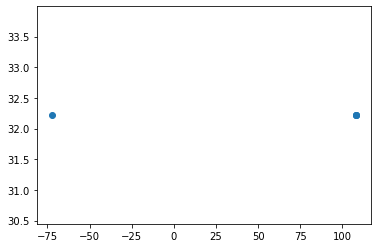

t+1 vs t-949


t+1 vs t-950


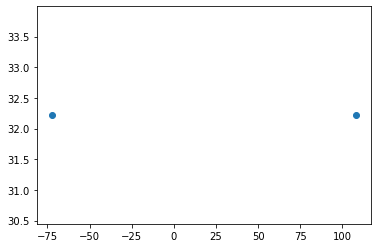

t+1 vs t-951


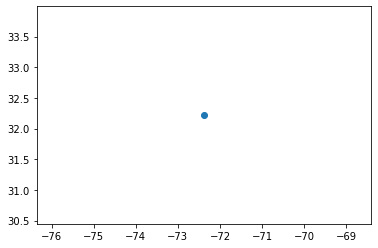

t+1 vs t-952


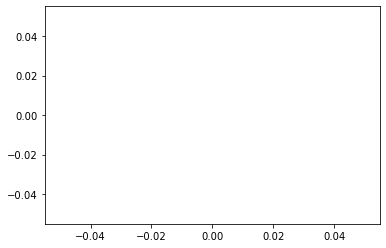

In [226]:
values = DataFrame(transacciones_90_dia_df.values)
lags = transacciones_90_dia_df.size
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
for i in range(1,(lags + 1)):
	print('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
	pyplot.show()

In [227]:
# 6. Time Series Autocorrelation Plots

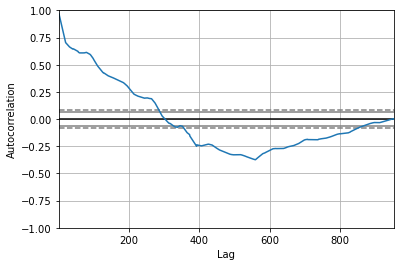

In [230]:
autocorrelation_plot(transacciones_90_dia_df)
pyplot.show()

In [232]:
"""
Vemos que hay muchos valores fuera de las lineas discontinuas lo que implica que hay correlacion estadisticamente
siginificativa entre y(t+1) y esos lags.

Además vemos que hay una correlacion fuerte (<= 0.5) de y(t+1) con sus 100 1os lags y(t-100).

CONCLUSION: esta serie temporal es modelable.
"""

'\nVemos que hay muchos valores fuera de las lineas discontinuas lo que implica que hay correlacion estadisticamente\nsiginificativa entre y(t+1) y esos lags.\n\nAdemás vemos que hay una correlacion fuerte (<= 0.5) de y(t+1) con sus 100 1os lags y(t-100).\n\nCONCLUSION: esta serie temporal es modelable.\n'

In [309]:
# Time Series Forecasting With Prophet in Python
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [310]:
# Load and Summarize Dataset

In [311]:
transacciones_90_dia_df

IMPORTE
2016-09-01    32.22
2016-09-02    32.22
2016-09-03    32.22
2016-09-04    32.22
2016-09-05    32.22
...             ...
2019-04-06   108.17
2019-04-07   108.17
2019-04-08   108.17
2019-04-09   108.17
2019-04-10   -72.38

[952 rows x 1 columns]

In [312]:
# Load and Plot Dataset

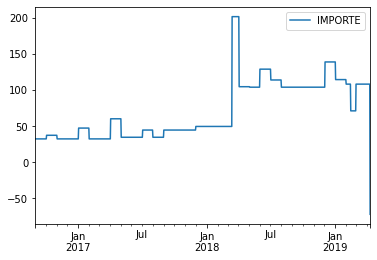

In [313]:
# plot the time series
transacciones_90_dia_df.plot()
pyplot.show()

In [314]:
# Forecast IMPORTE With Prophet

In [315]:
# Fit Prophet Model

In [316]:
df = transacciones_90_dia_df.copy()
df

IMPORTE
2016-09-01    32.22
2016-09-02    32.22
2016-09-03    32.22
2016-09-04    32.22
2016-09-05    32.22
...             ...
2019-04-06   108.17
2019-04-07   108.17
2019-04-08   108.17
2019-04-09   108.17
2019-04-10   -72.38

[952 rows x 1 columns]

In [317]:
df['FECHA'] = df.index
df

IMPORTE      FECHA
2016-09-01    32.22 2016-09-01
2016-09-02    32.22 2016-09-02
2016-09-03    32.22 2016-09-03
2016-09-04    32.22 2016-09-04
2016-09-05    32.22 2016-09-05
...             ...        ...
2019-04-06   108.17 2019-04-06
2019-04-07   108.17 2019-04-07
2019-04-08   108.17 2019-04-08
2019-04-09   108.17 2019-04-09
2019-04-10   -72.38 2019-04-10

[952 rows x 2 columns]

In [318]:
df = df[['FECHA', 'IMPORTE']]
df

FECHA  IMPORTE
2016-09-01 2016-09-01    32.22
2016-09-02 2016-09-02    32.22
2016-09-03 2016-09-03    32.22
2016-09-04 2016-09-04    32.22
2016-09-05 2016-09-05    32.22
...               ...      ...
2019-04-06 2019-04-06   108.17
2019-04-07 2019-04-07   108.17
2019-04-08 2019-04-08   108.17
2019-04-09 2019-04-09   108.17
2019-04-10 2019-04-10   -72.38

[952 rows x 2 columns]

In [319]:
df.reset_index(drop=True, inplace=True)
df

FECHA  IMPORTE
0   2016-09-01    32.22
1   2016-09-02    32.22
2   2016-09-03    32.22
3   2016-09-04    32.22
4   2016-09-05    32.22
..         ...      ...
947 2019-04-06   108.17
948 2019-04-07   108.17
949 2019-04-08   108.17
950 2019-04-09   108.17
951 2019-04-10   -72.38

[952 rows x 2 columns]

In [320]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df

ds       y
0   2016-09-01   32.22
1   2016-09-02   32.22
2   2016-09-03   32.22
3   2016-09-04   32.22
4   2016-09-05   32.22
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[952 rows x 2 columns]

In [321]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [322]:
# A continuacion vamos a obtener un dataframe de train desde 2016-09-01 hasta 2019-02-10
# y un dataframe de test desde 2019-02-11 hasta 2019-04-10

In [323]:
df.index[df['ds'] == '2016-09-01']

Int64Index([0], dtype='int64')

In [324]:
df.index[df['ds'] == '2019-02-10']

Int64Index([892], dtype='int64')

In [325]:
df.index[df['ds'] == '2019-02-11']

Int64Index([893], dtype='int64')

In [326]:
df.index[df['ds'] == '2019-04-10']

Int64Index([951], dtype='int64')

In [327]:
prophet_train_df = df.iloc[:893,:]
prophet_train_df

ds       y
0   2016-09-01   32.22
1   2016-09-02   32.22
2   2016-09-03   32.22
3   2016-09-04   32.22
4   2016-09-05   32.22
..         ...     ...
888 2019-02-06  108.17
889 2019-02-07  108.17
890 2019-02-08  108.17
891 2019-02-09  108.17
892 2019-02-10  108.17

[893 rows x 2 columns]

In [328]:
prophet_train_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [329]:
prophet_test_df = df.iloc[893:,:]
prophet_test_df

ds       y
893 2019-02-11  108.17
894 2019-02-12  108.17
895 2019-02-13  108.17
896 2019-02-14   71.10
897 2019-02-15   71.10
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[59 rows x 2 columns]

In [330]:
prophet_test_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [331]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [332]:
# Make an In-Sample Forecast

In [333]:
# Vamos a hacer un In-Sample Forecast de las observaciones desde el 2018-12-11 hasta el 2019-02-10

In [334]:
prophet_train_df

ds       y
0   2016-09-01   32.22
1   2016-09-02   32.22
2   2016-09-03   32.22
3   2016-09-04   32.22
4   2016-09-05   32.22
..         ...     ...
888 2019-02-06  108.17
889 2019-02-07  108.17
890 2019-02-08  108.17
891 2019-02-09  108.17
892 2019-02-10  108.17

[893 rows x 2 columns]

In [335]:
prophet_train_df.index[prophet_train_df['ds'] == '2018-12-11']

Int64Index([831], dtype='int64')

In [336]:
prophet_train_df.index[prophet_train_df['ds'] == '2019-02-10']

Int64Index([892], dtype='int64')

In [337]:
future_in_sample_df=prophet_train_df.iloc[831:,:]
future_in_sample_df

ds       y
831 2018-12-11  138.92
832 2018-12-12  138.92
833 2018-12-13  138.92
834 2018-12-14  138.92
835 2018-12-15  138.92
..         ...     ...
888 2019-02-06  108.17
889 2019-02-07  108.17
890 2019-02-08  108.17
891 2019-02-09  108.17
892 2019-02-10  108.17

[62 rows x 2 columns]

In [338]:
future_in_sample_df=future_in_sample_df.drop(['y'], axis = 1)
future_in_sample_df

ds
831 2018-12-11
832 2018-12-12
833 2018-12-13
834 2018-12-14
835 2018-12-15
..         ...
888 2019-02-06
889 2019-02-07
890 2019-02-08
891 2019-02-09
892 2019-02-10

[62 rows x 1 columns]

In [339]:
future_in_sample_df.reset_index(level=0, inplace=True)
future_in_sample_df

index         ds
0     831 2018-12-11
1     832 2018-12-12
2     833 2018-12-13
3     834 2018-12-14
4     835 2018-12-15
..    ...        ...
57    888 2019-02-06
58    889 2019-02-07
59    890 2019-02-08
60    891 2019-02-09
61    892 2019-02-10

[62 rows x 2 columns]

In [340]:
future_in_sample_df=future_in_sample_df.drop(['index'], axis = 1)
future_in_sample_df

ds
0  2018-12-11
1  2018-12-12
2  2018-12-13
3  2018-12-14
4  2018-12-15
..        ...
57 2019-02-06
58 2019-02-07
59 2019-02-08
60 2019-02-09
61 2019-02-10

[62 rows x 1 columns]

In [341]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [342]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [343]:
future_in_sample_df['ds']=to_datetime(future_in_sample_df['ds'])

In [344]:
future_in_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [345]:
future_in_sample_df.columns

Index(['ds'], dtype='object')

In [346]:
# use the model to make a forecast
forecast_df = model.predict(future_in_sample_df)

In [347]:
"""
The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the
forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘
and ‘yhat_upper‘) that provide uncertainty of the forecast.
"""

'\nThe result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the\nforecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘\nand ‘yhat_upper‘) that provide uncertainty of the forecast.\n'

In [348]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds        yhat  yhat_lower  yhat_upper
0  2018-12-11  121.587604  102.579140  142.105185
1  2018-12-12  122.258694  102.969485  142.707142
2  2018-12-13  122.244476  101.592170  142.054869
3  2018-12-14  122.523738  101.807612  142.572751
4  2018-12-15  122.506518  102.750998  143.428990
..        ...         ...         ...         ...
57 2019-02-06  120.656611   99.950015  139.634864
58 2019-02-07  120.382910  100.470271  140.656593
59 2019-02-08  120.337244   99.428589  139.936406
60 2019-02-09  119.916404   99.919863  139.448811
61 2019-02-10  119.382542   99.333048  138.791210

[62 rows x 4 columns]


In [349]:
forecast_df.shape

(62, 19)

In [350]:
"""
Prophet also provides a built-in tool for visualizing the prediction in the context of the training dataset.

This can be achieved by calling the plot() function on the model and passing it a result DataFrame.
It will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.
"""

'\nProphet also provides a built-in tool for visualizing the prediction in the context of the training dataset.\n\nThis can be achieved by calling the plot() function on the model and passing it a result DataFrame.\nIt will create a plot of the training dataset and overlay the prediction with the upper and lower bounds for the forecast dates.\n'

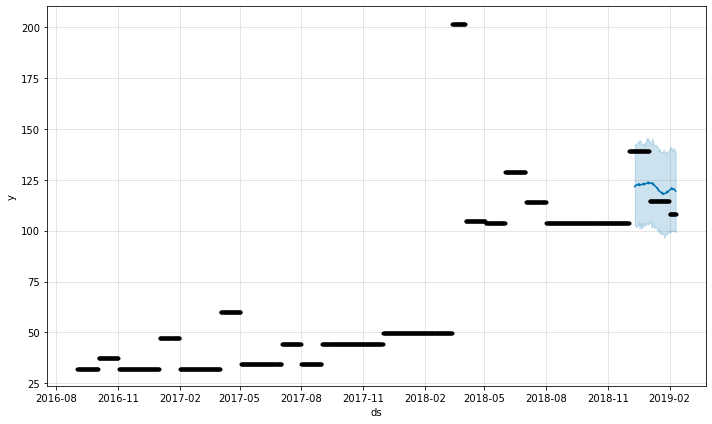

In [351]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [353]:
# Manually Evaluate Forecast Model

In [354]:
evaluate_in_sample_df=prophet_train_df.iloc[831:,:]
evaluate_in_sample_df

ds       y
831 2018-12-11  138.92
832 2018-12-12  138.92
833 2018-12-13  138.92
834 2018-12-14  138.92
835 2018-12-15  138.92
..         ...     ...
888 2019-02-06  108.17
889 2019-02-07  108.17
890 2019-02-08  108.17
891 2019-02-09  108.17
892 2019-02-10  108.17

[62 rows x 2 columns]

In [355]:
evaluate_in_sample_df.reset_index(level=0, inplace=True)
evaluate_in_sample_df

index         ds       y
0     831 2018-12-11  138.92
1     832 2018-12-12  138.92
2     833 2018-12-13  138.92
3     834 2018-12-14  138.92
4     835 2018-12-15  138.92
..    ...        ...     ...
57    888 2019-02-06  108.17
58    889 2019-02-07  108.17
59    890 2019-02-08  108.17
60    891 2019-02-09  108.17
61    892 2019-02-10  108.17

[62 rows x 3 columns]

In [356]:
evaluate_in_sample_df=evaluate_in_sample_df.drop(['index'], axis = 1)
evaluate_in_sample_df

ds       y
0  2018-12-11  138.92
1  2018-12-12  138.92
2  2018-12-13  138.92
3  2018-12-14  138.92
4  2018-12-15  138.92
..        ...     ...
57 2019-02-06  108.17
58 2019-02-07  108.17
59 2019-02-08  108.17
60 2019-02-09  108.17
61 2019-02-10  108.17

[62 rows x 2 columns]

In [357]:
evaluate_in_sample_df['y'][:].values

array([138.92, 138.92, 138.92, 138.92, 138.92, 138.92, 138.92, 138.92,
       138.92, 138.92, 138.92, 138.92, 138.92, 138.92, 138.92, 138.92,
       138.92, 138.92, 138.92, 138.92, 138.92, 138.92, 114.45, 114.45,
       114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45,
       114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45,
       114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45, 114.45,
       114.45, 114.45, 114.45, 114.45, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, 108.17, 108.17, 108.17, 108.17])

In [358]:
# calculate MAE between expected and predicted values for december
y_true = evaluate_in_sample_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

Train MAE: 10.569
Train MSE: 135.311
Train RMSE: 11.632


In [361]:
"""
Vemos que obtenemos errores de MAE: 10.569 eur y RMSE: 11.632 eur que son valores bastantes aceptables teniendo en cuenta 
que estamos prediciendo valores entre 108 y 140 eur (cometemos aproximadamente un 10% de error o menos).

Vemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia
de los datos reales y la presenta suavizada.
"""

'\nVemos que obtenemos errores de MAE: 10.569 eur y RMSE: 11.632 eur que son valores bastantes aceptables teniendo en cuenta \nque estamos prediciendo valores entre 108 y 140 eur (cometemos aproximadamente un 10% de error o menos).\n\nVemos tambien que la grafica de valores predichos frente a los valores reales sale muy bien porque captura la tendencia\nde los datos reales y la presenta suavizada.\n'

In [365]:
"""
A continuacion procedemos a la validacion final del modelo con los datos desde febrero de 2019 a abril de 2019
"""

'\nA continuacion procedemos a la validacion final del modelo con los datos desde febrero de 2019 a abril de 2019\n'

In [366]:
# Make an Out-of-Sample Forecast

In [367]:
prophet_test_df

ds       y
893 2019-02-11  108.17
894 2019-02-12  108.17
895 2019-02-13  108.17
896 2019-02-14   71.10
897 2019-02-15   71.10
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[59 rows x 2 columns]

In [369]:
future_out_sample_df=prophet_test_df.copy()
future_out_sample_df

ds       y
893 2019-02-11  108.17
894 2019-02-12  108.17
895 2019-02-13  108.17
896 2019-02-14   71.10
897 2019-02-15   71.10
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[59 rows x 2 columns]

In [370]:
future_out_sample_df=future_out_sample_df.drop(['y'], axis = 1)
future_out_sample_df

ds
893 2019-02-11
894 2019-02-12
895 2019-02-13
896 2019-02-14
897 2019-02-15
..         ...
947 2019-04-06
948 2019-04-07
949 2019-04-08
950 2019-04-09
951 2019-04-10

[59 rows x 1 columns]

In [371]:
future_out_sample_df.reset_index(level=0, inplace=True)
future_out_sample_df

index         ds
0     893 2019-02-11
1     894 2019-02-12
2     895 2019-02-13
3     896 2019-02-14
4     897 2019-02-15
..    ...        ...
54    947 2019-04-06
55    948 2019-04-07
56    949 2019-04-08
57    950 2019-04-09
58    951 2019-04-10

[59 rows x 2 columns]

In [372]:
future_out_sample_df=future_out_sample_df.drop(['index'], axis = 1)
future_out_sample_df

ds
0  2019-02-11
1  2019-02-12
2  2019-02-13
3  2019-02-14
4  2019-02-15
..        ...
54 2019-04-06
55 2019-04-07
56 2019-04-08
57 2019-04-09
58 2019-04-10

[59 rows x 1 columns]

In [373]:
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [374]:
future_out_sample_df['ds']=to_datetime(future_out_sample_df['ds'])
future_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [375]:
# use the model to make a forecast
forecast_df = model.predict(future_out_sample_df)
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2019-02-11  134.269434   99.648955  139.573981   134.269434   134.269434   
1  2019-02-12  134.393825   96.695886  137.857994   134.393825   134.393825   
2  2019-02-13  134.518217   98.514422  137.904596   134.518217   134.518217   
3  2019-02-14  134.642608   96.995324  135.857856   134.642608   134.642608   
4  2019-02-15  134.767000   97.176543  137.071901   134.767000   134.767000   
..        ...         ...         ...         ...          ...          ...   
54 2019-04-06  140.986569  155.616149  197.351264   140.042013   141.863055   
55 2019-04-07  141.110960  155.015345  196.557488   140.128986   142.006876   
56 2019-04-08  141.235352  150.857292  192.283222   140.213569   142.180974   
57 2019-04-09  141.359743  147.353069  189.563140   140.302322   142.336058   
58 2019-04-10  141.484135  145.893243  188.179594   140.369893   142.484583   

    additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -14.834042            -14.834042            -14.834042  0.511547   
1       -16.554746            -16.554746            -16.554746 -0.422451   
2       -16.956782            -16.956782            -16.956782  0.054887   
3       -18.071774            -18.071774            -18.071774 -0.103625   
4       -18.908973            -18.908973            -18.908973  0.072959   
..             ...                   ...                   ...       ...   
54       36.003308             36.003308             36.003308 -0.013576   
55       33.205093             33.205093             33.205093 -0.099741   
56       31.159961             31.159961             31.159961  0.511547   
57       27.670650             27.670650             27.670650 -0.422451   
58       25.734686             25.734686             25.734686  0.054887   

    weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0       0.511547      0.511547 -15.345589    -15.345589    -15.345589   
1      -0.422451     -0.422451 -16.132296    -16.132296    -16.132296   
2       0.054887      0.054887 -17.011669    -17.011669    -17.011669   
3      -0.103625     -0.103625 -17.968149    -17.968149    -17.968149   
4       0.072959      0.072959 -18.981932    -18.981932    -18.981932   
..           ...           ...        ...           ...           ...   
54     -0.013576     -0.013576  36.016884     36.016884     36.016884   
55     -0.099741     -0.099741  33.304834     33.304834     33.304834   
56      0.511547      0.511547  30.648414     30.648414     30.648414   
57     -0.422451     -0.422451  28.093101     28.093101     28.093101   
58      0.054887      0.054887  25.679799     25.679799     25.679799   

    multiplicative_terms  multiplicative_terms_lower  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   
..                   ...                         ...   
54                   0.0                         0.0   
55                   0.0                         0.0   
56                   0.0                         0.0   
57                   0.0                         0.0   
58                   0.0                         0.0   

    multiplicative_terms_upper        yhat  
0                          0.0  119.435392  
1                          0.0  117.839079  
2                          0.0  117.561435  
3                          0.0  116.570834  
4                          0.0  115.858026  
..                         ...         ...  
54                         0.0  176.989877  
55                         0.0  174.316053  
56                         0.0  172.395313  
57                         0.0  169.030393  
58                         0.0  167.218820  

[59 rows x 19 columns]

In [376]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds        yhat  yhat_lower  yhat_upper
0  2019-02-11  119.435392   99.648955  139.573981
1  2019-02-12  117.839079   96.695886  137.857994
2  2019-02-13  117.561435   98.514422  137.904596
3  2019-02-14  116.570834   96.995324  135.857856
4  2019-02-15  115.858026   97.176543  137.071901
..        ...         ...         ...         ...
54 2019-04-06  176.989877  155.616149  197.351264
55 2019-04-07  174.316053  155.015345  196.557488
56 2019-04-08  172.395313  150.857292  192.283222
57 2019-04-09  169.030393  147.353069  189.563140
58 2019-04-10  167.218820  145.893243  188.179594

[59 rows x 4 columns]


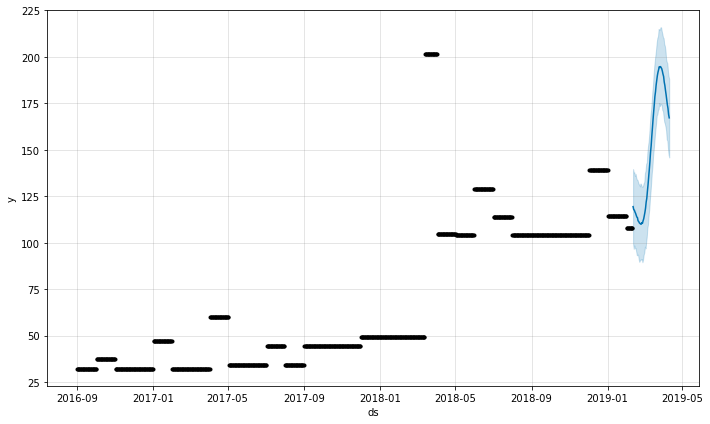

In [377]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [378]:
prophet_test_df

ds       y
893 2019-02-11  108.17
894 2019-02-12  108.17
895 2019-02-13  108.17
896 2019-02-14   71.10
897 2019-02-15   71.10
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[59 rows x 2 columns]

In [379]:
# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values

In [380]:
y_true

array([108.17, 108.17, 108.17,  71.1 ,  71.1 ,  71.1 ,  71.1 ,  71.1 ,
        71.1 ,  71.1 ,  71.1 ,  71.1 ,  71.1 ,  71.1 ,  71.1 ,  71.1 ,
        71.1 ,  71.1 , 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
       108.17, 108.17, -72.38])

In [381]:
y_pred

array([119.43539175, 117.83907915, 117.56143463, 116.57083421,
       115.85802641, 114.84860075, 113.83349665, 113.54041949,
       111.75983454, 111.48346899, 110.70037736, 110.41804759,
       110.0742256 , 109.96687691, 110.82517028, 110.43516898,
       111.77817227, 112.82677056, 114.56609636, 116.40594914,
       118.61120929, 121.87341804, 123.93719744, 127.73943712,
       131.20629252, 135.2754545 , 139.30934449, 143.52662355,
       148.5748656 , 152.15804062, 157.17670746, 161.52593445,
       166.11838329, 170.29818787, 174.27299785, 178.68702116,
       181.24870031, 184.87091476, 187.46872529, 189.98209803,
       191.78924711, 193.13797702, 194.7178751 , 194.28700871,
       194.81104267, 194.25981916, 193.62886596, 192.35150179,
       190.72895046, 189.50134442, 186.47330191, 184.6520211 ,
       182.04295866, 179.67058123, 176.98987692, 174.31605339,
       172.39531284, 169.03039338, 167.21882036])

Train MAE: 54.935
Train MSE: 4215.739
Train RMSE: 64.929


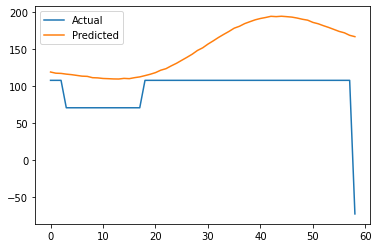

In [382]:
# calculate MAE between expected and predicted values for december
y_true = prophet_test_df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Train MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Train MSE: %.3f' % test_score)
print('Train RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [383]:
"""
En este caso obtenemos unos errores de MAE: 54.935 eur y RMSE: 64.929 en la prediccion de unos valores de aproximadamente 
100 eur. Esto es debido a que y_pred esta repitiendo 2019-04 la subida que tuvo en 2018-04. Por eso obtenemos errores tan 
grandes pero eso no quiere decir que la prediccion sea mala.
"""

'\nEn este caso obtenemos unos errores de MAE: 54.935 eur y RMSE: 64.929 en la prediccion de unos valores de aproximadamente \n100 eur. Esto es debido a que y_pred esta repitiendo 2019-04 la subida que tuvo en 2018-04. Por eso obtenemos errores tan \ngrandes pero eso no quiere decir que la prediccion sea mala.\n'

In [384]:
"""
A continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto
del contexto entero de datos.
"""

'\nA continuacion vamos a plotear la prediccion junto al dataset completo para ver lo bien que hemos afinado dentro del conjunto\ndel contexto entero de datos.\n'

In [385]:
df

ds       y
0   2016-09-01   32.22
1   2016-09-02   32.22
2   2016-09-03   32.22
3   2016-09-04   32.22
4   2016-09-05   32.22
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[952 rows x 2 columns]

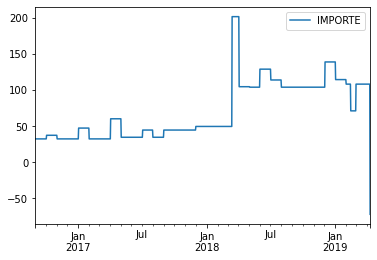

In [405]:
transacciones_90_dia_df.plot()
pyplot.show()

In [404]:
df['y'].plot()
pyplot.show()

In [406]:
df.index[df['ds'] == '2016-09-01']

Int64Index([0], dtype='int64')

In [407]:
df.index[df['ds'] == '2019-02-11']

Int64Index([893], dtype='int64')

In [408]:
# split into train and test sets
X = df.values
train_size = int(893)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [410]:
train_X.shape, train_X

((893,),
 array([Timestamp('2016-09-01 00:00:00'), Timestamp('2016-09-02 00:00:00'),
        Timestamp('2016-09-03 00:00:00'), Timestamp('2016-09-04 00:00:00'),
        Timestamp('2016-09-05 00:00:00'), Timestamp('2016-09-06 00:00:00'),
        Timestamp('2016-09-07 00:00:00'), Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-09-09 00:00:00'), Timestamp('2016-09-10 00:00:00'),
        Timestamp('2016-09-11 00:00:00'), Timestamp('2016-09-12 00:00:00'),
        Timestamp('2016-09-13 00:00:00'), Timestamp('2016-09-14 00:00:00'),
        Timestamp('2016-09-15 00:00:00'), Timestamp('2016-09-16 00:00:00'),
        Timestamp('2016-09-17 00:00:00'), Timestamp('2016-09-18 00:00:00'),
        Timestamp('2016-09-19 00:00:00'), Timestamp('2016-09-20 00:00:00'),
        Timestamp('2016-09-21 00:00:00'), Timestamp('2016-09-22 00:00:00'),
        Timestamp('2016-09-23 00:00:00'), Timestamp('2016-09-24 00:00:00'),
        Timestamp('2016-09-25 00:00:00'), Timestamp('2016-09-26 00:00:00'),
   

In [411]:
train_y.shape, train_y

((893,),
 array([32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 47.22, 47.22, 47.2

In [412]:
test_X.shape, test_X

((59,),
 array([Timestamp('2019-02-11 00:00:00'), Timestamp('2019-02-12 00:00:00'),
        Timestamp('2019-02-13 00:00:00'), Timestamp('2019-02-14 00:00:00'),
        Timestamp('2019-02-15 00:00:00'), Timestamp('2019-02-16 00:00:00'),
        Timestamp('2019-02-17 00:00:00'), Timestamp('2019-02-18 00:00:00'),
        Timestamp('2019-02-19 00:00:00'), Timestamp('2019-02-20 00:00:00'),
        Timestamp('2019-02-21 00:00:00'), Timestamp('2019-02-22 00:00:00'),
        Timestamp('2019-02-23 00:00:00'), Timestamp('2019-02-24 00:00:00'),
        Timestamp('2019-02-25 00:00:00'), Timestamp('2019-02-26 00:00:00'),
        Timestamp('2019-02-27 00:00:00'), Timestamp('2019-02-28 00:00:00'),
        Timestamp('2019-03-01 00:00:00'), Timestamp('2019-03-02 00:00:00'),
        Timestamp('2019-03-03 00:00:00'), Timestamp('2019-03-04 00:00:00'),
        Timestamp('2019-03-05 00:00:00'), Timestamp('2019-03-06 00:00:00'),
        Timestamp('2019-03-07 00:00:00'), Timestamp('2019-03-08 00:00:00'),
    

In [413]:
test_y.shape, test_y

((59,),
 array([108.17, 108.17, 108.17, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1,
        71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, -72.38],
       dtype=object))

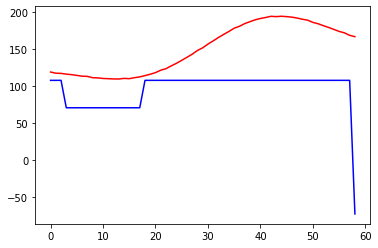

In [414]:
# plot predictions vs expected
pyplot.plot(test_y, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [415]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [416]:
"""
Con las dos gráficas anteriores ponemos de manifiesto el error que podemos llegar a tener si pedimos una prediccion de la serie
temporal en el peor momento.
"""

'\nCon las ods gráficas anteriores ponemos de manifiesto el error que podemos llegar a tener si pedimos una prediccion de la serie\ntemporal en el peor momento.\n'

In [417]:
"""
Por ultimo vamos a hacer una prediccion con prophet para el dataset entero con el modelo entrenado hasta 2019-02-10
y vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet
"""

'\nPor ultimo vamos a hacer una prediccion con prophet para el dataset entero con el modelo entrenado hasta 2019-02-10\ny vamos a representar valor real frente a predicho para poder ver de una manera más general lo bien o mal que aproxima prophet\n'

In [419]:
df.shape

(952, 2)

In [420]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [421]:
future_in_out_sample_df = df.copy()

In [422]:
future_in_out_sample_df=future_in_out_sample_df.drop(['y'], axis = 1)

In [423]:
future_in_out_sample_df

ds
0   2016-09-01
1   2016-09-02
2   2016-09-03
3   2016-09-04
4   2016-09-05
..         ...
947 2019-04-06
948 2019-04-07
949 2019-04-08
950 2019-04-09
951 2019-04-10

[952 rows x 1 columns]

In [424]:
future_in_out_sample_df['ds']=to_datetime(future_in_out_sample_df['ds'])

In [425]:
future_in_out_sample_df.dtypes

ds    datetime64[ns]
dtype: object

In [426]:
# use the model to make a forecast
forecast_df = model.predict(future_in_out_sample_df)

In [427]:
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2016-09-01   50.118327   20.832817   60.374890    50.118327    50.118327   
1   2016-09-02   50.034094   17.888071   60.066082    50.034094    50.034094   
2   2016-09-03   49.949861   18.200937   59.639959    49.949861    49.949861   
3   2016-09-04   49.865628   18.942127   60.233715    49.865628    49.865628   
4   2016-09-05   49.781395   18.330465   60.659544    49.781395    49.781395   
..         ...         ...         ...         ...          ...          ...   
947 2019-04-06  140.986569  157.100524  196.240172   140.097257   142.094474   
948 2019-04-07  141.110960  155.125091  194.685768   140.181003   142.248826   
949 2019-04-08  141.235352  151.086703  192.348272   140.280962   142.419626   
950 2019-04-09  141.359743  148.173468  190.466943   140.373923   142.576059   
951 2019-04-10  141.484135  147.305151  187.681389   140.468613   142.743584   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        -10.002740            -10.002740            -10.002740 -0.103625   
1        -10.117123            -10.117123            -10.117123  0.072959   
2        -10.464450            -10.464450            -10.464450 -0.013576   
3        -10.775060            -10.775060            -10.775060 -0.099741   
4        -10.346896            -10.346896            -10.346896  0.511547   
..              ...                   ...                   ...       ...   
947       36.003308             36.003308             36.003308 -0.013576   
948       33.205093             33.205093             33.205093 -0.099741   
949       31.159961             31.159961             31.159961  0.511547   
950       27.670650             27.670650             27.670650 -0.422451   
951       25.734686             25.734686             25.734686  0.054887   

     weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0       -0.103625     -0.103625  -9.899114     -9.899114     -9.899114   
1        0.072959      0.072959 -10.190083    -10.190083    -10.190083   
2       -0.013576     -0.013576 -10.450874    -10.450874    -10.450874   
3       -0.099741     -0.099741 -10.675319    -10.675319    -10.675319   
4        0.511547      0.511547 -10.858442    -10.858442    -10.858442   
..            ...           ...        ...           ...           ...   
947     -0.013576     -0.013576  36.016884     36.016884     36.016884   
948     -0.099741     -0.099741  33.304834     33.304834     33.304834   
949      0.511547      0.511547  30.648414     30.648414     30.648414   
950     -0.422451     -0.422451  28.093101     28.093101     28.093101   
951      0.054887      0.054887  25.679799     25.679799     25.679799   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
947                   0.0                         0.0   
948                   0.0                         0.0   
949                   0.0                         0.0   
950                   0.0                         0.0   
951                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0   40.115588  
1                           0.0   39.916970  
2                           0.0   39.485411  
3                           0.0   39.090567  
4                           0.0   39.434499  
..                          ...         ...  
947                         0.0  176.989877  
948                         0.0  174.316053  
949                         0.0  172.395313  
950                         0.0  169.030393  
951                         0.0  167.218820  


In [428]:
# summarize the forecast
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower  yhat_upper
0   2016-09-01   40.115588   20.832817   60.374890
1   2016-09-02   39.916970   17.888071   60.066082
2   2016-09-03   39.485411   18.200937   59.639959
3   2016-09-04   39.090567   18.942127   60.233715
4   2016-09-05   39.434499   18.330465   60.659544
..         ...         ...         ...         ...
947 2019-04-06  176.989877  157.100524  196.240172
948 2019-04-07  174.316053  155.125091  194.685768
949 2019-04-08  172.395313  151.086703  192.348272
950 2019-04-09  169.030393  148.173468  190.466943
951 2019-04-10  167.218820  147.305151  187.681389

[952 rows x 4 columns]


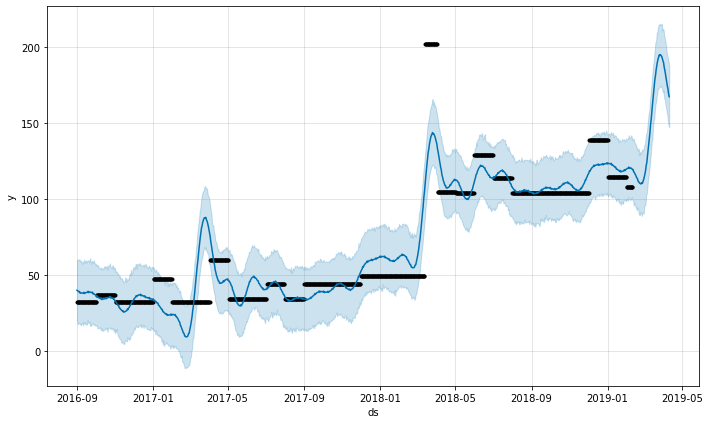

In [429]:
# plot forecast
model.plot(forecast_df)
pyplot.show()

Total MAE: 12.451
Total MSE: 496.511
Total RMSE: 22.283


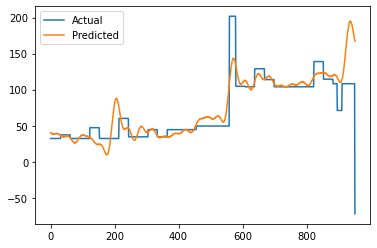

In [430]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][:].values
y_pred = forecast_df['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Total MAE: %.3f' % mae)

test_score = mean_squared_error(y_true, y_pred)
root_test_score = sqrt(test_score)
print('Total MSE: %.3f' % test_score)
print('Total RMSE: %.3f' % root_test_score)

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [432]:
"""
Vemos que le hemos pedido una prediccion al modelo justo en el peor momento. DE ESTO HAY QUE AVISAR A USUARIOS Y DIRECCION.
No obstante vemos que la predicción de la serie temporal es buena porque si nos atenemos al historico de datos anteriores lo
razonable era esperar otra subida escalonada del gastos de unos 50 eur en lugar de una bajada de 150 eur.

Los modelos matemáticos no pueden predecir el comportamiento humano ni las circunstancias de cada uno.

No obstante vemos que tenemos un MAE: 12.451 eur y un RMSE: 22.283 eur que son errores más o menos razonables en 3 años si 
estamos prediciendo valores de entre 50 y 120 eur.
"""

'\nVemos que le hemos pedido una prediccion al modelo justo en el peor momento. DE ESTO HAY QUE AVISAR A USUARIOS Y DIRECCION.\nNo obstante vemos que la predicción de la serie temporal es buena porque si nos atenemos al historico de datos anteriores lo\nrazonable era esperar otra subida escalonada del gastos de unos 50 eur en lugar de una bajada de 150 eur.\n\nLos modelos matemáticos no pueden predecir el comportamiento humano ni las circunstancias de cada uno.\n\nNo obstante vemos que tenemos un MAE: 12.451 eur y un RMSE: 22.283 eur que son errores más o menos razonables en 3 años si \nestamos prediciendo valores de entre 50 y 120 eur.\n'

In [434]:
df

ds       y
0   2016-09-01   32.22
1   2016-09-02   32.22
2   2016-09-03   32.22
3   2016-09-04   32.22
4   2016-09-05   32.22
..         ...     ...
947 2019-04-06  108.17
948 2019-04-07  108.17
949 2019-04-08  108.17
950 2019-04-09  108.17
951 2019-04-10  -72.38

[952 rows x 2 columns]

In [435]:
df.index[df['ds'] == '2016-09-01']

Int64Index([0], dtype='int64')

In [436]:
df.index[df['ds'] == '2019-02-11']

Int64Index([893], dtype='int64')

In [439]:
df.index[df['ds'] == '2019-04-10']

Int64Index([951], dtype='int64')

In [440]:
# en el excel del datset original (20210513 mmelero (249236).xlsx) hay datos desde el 2016-09-01 (como en df)
# hasta el 2020-07-24

In [442]:
# split into train and test sets
X = df.values
train_size = int(893)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [443]:
train_X.shape, train_X

((893,),
 array([Timestamp('2016-09-01 00:00:00'), Timestamp('2016-09-02 00:00:00'),
        Timestamp('2016-09-03 00:00:00'), Timestamp('2016-09-04 00:00:00'),
        Timestamp('2016-09-05 00:00:00'), Timestamp('2016-09-06 00:00:00'),
        Timestamp('2016-09-07 00:00:00'), Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-09-09 00:00:00'), Timestamp('2016-09-10 00:00:00'),
        Timestamp('2016-09-11 00:00:00'), Timestamp('2016-09-12 00:00:00'),
        Timestamp('2016-09-13 00:00:00'), Timestamp('2016-09-14 00:00:00'),
        Timestamp('2016-09-15 00:00:00'), Timestamp('2016-09-16 00:00:00'),
        Timestamp('2016-09-17 00:00:00'), Timestamp('2016-09-18 00:00:00'),
        Timestamp('2016-09-19 00:00:00'), Timestamp('2016-09-20 00:00:00'),
        Timestamp('2016-09-21 00:00:00'), Timestamp('2016-09-22 00:00:00'),
        Timestamp('2016-09-23 00:00:00'), Timestamp('2016-09-24 00:00:00'),
        Timestamp('2016-09-25 00:00:00'), Timestamp('2016-09-26 00:00:00'),
   

In [444]:
train_y.shape, train_y

((893,),
 array([32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22,
        37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 37.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 32.22,
        32.22, 32.22, 32.22, 32.22, 32.22, 32.22, 47.22, 47.22, 47.2

In [445]:
test_y.shape, test_y

((59,),
 array([108.17, 108.17, 108.17, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1,
        71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 71.1, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17, 108.17,
        108.17, 108.17, 108.17, 108.17, 108.17, 108.17, -72.38],
       dtype=object))

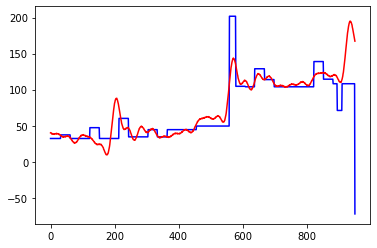

In [446]:
# plot predictions vs expected
pyplot.plot(y_true, color='blue') # y en test - en azul
pyplot.plot(y_pred, color='red') # y en predictions - en rojo
pyplot.show()

In [447]:
y_pred.size, y_pred

(952,
 array([ 40.11558755,  39.91697047,  39.48541128,  39.09056718,
         39.43449895,  38.27807602,  38.58003697,  38.29374995,
         38.38913499,  38.2654068 ,  38.18203332,  38.83076905,
         37.96242039,  38.52625524,  38.46709001,  38.7475053 ,
         38.76083917,  38.76234542,  39.44136939,  38.5481939 ,
         39.03346548,  38.84523327,  38.95105388,  38.75081492,
         38.50767017,  38.91994644,  37.74768375,  37.95172888,
         37.49042585,  37.34136803,  36.91387625,  36.47960723,
         36.74416334,  35.47337503,  35.63218474,  35.18118285,
         35.09826578,  34.79108378,  34.5276845 ,  35.00822209,
         33.99140083,  34.43357689,  34.28556246,  34.51459379,
         34.51712138,  34.54981725,  35.30165793,  34.52074006,
         35.15374055,  35.14305383,  35.44905716,  35.46315228,
         35.43897027,  36.06459139,  35.08943205,  35.46370786,
         35.13550496,  35.07291153,  34.6768618 ,  34.21208462,
         34.37901591,  32.94033608

In [448]:
print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds        yhat  yhat_lower  yhat_upper
0   2016-09-01   40.115588   20.832817   60.374890
1   2016-09-02   39.916970   17.888071   60.066082
2   2016-09-03   39.485411   18.200937   59.639959
3   2016-09-04   39.090567   18.942127   60.233715
4   2016-09-05   39.434499   18.330465   60.659544
..         ...         ...         ...         ...
947 2019-04-06  176.989877  157.100524  196.240172
948 2019-04-07  174.316053  155.125091  194.685768
949 2019-04-08  172.395313  151.086703  192.348272
950 2019-04-09  169.030393  148.173468  190.466943
951 2019-04-10  167.218820  147.305151  187.681389

[952 rows x 4 columns]


In [450]:
forecast_unseen_df=forecast_df[893:]
forecast_unseen_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
893 2019-02-11  134.269434   99.081587  139.101422   134.269434   134.269434   
894 2019-02-12  134.393825   95.736045  139.620429   134.393825   134.393825   
895 2019-02-13  134.518217   97.302521  137.576300   134.518217   134.518217   
896 2019-02-14  134.642608   96.735109  136.903302   134.642608   134.642608   
897 2019-02-15  134.767000   94.724907  136.105231   134.767000   134.767000   
..         ...         ...         ...         ...          ...          ...   
947 2019-04-06  140.986569  157.100524  196.240172   140.097257   142.094474   
948 2019-04-07  141.110960  155.125091  194.685768   140.181003   142.248826   
949 2019-04-08  141.235352  151.086703  192.348272   140.280962   142.419626   
950 2019-04-09  141.359743  148.173468  190.466943   140.373923   142.576059   
951 2019-04-10  141.484135  147.305151  187.681389   140.468613   142.743584   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
893      -14.834042            -14.834042            -14.834042  0.511547   
894      -16.554746            -16.554746            -16.554746 -0.422451   
895      -16.956782            -16.956782            -16.956782  0.054887   
896      -18.071774            -18.071774            -18.071774 -0.103625   
897      -18.908973            -18.908973            -18.908973  0.072959   
..              ...                   ...                   ...       ...   
947       36.003308             36.003308             36.003308 -0.013576   
948       33.205093             33.205093             33.205093 -0.099741   
949       31.159961             31.159961             31.159961  0.511547   
950       27.670650             27.670650             27.670650 -0.422451   
951       25.734686             25.734686             25.734686  0.054887   

     weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
893      0.511547      0.511547 -15.345589    -15.345589    -15.345589   
894     -0.422451     -0.422451 -16.132296    -16.132296    -16.132296   
895      0.054887      0.054887 -17.011669    -17.011669    -17.011669   
896     -0.103625     -0.103625 -17.968149    -17.968149    -17.968149   
897      0.072959      0.072959 -18.981932    -18.981932    -18.981932   
..            ...           ...        ...           ...           ...   
947     -0.013576     -0.013576  36.016884     36.016884     36.016884   
948     -0.099741     -0.099741  33.304834     33.304834     33.304834   
949      0.511547      0.511547  30.648414     30.648414     30.648414   
950     -0.422451     -0.422451  28.093101     28.093101     28.093101   
951      0.054887      0.054887  25.679799     25.679799     25.679799   

     multiplicative_terms  multiplicative_terms_lower  \
893                   0.0                         0.0   
894                   0.0                         0.0   
895                   0.0                         0.0   
896                   0.0                         0.0   
897                   0.0                         0.0   
..                    ...                         ...   
947                   0.0                         0.0   
948                   0.0                         0.0   
949                   0.0                         0.0   
950                   0.0                         0.0   
951                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
893                         0.0  119.435392  
894                         0.0  117.839079  
895                         0.0  117.561435  
896                         0.0  116.570834  
897                         0.0  115.858026  
..                          ...         ...  
947                         0.0  176.989877  
948                         0.0  174.316053  
949                         0.0  172.395313  
950                         0.0  169.030393  
951                         0.0  167.218820  


In [451]:
y_unseen_pred = forecast_unseen_df['yhat'].values

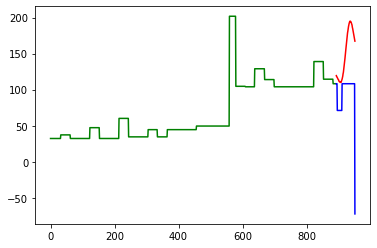

In [452]:
# plot predictions and expected results
pyplot.plot(train_y, color='green') # y en training - en verde
pyplot.plot([None for i in train_y] + [x for x in test_y], color='blue') # y en test - en azul
pyplot.plot([None for i in train_y] + [x for x in y_unseen_pred], color='red') # y en predictions - en rojo
pyplot.show()

In [453]:
"""
CONCLUSION FINAL: aun cuando hayamos pedido al algoritmo un prediccion en el momento en que más error da. Creemos que es 
adecuado utlizar la serie temporal del historia de recibos anteriores calculada con prophet para estimar el importe del
proximo recibo.
"""

'\nCONCLUSION FINAL: aun cuando hayamos pedido al algoritmo un prediccion en el momento en que más error da. Creemos que es \nadecuado utlizar la serie temporal del historia de recibos anteriores calculada con prophet para estimar el importe del\nproximo recibo.\n'